<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

###  Big Query, SQL, Classification

---

### The Data

There are 5 individual tables that have the information, contained in a Google BigQuery database.  The setup info for BigQuery is located on our DSI wiki.  You will have to query with SQL, the dataset in order to complete this project.

The tables, with cooresonding attributes that exist are:

### businesses
- business_id: unique business identifier
- name: name of the business
- review_count: number of reviews per business
- city: city business resides in
- stars: average rating
- categories: categories the business falls into (can be one or multiple)
- latitude
- longitude
- neighborhoods: neighborhoods business belongs to
- variable: "property" of the business (a tag)
- value: True/False for the property

### reviews
- user_id: unique user identifier
- review_id: unique review identifier
- votes.cool: how many thought the review was "cool"
- business_id: unique business id the review is for
- votes.funny: how many thought the review was funny
- stars: rating given
- date: date of review
- votes.useful: how many thought the review was useful
- ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review

### users
- yelping_since: signup date
- compliments.plain: # of compliments "plain"
- review_count: # of reviews:
- compliments.cute: total # of compliments "cute"
- compliments.writer: # of compliments "writer"
- compliments.note: # of compliments "note" (not sure what this is)
- compliments.hot: # of compliments "hot" (?)
- compliments.cool: # of compliments "cool"
- compliments.profile: # of compliments "profile"
- average_stars: average rating
- compliments.more: # of compliments "more"
- elite: years considered "elite"
- name: user's name
- user_id: unique user id
- votes.cool: # of votes "cool"
- compliments.list: # of compliments "list"
- votes.funny: # of compliments "funny"
- compliments.photos: # of compliments "photos"
- compliments.funny: # of compliments "funny"
- votes.useful: # of votes "useful"

### checkins
- business_id: unique business identifier
- variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
- value: # of checkins at that time

### tips
- user_id: unique user identifier
- business_id: unique business identifier
- likes: likes that the tip has
- date: date of tip
- ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip


The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. We're not sure whether the compliments or votes are by the user or for the user.

Full details about this dataset area located here:
https://bigquery.cloud.google.com/dataset/bigquery-dsi-dave:yelp_arizona

---


If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

- Phoenix
- Surprise
- Las Vegas
- Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because we thought the mix of them was funny:

- Airports
- Breakfast & Brunch
- Bubble Tea
- Burgers
- Bars
- Bakeries
- Breweries
- Cafes
- Candy Stores
- Comedy Clubs
- Courthouses
- Dance Clubs
- Fast Food
- Museums
- Tattoo
- Vape Shops
- Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load your dataset(s) / setup / configure GBQ connection

---

Information about this dataset is located here:


**If you haven't done so, setup a project with the Google developer portal, following the directions here: [Getting Started with BigQuery](https://github.com/ga-students/DSI-SF-4/wiki/Getting-Started-with-BigQuery)**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns

%matplotlib inline

In [5]:


project_id = "big-query-harrison"

sql_p = """
SELECT * 
FROM [bigquery-dsi-dave:yelp_arizona.reviews] AS reviews_table
INNER JOIN [bigquery-dsi-dave:yelp_arizona.businesses] AS businesses_table
ON businesses_table.business_id = reviews_table.business_id
WHERE city LIKE 'Phoenix'
limit 20000

"""
sql_lv = """
SELECT * 
FROM [bigquery-dsi-dave:yelp_arizona.reviews] AS reviews_table
INNER JOIN [bigquery-dsi-dave:yelp_arizona.businesses] AS businesses_table
ON businesses_table.business_id = reviews_table.business_id
WHERE city LIKE 'Las Vegas'
limit 20000

"""
sql_s = """
SELECT * 
FROM [bigquery-dsi-dave:yelp_arizona.reviews] AS reviews_table
INNER JOIN [bigquery-dsi-dave:yelp_arizona.businesses] AS businesses_table
ON businesses_table.business_id = reviews_table.business_id
WHERE city LIKE 'Surprise'
limit 20000

"""
sql_w = """
SELECT * 
FROM [bigquery-dsi-dave:yelp_arizona.reviews] AS reviews_table
INNER JOIN [bigquery-dsi-dave:yelp_arizona.businesses] AS businesses_table
ON businesses_table.business_id = reviews_table.business_id
WHERE city LIKE 'Waterloo'
limit 20000

"""
#WHERE city LIKE 'Phoenix' LIMIT 25
phoenix = pd.read_gbq(sql_p, project_id=project_id)
las_vegas = pd.read_gbq(sql_lv, project_id=project_id)
surprise = pd.read_gbq(sql_s, project_id=project_id)
waterloo = pd.read_gbq(sql_w, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 29.0% done. Elapsed 10.21 s.
  Got page: 3; 44.0% done. Elapsed 14.9 s.
  Got page: 4; 59.0% done. Elapsed 19.84 s.
  Got page: 5; 74.0% done. Elapsed 24.33 s.
  Got page: 6; 88.0% done. Elapsed 27.67 s.
  Got page: 7; 100.0% done. Elapsed 31.63 s.
Got 20000 rows.

Total time taken 37.47 s.
Finished at 2016-12-20 08:21:10.
Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 29.0% done. Elapsed 9.54 s.
  Got page: 3; 44.0% done. Elapsed 13.98 s.
  Got page: 4; 59.0% done. Elapsed 19.0 s.
  Got page: 5; 74.0% done. Elapsed 24.63 s.
  Got page: 6; 88.0% done. Elapsed 29.36 s.
  Got page: 7; 100.0% done. Elapsed 32.86 s.
Got 20000 rows.

Total time taken 38.76 s.
Finished at 2016-12-20 08:21:49.
Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 29.0% done. Elapsed 9.85 s.
  Got page: 3; 44

In [8]:
sql = """
SELECT * 
FROM [bigquery-dsi-dave:yelp_arizona.reviews] AS reviews_table
"""

reviews = pd.read_gbq(sql, project_id=project_id)
reviews.to_csv("./reviews.csv", sep=',')


Requesting query... ok.
Query running...
  Elapsed 11.61 s. Waiting...
  Elapsed 22.16 s. Waiting...
Query done.
Processed: 277.3 Mb

Retrieving results...
  Got page: 1; 1.0% done. Elapsed 29.51 s.
  Got page: 2; 2.0% done. Elapsed 34.54 s.
  Got page: 3; 3.0% done. Elapsed 40.55 s.
  Got page: 4; 4.0% done. Elapsed 45.32 s.
  Got page: 5; 5.0% done. Elapsed 51.19 s.
  Got page: 6; 6.0% done. Elapsed 57.13 s.
  Got page: 7; 7.0% done. Elapsed 62.24 s.
  Got page: 8; 8.0% done. Elapsed 67.96 s.
  Got page: 9; 9.0% done. Elapsed 73.39 s.
  Got page: 10; 10.0% done. Elapsed 77.86 s.
  Got page: 11; 11.0% done. Elapsed 84.32 s.
  Got page: 12; 12.0% done. Elapsed 89.06 s.
  Got page: 13; 13.0% done. Elapsed 94.43 s.
  Got page: 14; 14.0% done. Elapsed 99.65 s.
  Got page: 15; 15.0% done. Elapsed 105.44 s.
  Got page: 16; 16.0% done. Elapsed 110.64 s.
  Got page: 17; 17.0% done. Elapsed 121.12 s.
  Got page: 18; 18.0% done. Elapsed 127.06 s.
  Got page: 19; 19.0% done. Elapsed 132.6 s.
  G

KeyboardInterrupt: 

In [37]:
#surprise.head()

In [6]:
df = pd.concat([phoenix,las_vegas,surprise,waterloo])
del phoenix,las_vegas,surprise,waterloo

In [7]:
df_raw = df.copy()

In [8]:
df.drop('businesses_table_latitude', axis=1, inplace=True)
df.drop('businesses_table_longitude', axis=1, inplace=True)
df.drop('businesses_table_neighborhoods', axis=1, inplace=True)
df.drop('businesses_table_value', axis=1, inplace=True)
df.drop('businesses_table_business_id', axis=1, inplace=True)
df.drop('reviews_table_stars', axis=1, inplace=True)
df.drop('reviews_table_time_vegas', axis=1, inplace=True)
df.drop('reviews_table_new_york', axis=1, inplace=True)
df.drop('reviews_table_review_id', axis=1, inplace=True)
df.drop('reviews_table_las_vegas', axis=1, inplace=True)
#reviews_table_new_york

df.businesses_table_city.value_counts(), df.shape

(Surprise     20000
 Phoenix      20000
 Las Vegas    20000
 Waterloo     20000
 Name: businesses_table_city, dtype: int64, (80000, 109))

In [344]:
frequncy_df = df.groupby('businesses_table_city').sum().T.sort_values(by='Las Vegas', ascending=False)
frequncy_df["Total"] = frequncy_df.Phoenix + frequncy_df.Surprise + frequncy_df.Waterloo + frequncy_df['Las Vegas']
frequncy_df["Precent_Vegas"] = frequncy_df['Las Vegas']/frequncy_df['Total']
frequncy_df.sort_values(by=['Total'], ascending=False,inplace=True)
frequncy_df = frequncy_df[frequncy_df['Total']>0]

In [18]:
#to call back held df
#df = df_raw

In [9]:
#df_raw['reviews_table_date'] = pd.to_datetime('reviews_table_date', yearfirst=True)
# df_raw.reviews_table_date.head()

# def to_month(df):
#     string_as_list = str(df).split("-", "")
#     return string_as_list[1]
# def to_year(df):
#     string_as_list = str(df).split("-", "")
#     return string_as_list[0]

df['reviews_table_date'] =  pd.to_datetime(df['reviews_table_date'], format='%Y-%m-%d')

df['Month'] = df.reviews_table_date.dt.month
#df.reviews_table_date['Month'].plot.bar(y='businesses_table_city')



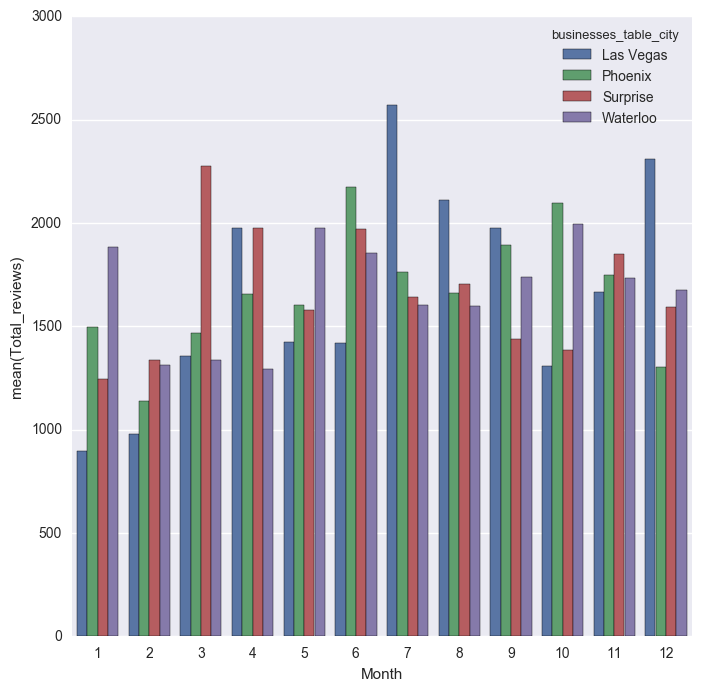

In [47]:
#Convert Date to DateTime and create month column
df['reviews_table_date'] =  pd.to_datetime(df['reviews_table_date'], format='%Y-%m-%d')
df['Month'] = df.reviews_table_date.dt.month

#Group reviwes by city and month
city_month_tots = df.groupby('businesses_table_city')['Month'].value_counts()
city_month_tots = city_month_tots.reset_index(name='Total_reviews')
city_month_tots = city_month_tots.sort_values(by=['businesses_table_city','Month'])

#Make bar chart
plt.clf()
#fig, ax = plt.subplots(figsize=(8,8))
# g = sns.factorplot(data=city_month_tots, row='businesses_table_city')
# g.map(sns.barplot(), 'Month','Total_reviews')

fig, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(x='Month', y='Total_reviews', hue='businesses_table_city', data=city_month_tots)

#city_month_tots.plot.bar(x='Month', y='Total_reviews', ax=ax)
plt.show()


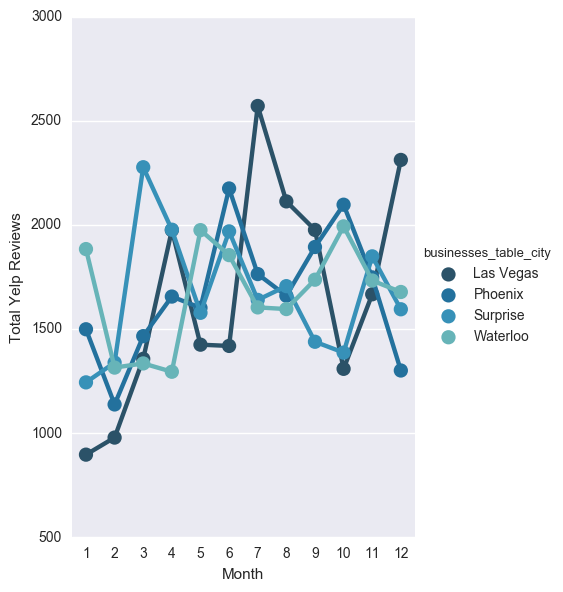

Standered Divs of Reviews Per Month
businesses_table_city
Las Vegas    525.103799
Phoenix      301.099651
Surprise     305.222869
Waterloo     247.618658
Name: Total_reviews, dtype: float64
one way f-test coparing total reviesws per month by city: F_onewayResult(statistic=0.0, pvalue=1.0)


In [50]:
import matplotlib.pyplot as plt
import scipy.stats as stats


# plt.clf()
# fig, ax = plt.subplots(figsize=(8,8)) 
city_month_tots = df.groupby('businesses_table_city')['Month'].value_counts()
city_month_tots = city_month_tots.reset_index(name='Total_reviews')
# #print city_month_tots
# city_month_tots.plot.bar(x='Month', y='Total_reviews', ax=ax)
# plt.show()


sns.factorplot(x="Month", y="Total_reviews", hue="businesses_table_city", color='light_palette', \
               data=city_month_tots, \
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
plt.ylabel('Total Yelp Reviews')
plt.show()

print "Standered Divs of Reviews Per Month"
print city_month_tots.groupby('businesses_table_city')['Total_reviews'].std()

lv_tr = city_month_tots.groupby('businesses_table_city').get_group('Las Vegas')['Total_reviews']
phoenix_tr = city_month_tots.groupby('businesses_table_city').get_group('Phoenix')['Total_reviews']
surprise_tr = city_month_tots.groupby('businesses_table_city').get_group('Surprise')['Total_reviews']
waterloo_tr = city_month_tots.groupby('businesses_table_city').get_group('Waterloo')['Total_reviews']

print "one way f-test coparing total reviesws per month by city:",stats.f_oneway(lv_tr, phoenix_tr, surprise_tr, waterloo_tr)

del city_month_tots


### Things other citys are talking about that Los Vages is not.

In [94]:
#just holding another frame in memory and checking out the col values
df_raw = df

frequncy_df = df_raw.groupby('businesses_table_city').sum().T.sort_values(by='Las Vegas', ascending=False)
frequncy_df["Total"] = frequncy_df.Phoenix + frequncy_df.Surprise + frequncy_df.Waterloo + frequncy_df['Las Vegas']
frequncy_df["Precent_Vegas"] = frequncy_df['Las Vegas']/frequncy_df['Total']
frequncy_df.sort_values(by=['Total'], ascending=False,inplace=True)
frequncy_df = frequncy_df[frequncy_df['Total']>0]

#frequncy_df.sort_values(by=['Precent_Vegas'], ascending=False, inplace=True)

frequncy_df = frequncy_df[frequncy_df.Precent_Vegas==0].sort_values(by=['Total'], ascending=False)
print frequncy_df


businesses_table_city               Las Vegas  Phoenix  Surprise  Waterloo  \
reviews_table_votes_useful                0.0  23782.0   19199.0   11627.0   
reviews_table_great_atmosphere            0.0     56.0       0.0     545.0   
reviews_table_little_bit                  0.0    107.0      52.0     422.0   
reviews_table_really_enjoyed              0.0      0.0     157.0     419.0   
reviews_table_definitely_recommend        0.0     57.0     113.0     396.0   
reviews_table_service_friendly            0.0     31.0     259.0     211.0   
reviews_table_fried_chicken               0.0    155.0      56.0     140.0   
reviews_table_best_ve                     0.0      0.0     154.0     191.0   
reviews_table_service_excellent           0.0     53.0     161.0     117.0   
reviews_table_mashed_potatoes             0.0     78.0     136.0      54.0   
reviews_table_great_experience            0.0    125.0      52.0      76.0   
reviews_table_super_friendly              0.0     52.0     112.0

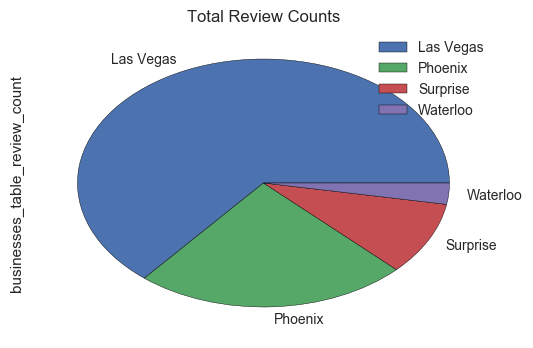

In [95]:
frequncy_df = df_raw.groupby('businesses_table_city').sum().T.sort_values(by='Las Vegas', ascending=False)
frequncy_df.T.plot.pie('businesses_table_review_count')
plt.title('Total Review Counts')

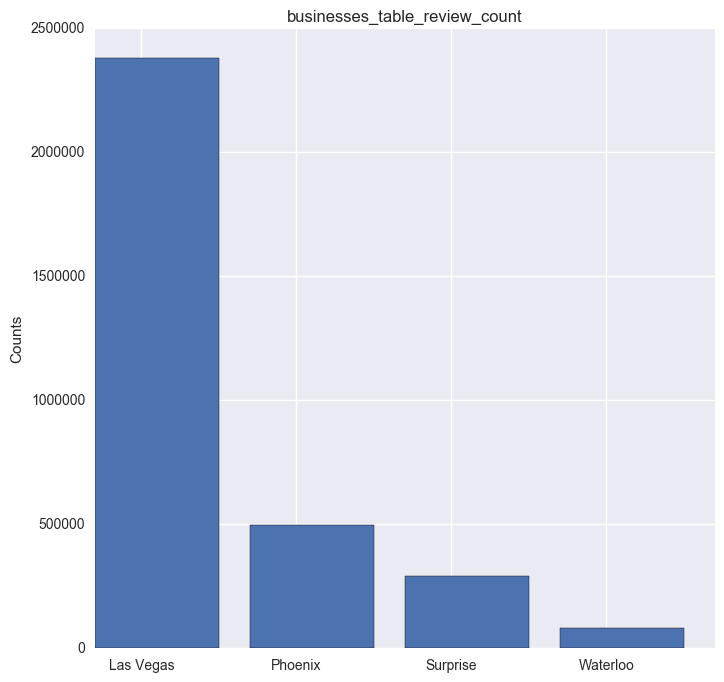

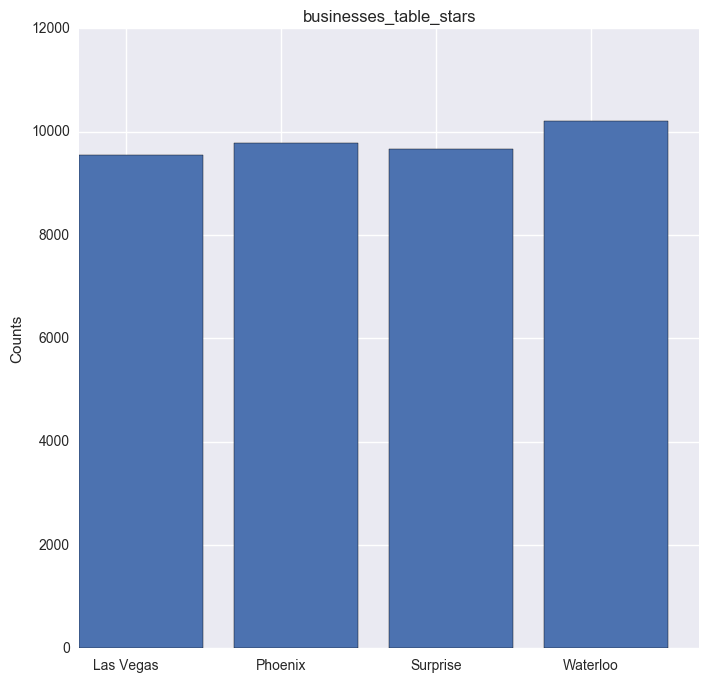

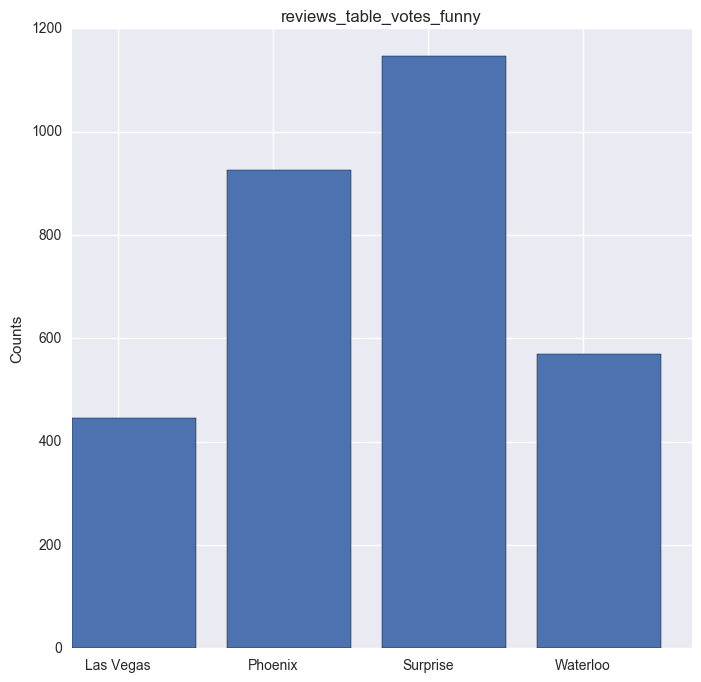

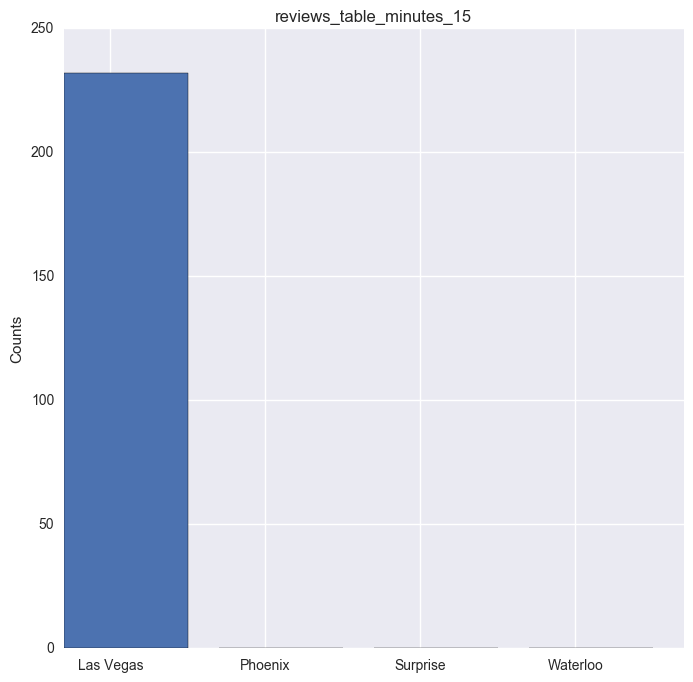

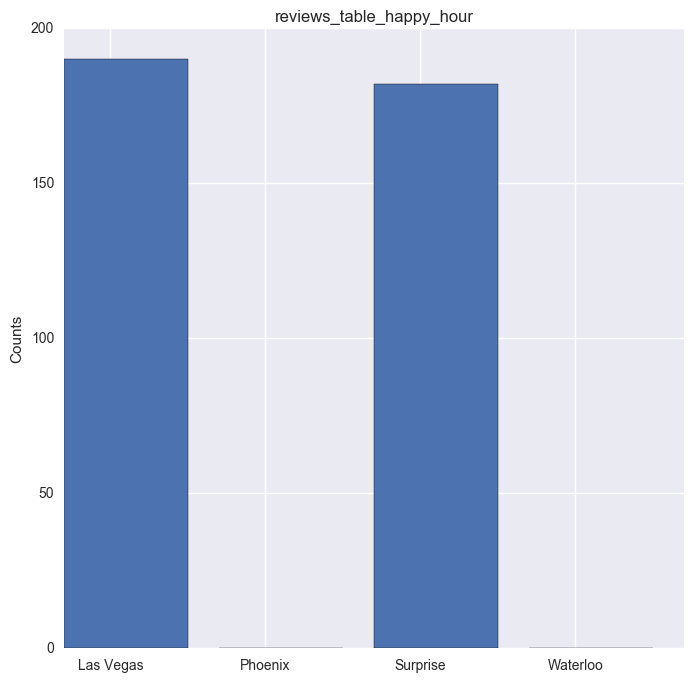

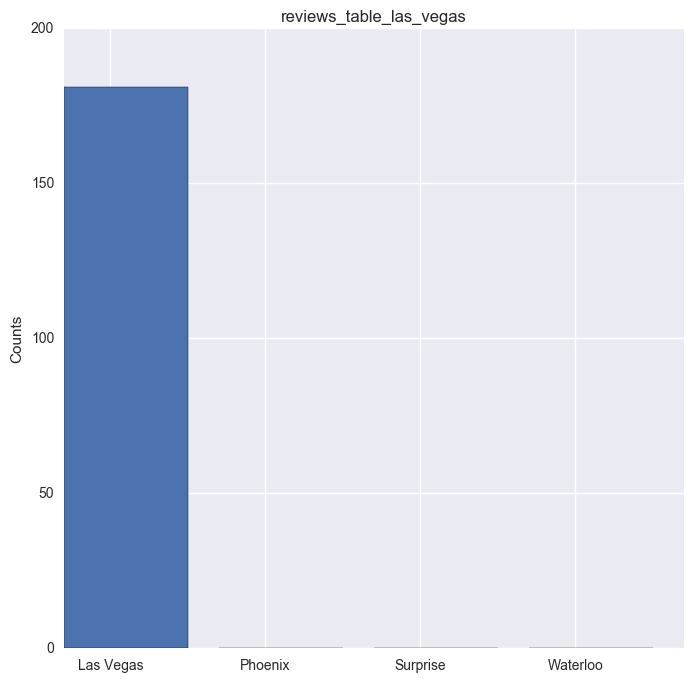

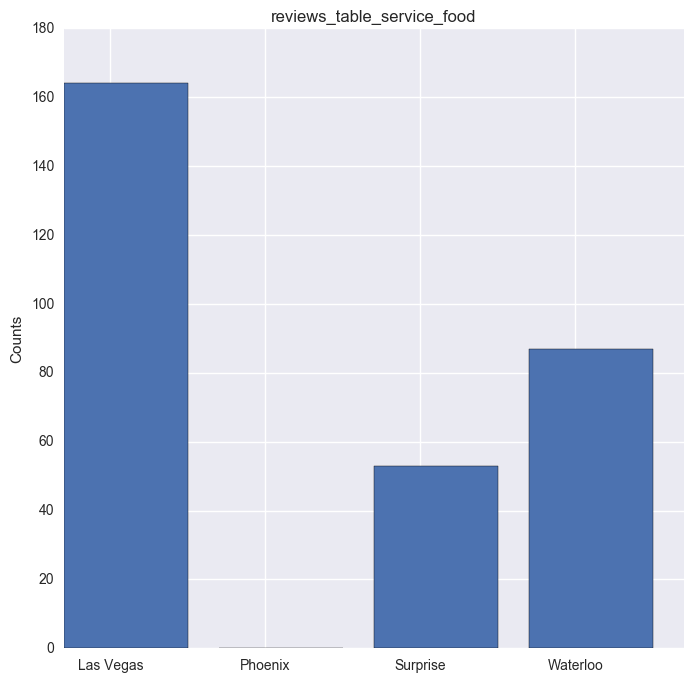

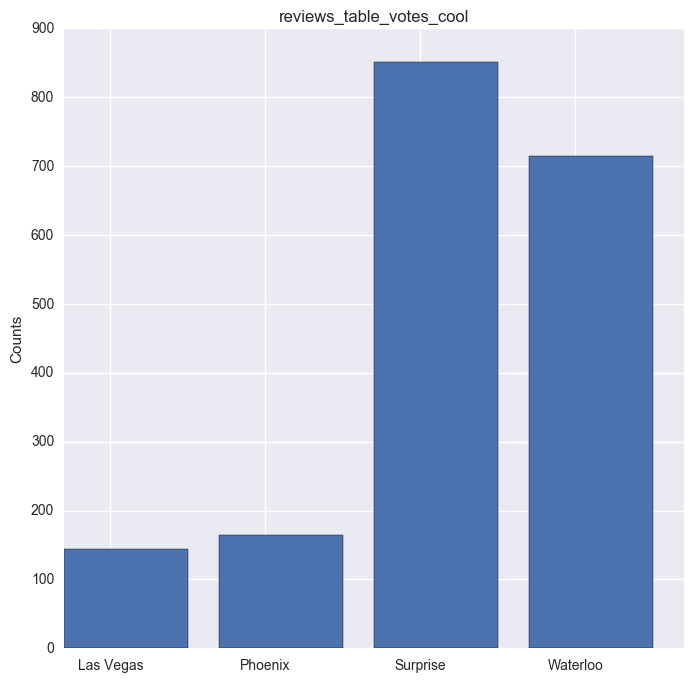

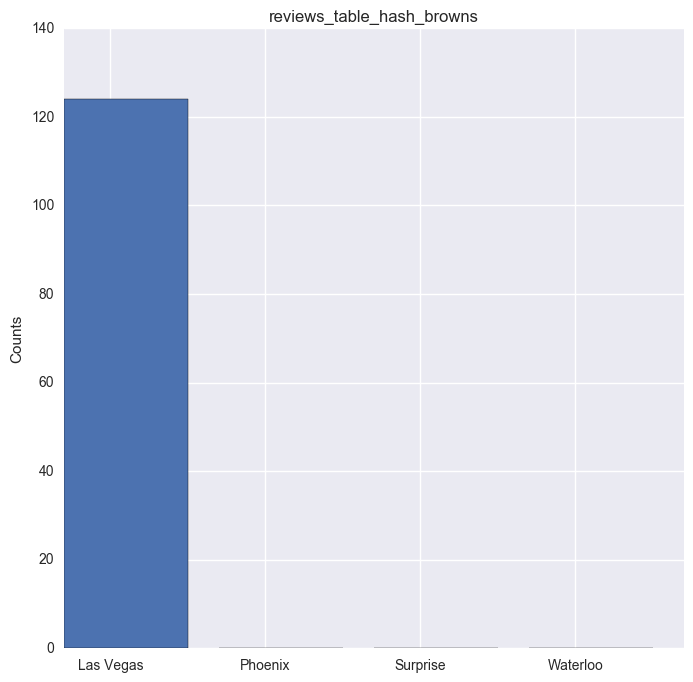

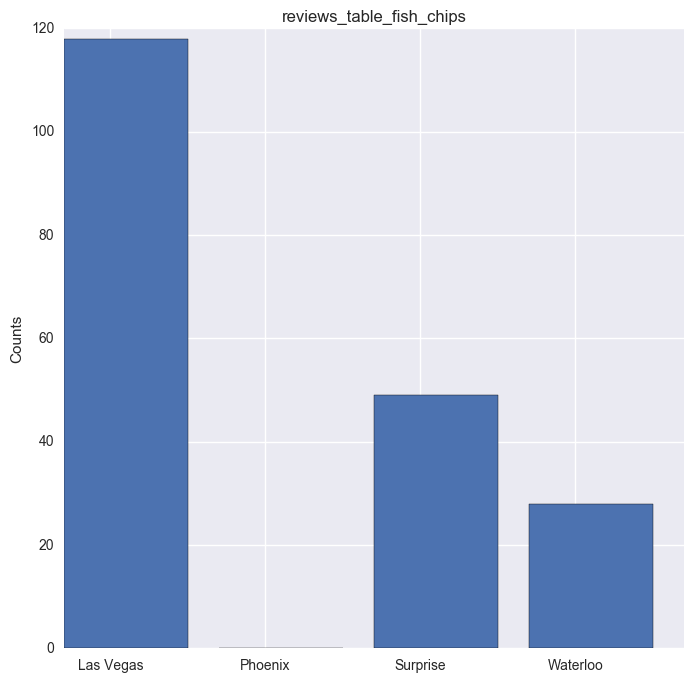

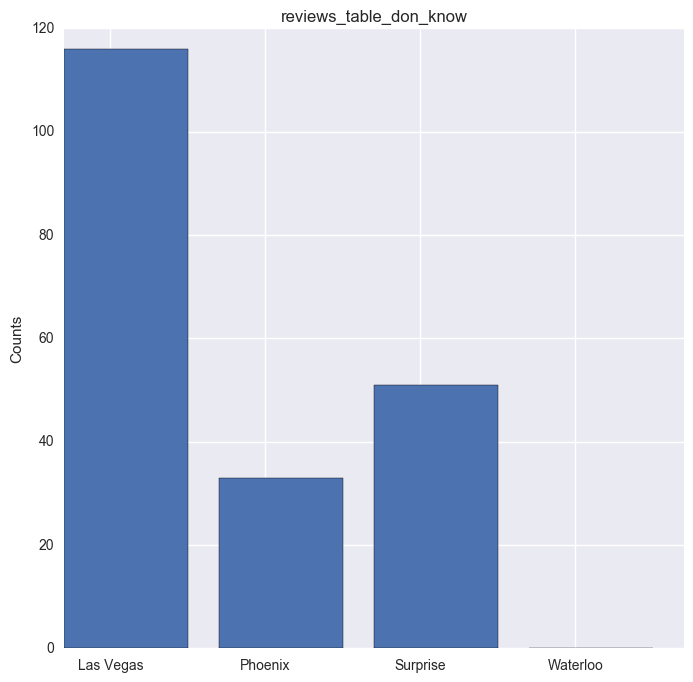

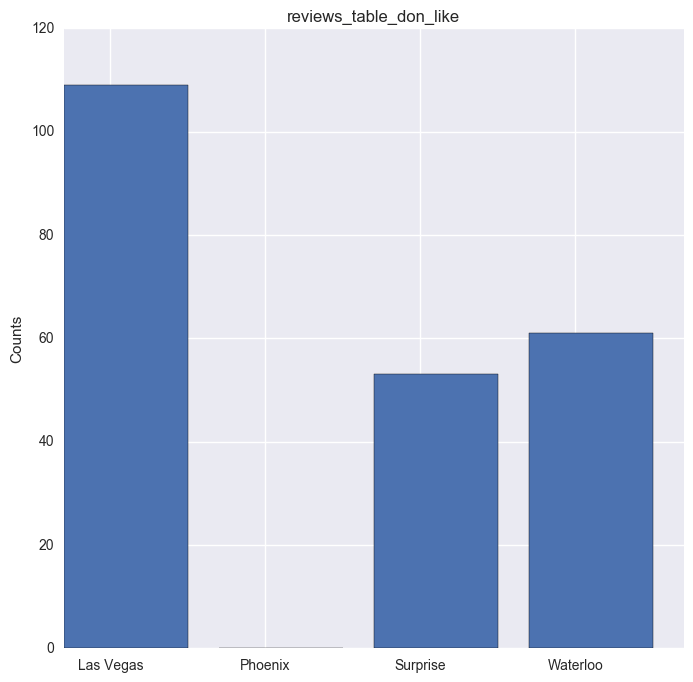

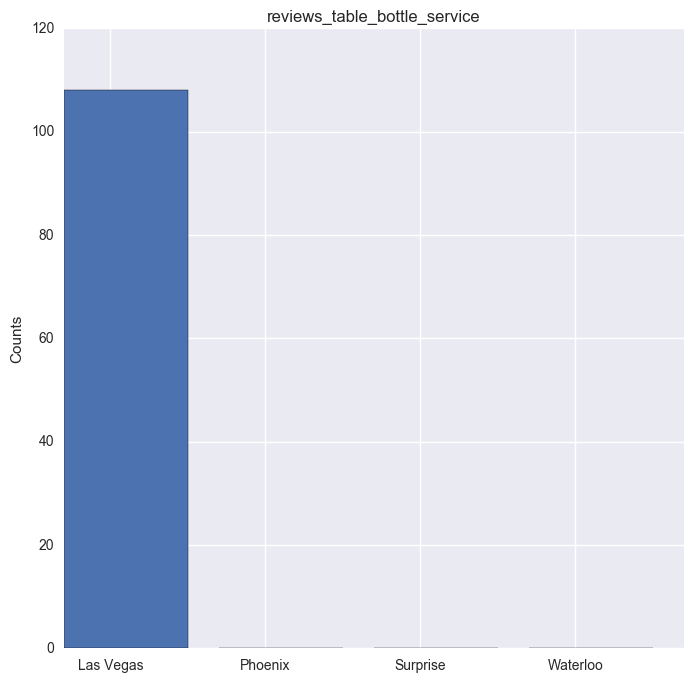

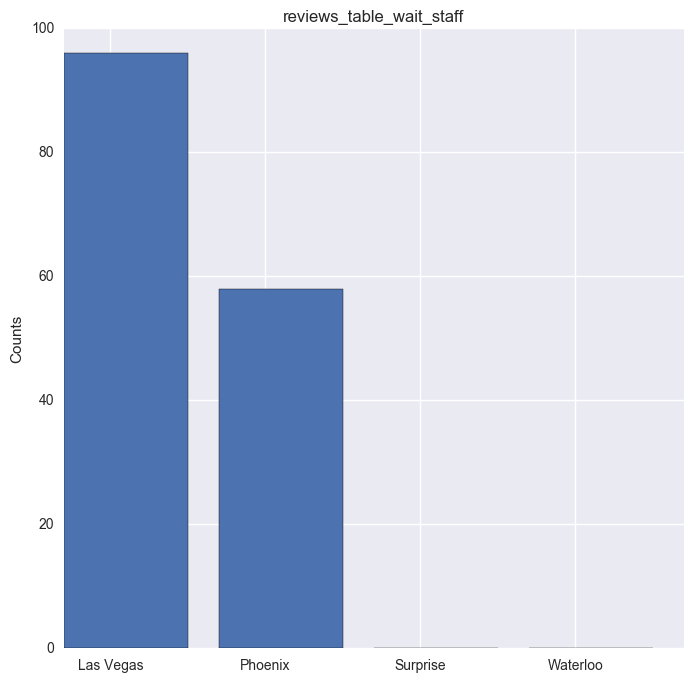

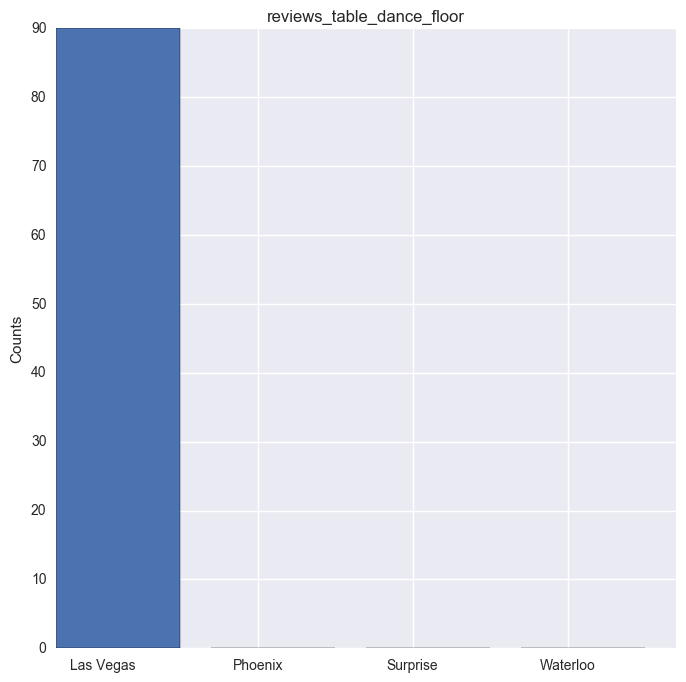

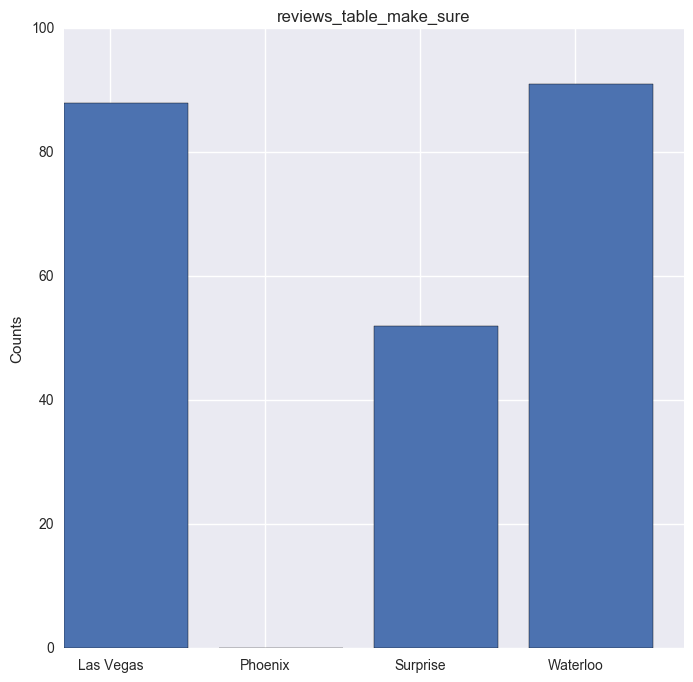

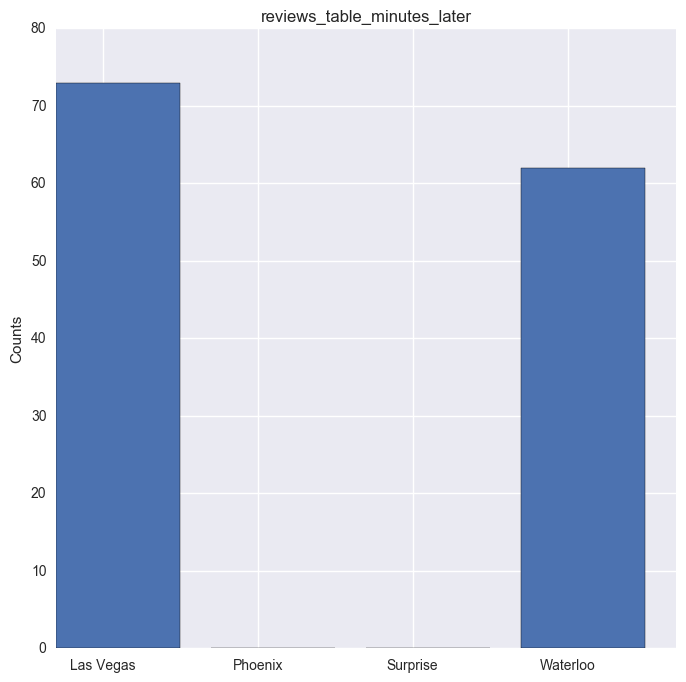

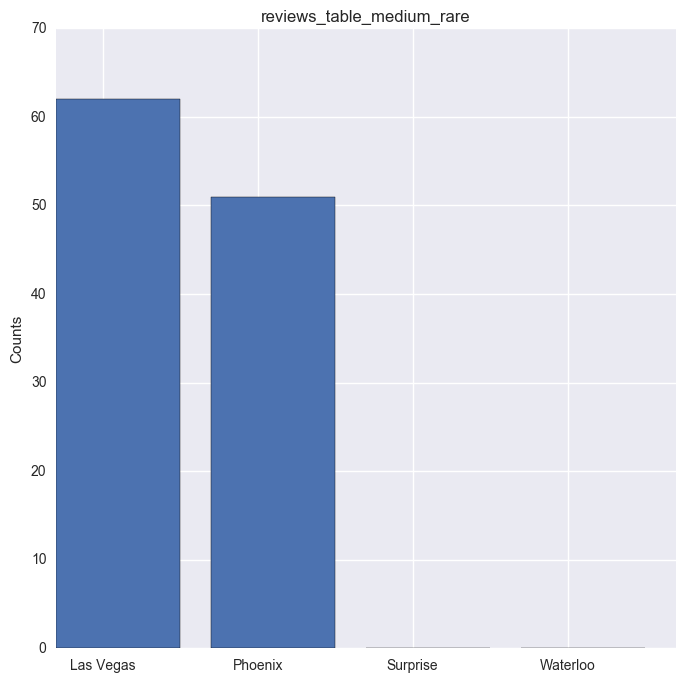

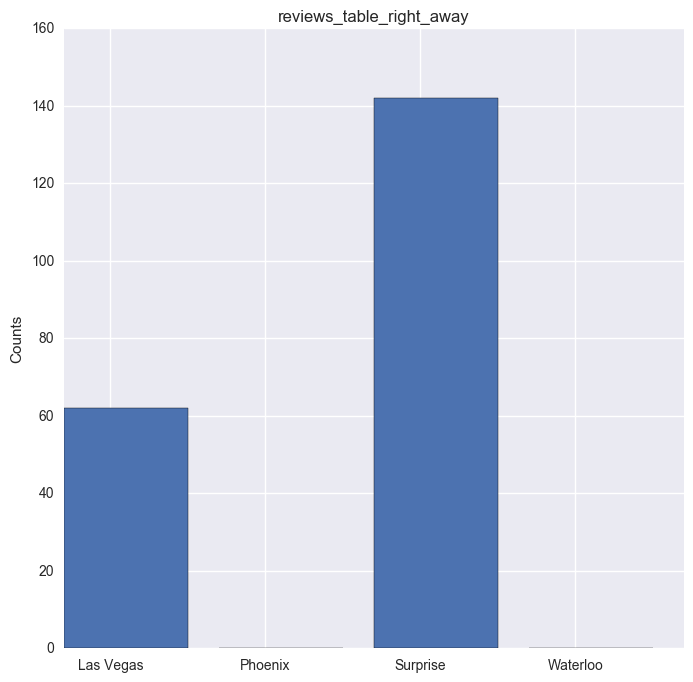

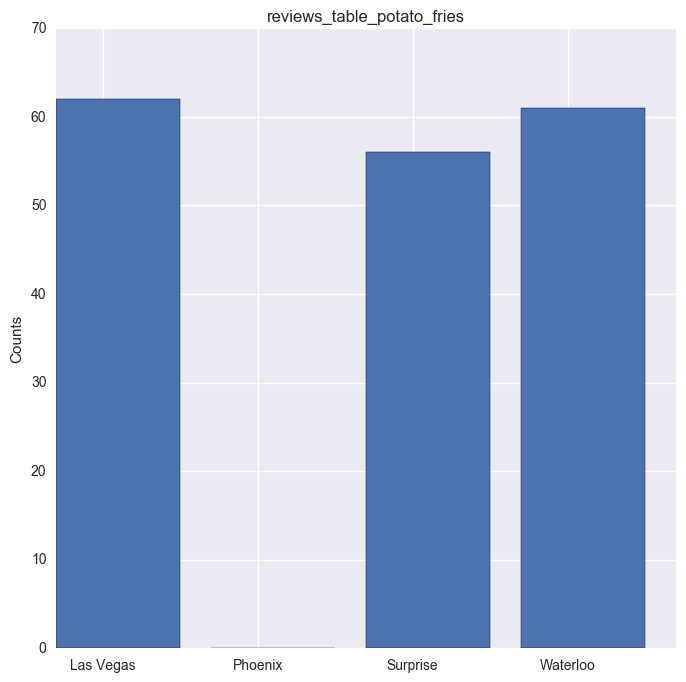

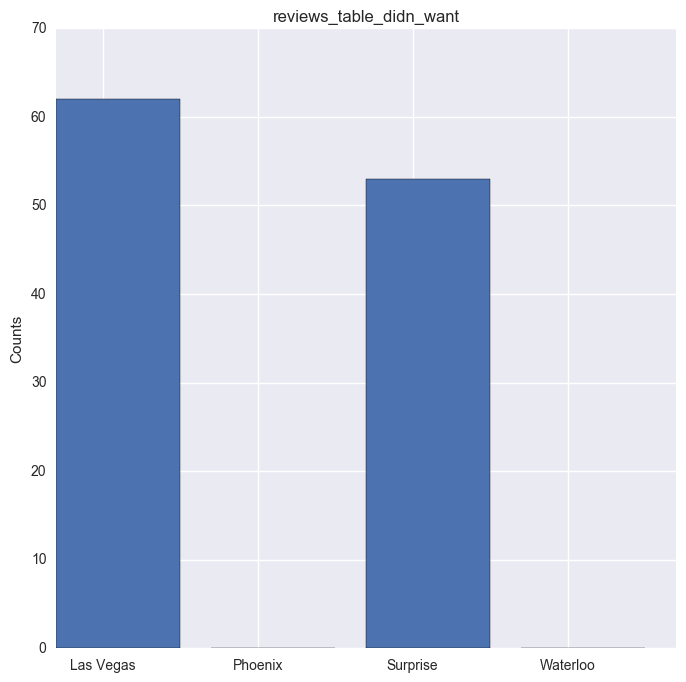

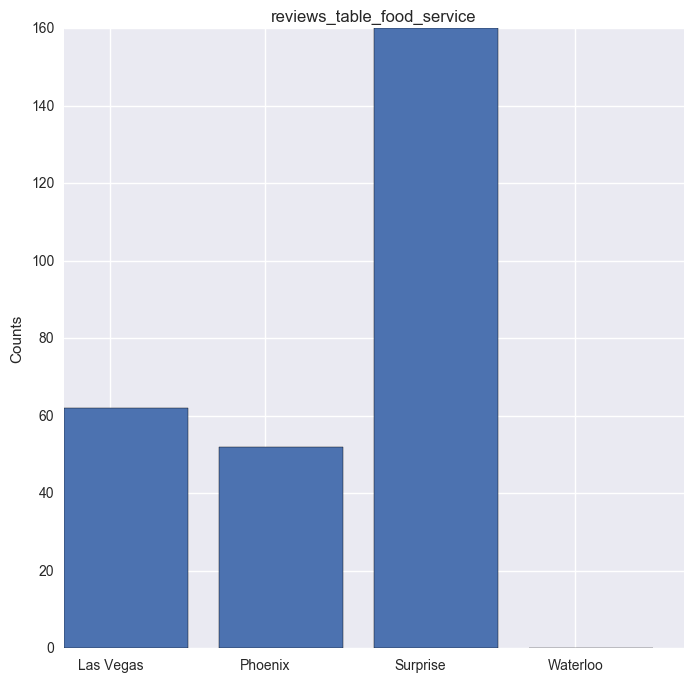

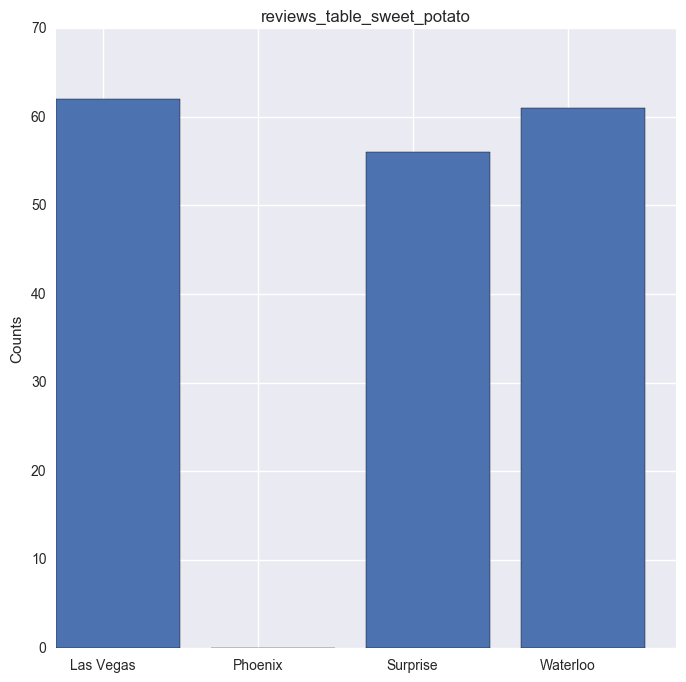

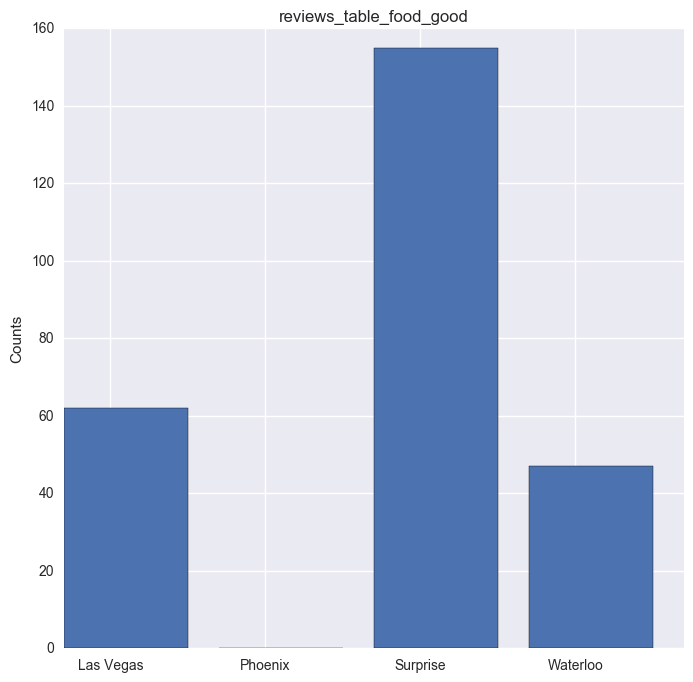

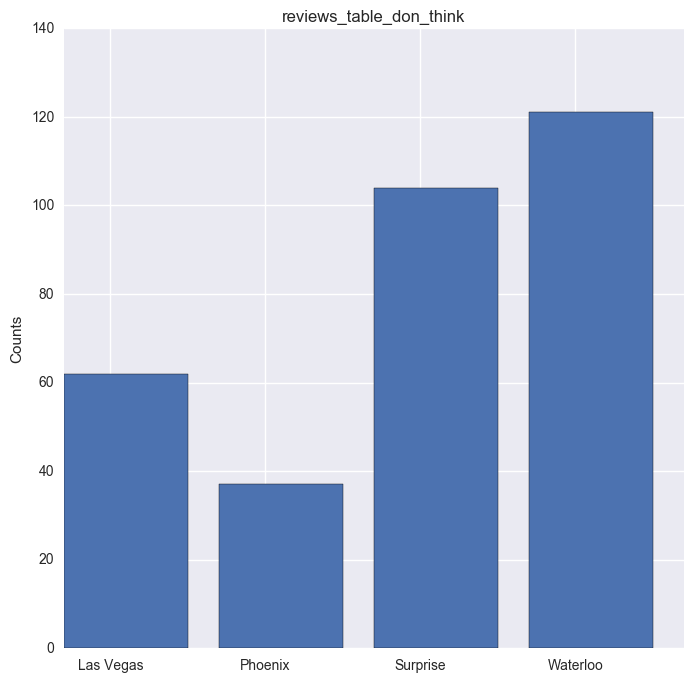

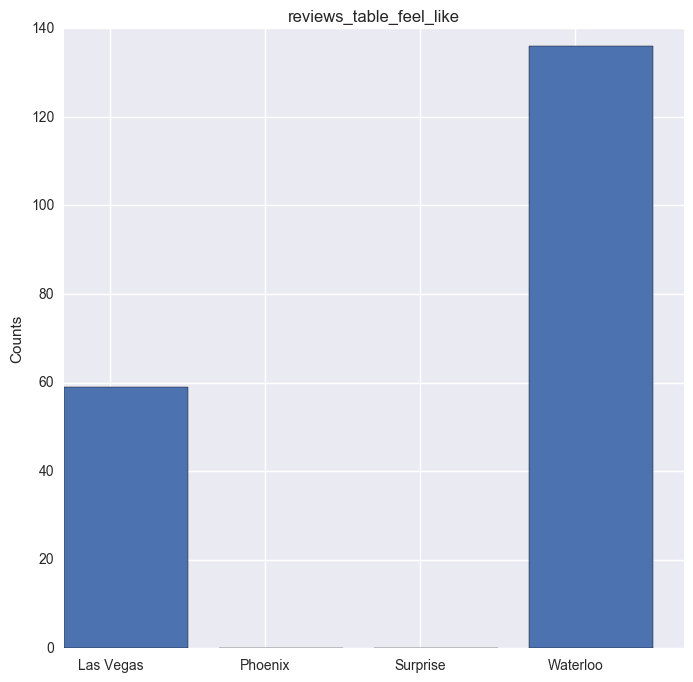

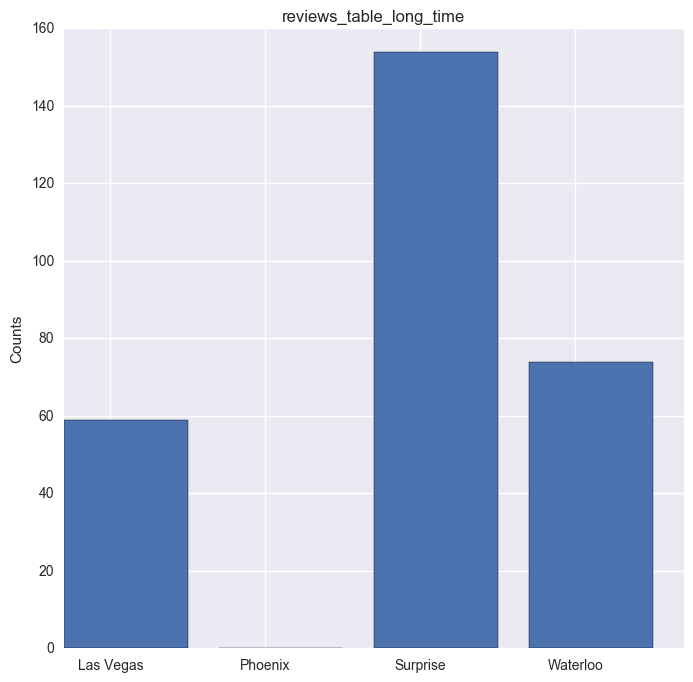

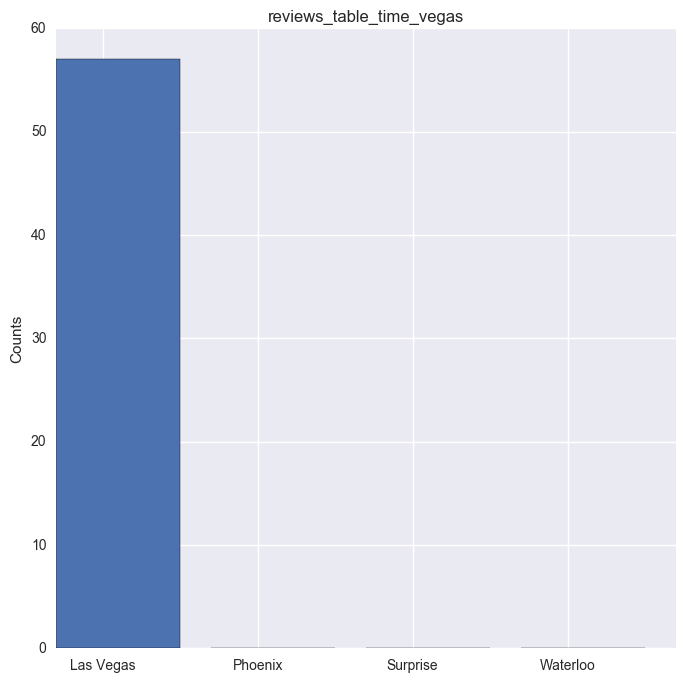

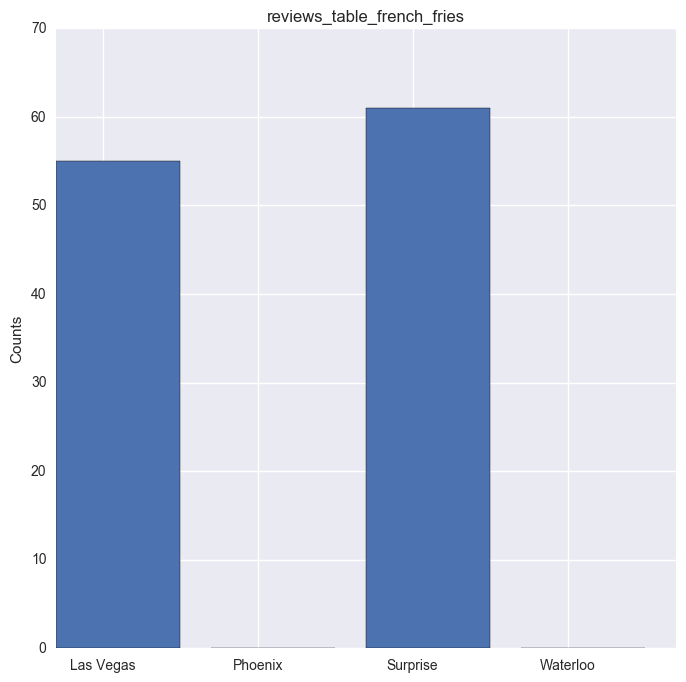

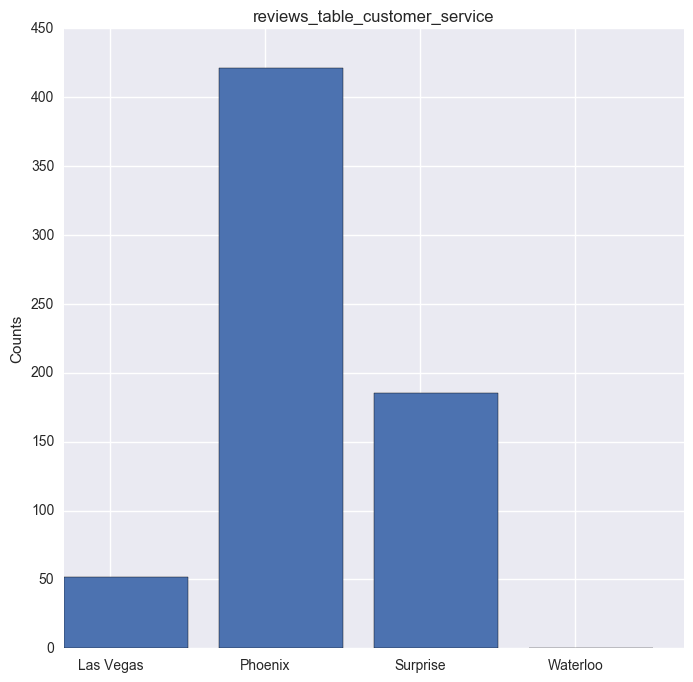

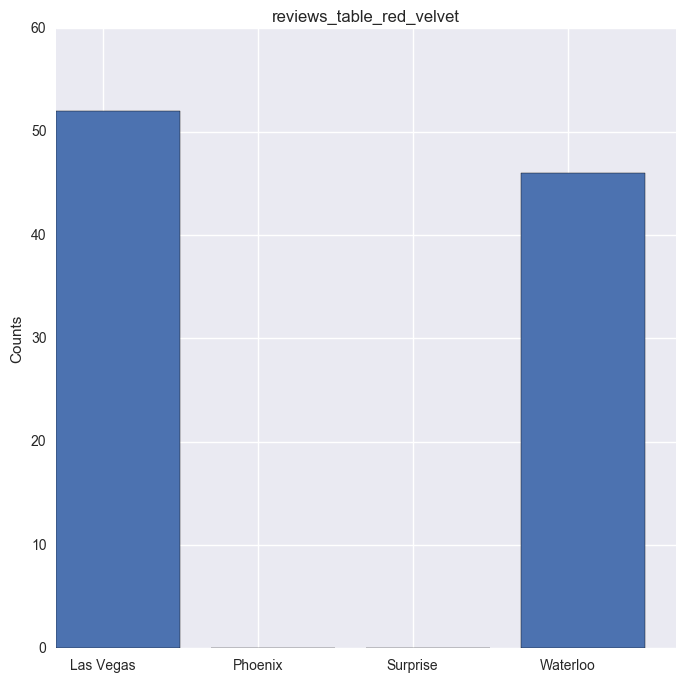

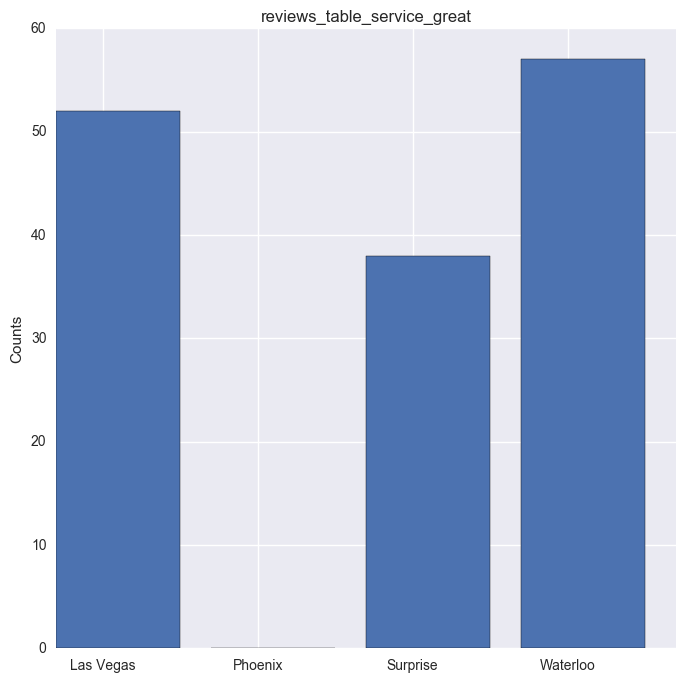

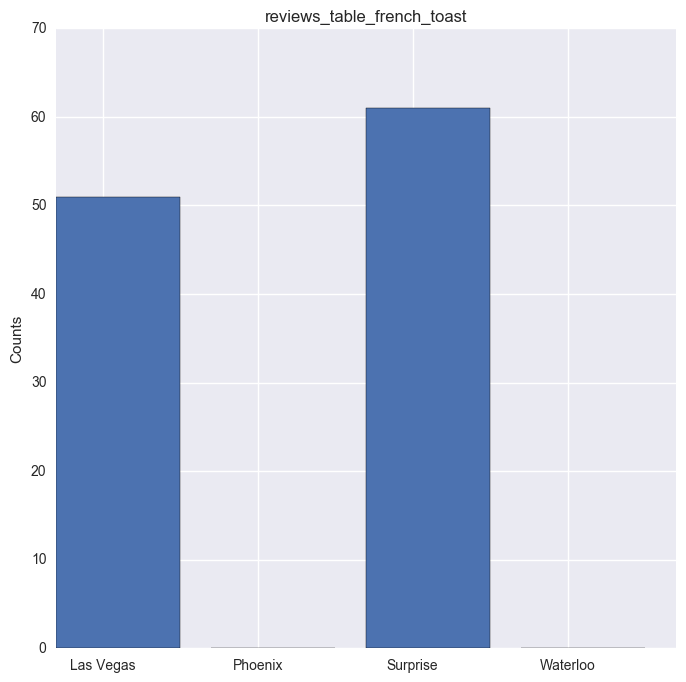

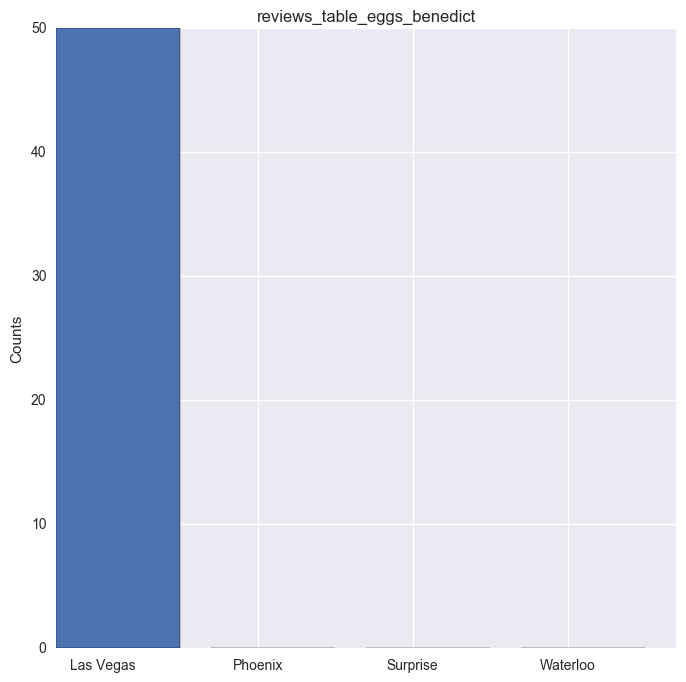

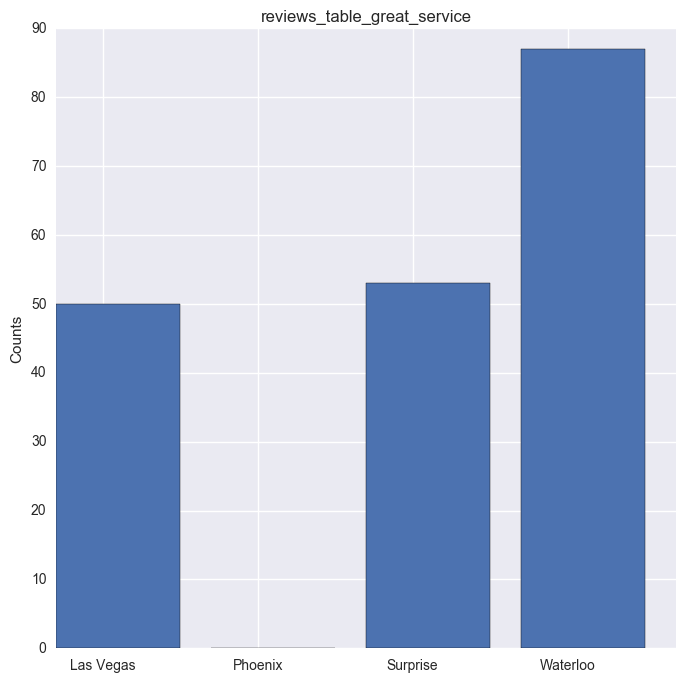

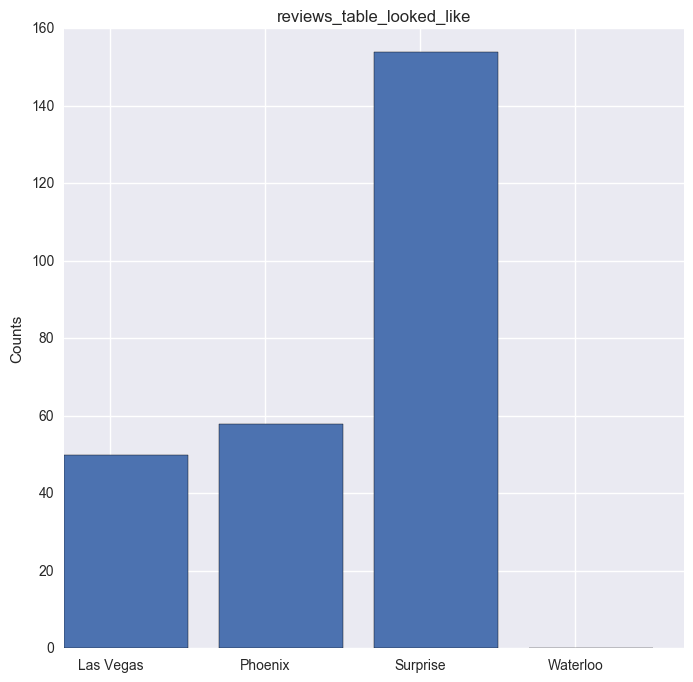

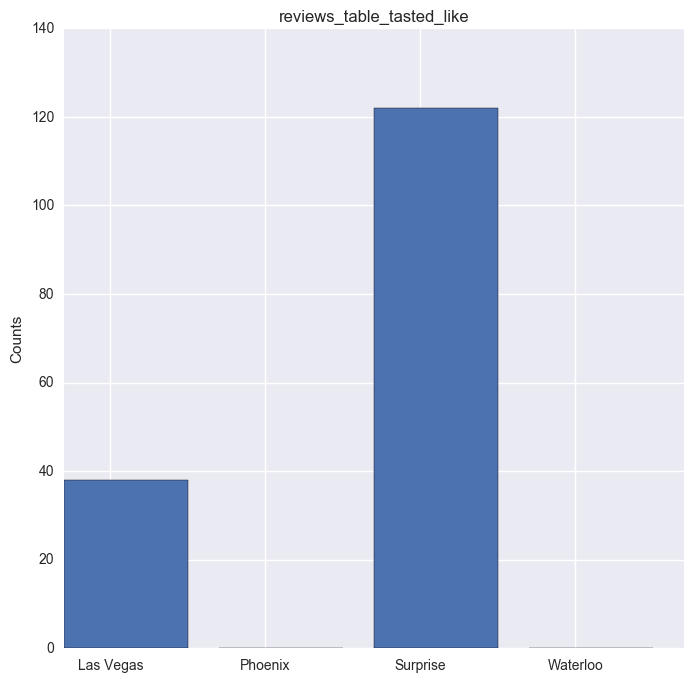

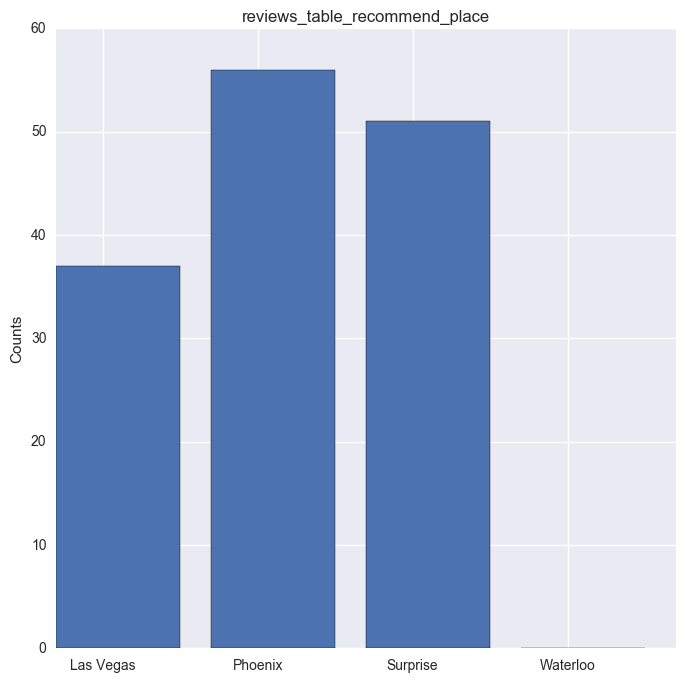

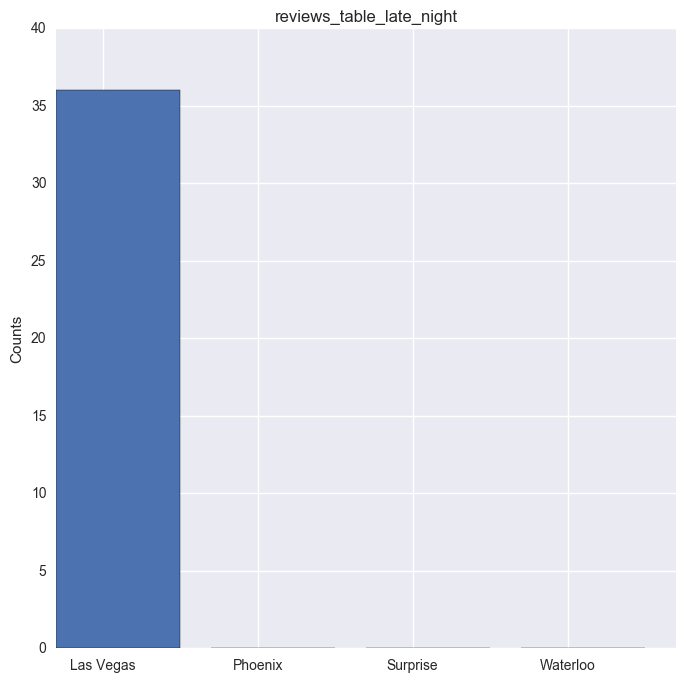

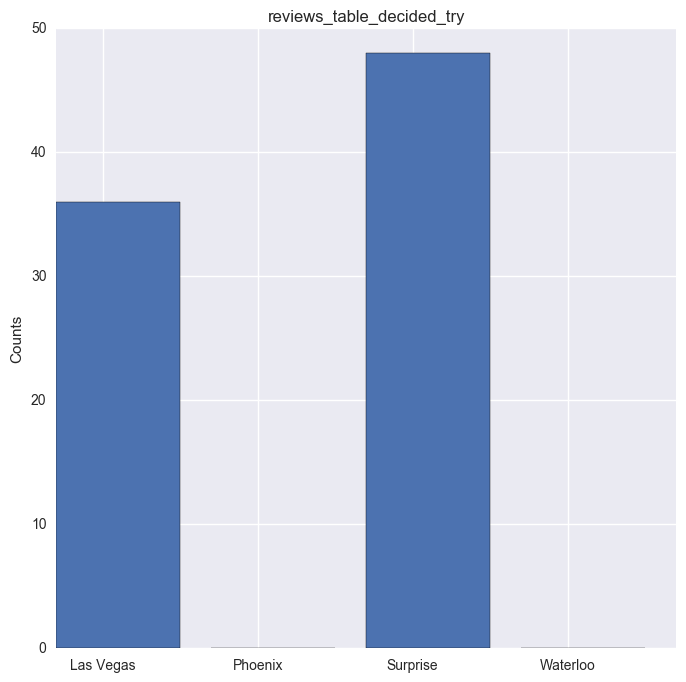

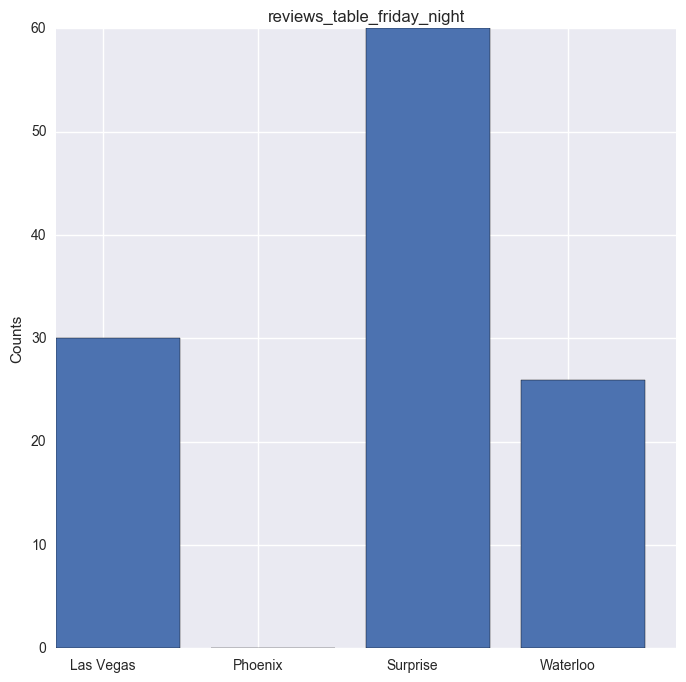

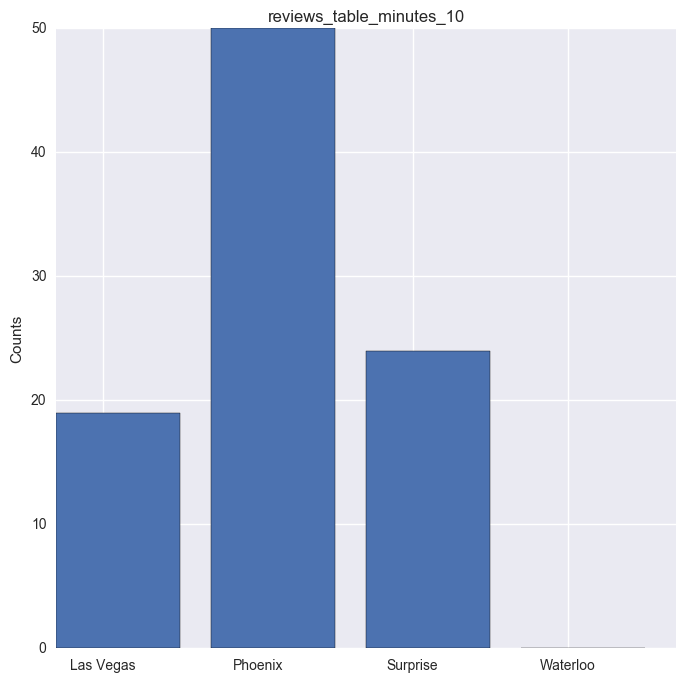

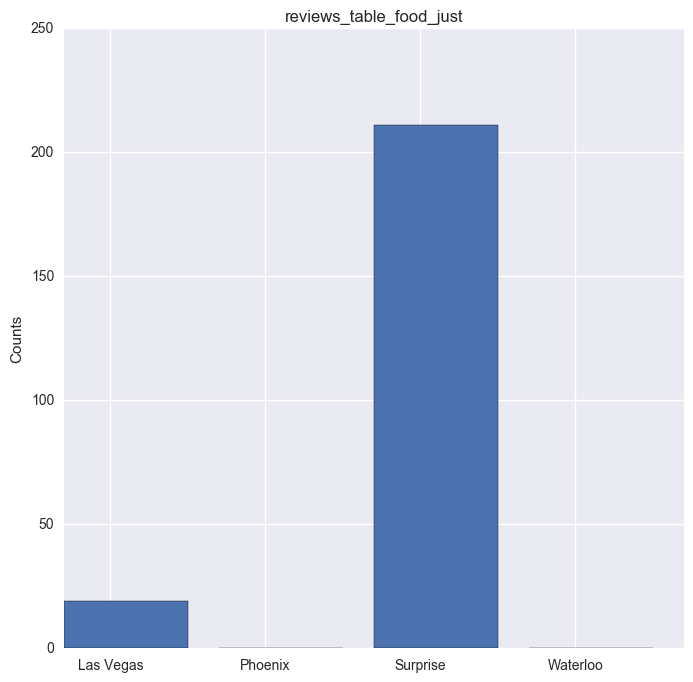

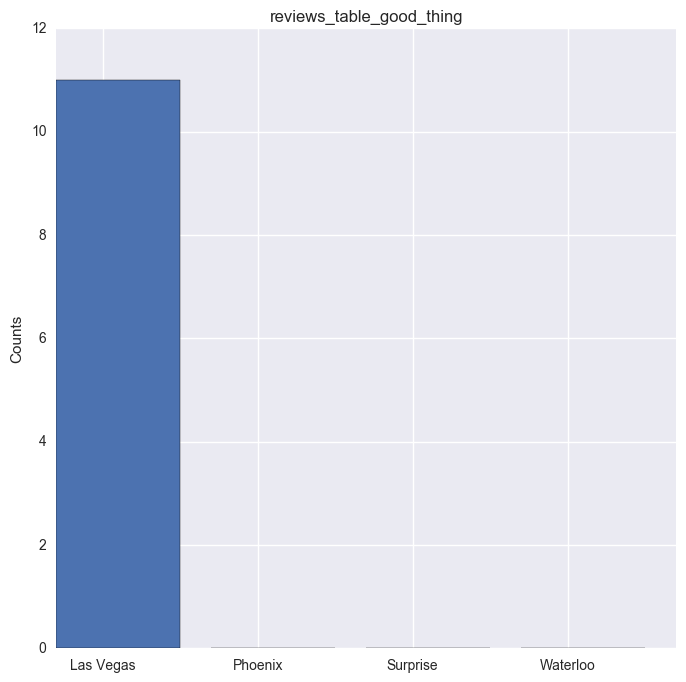

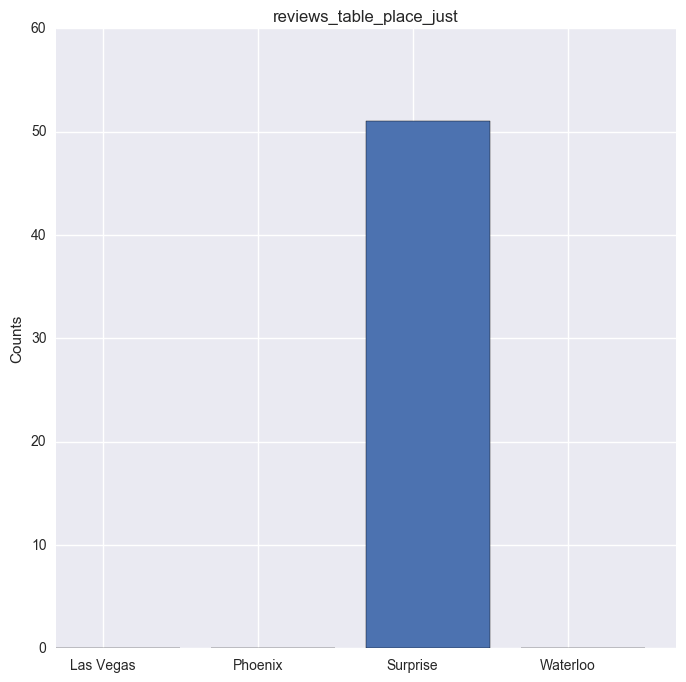

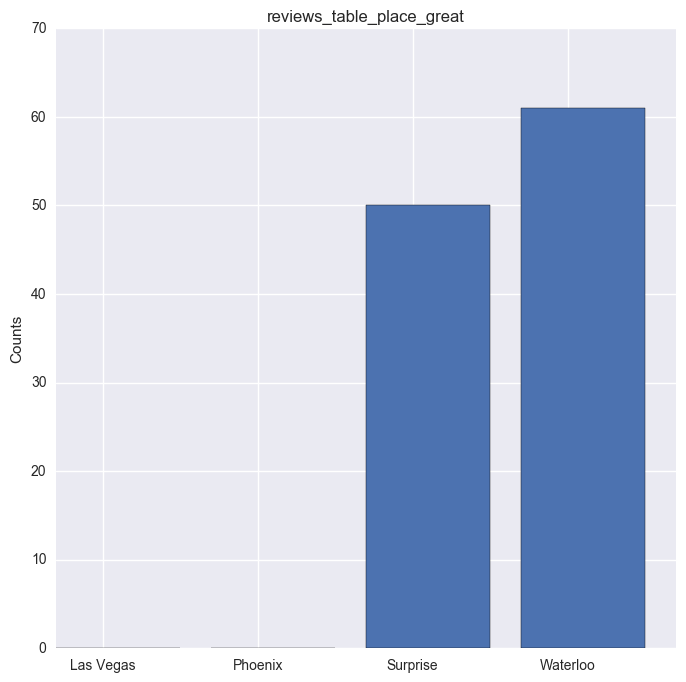

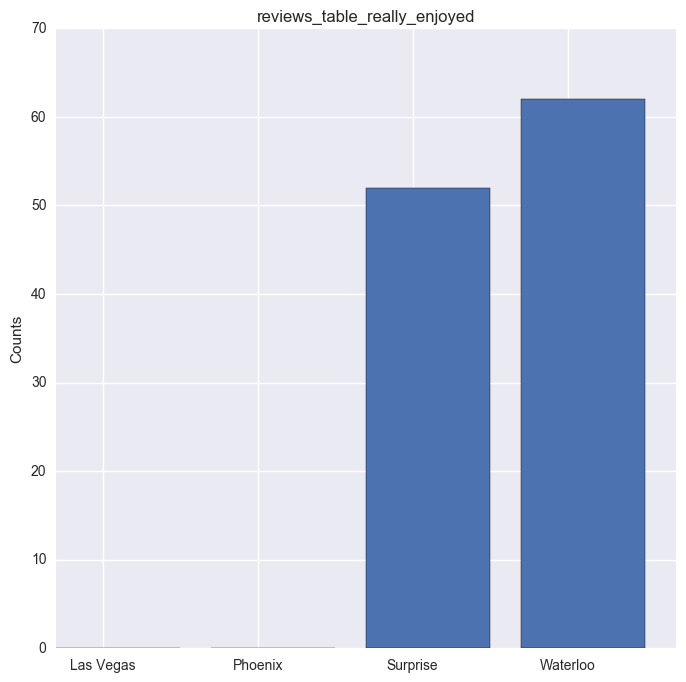

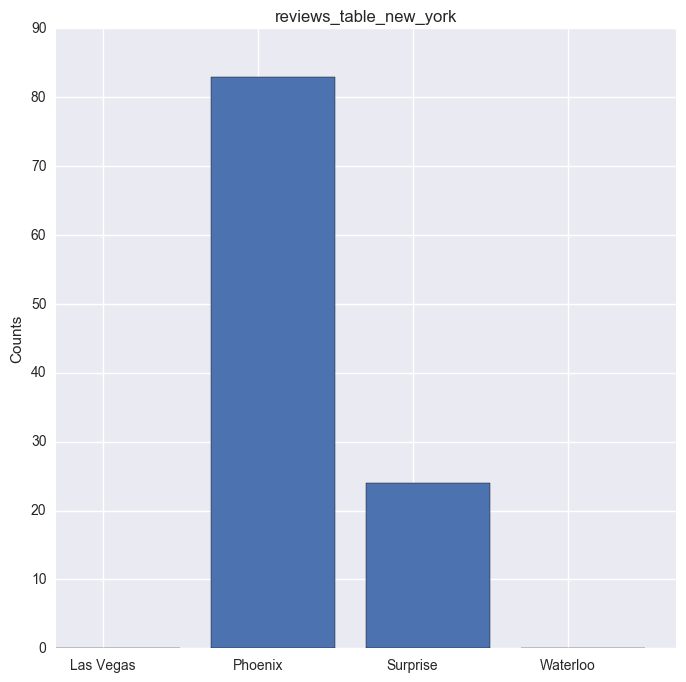

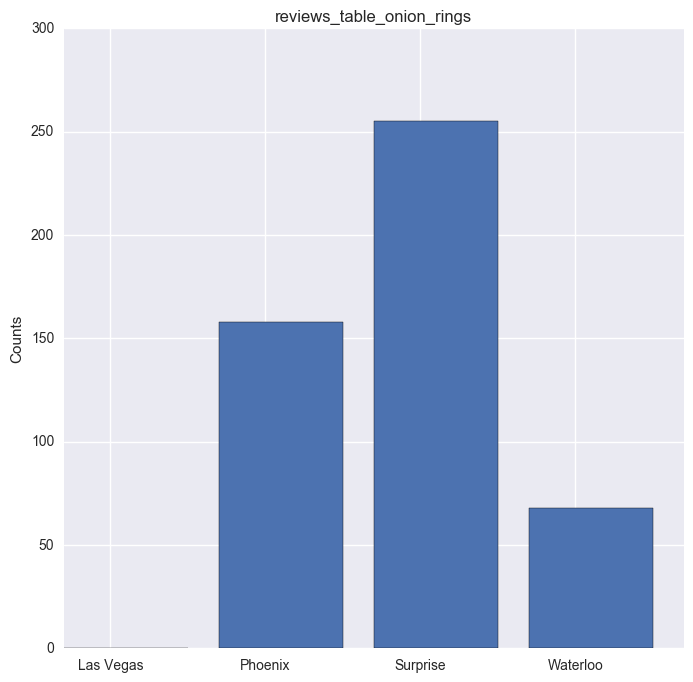

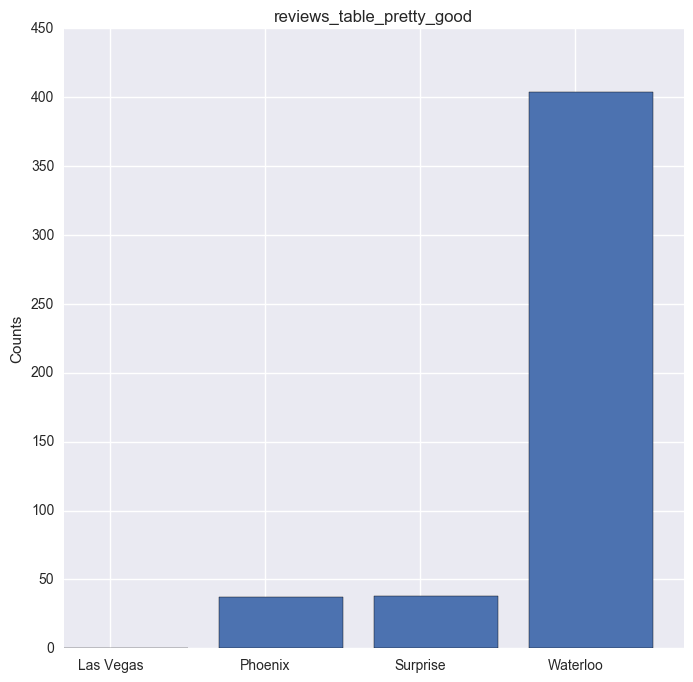

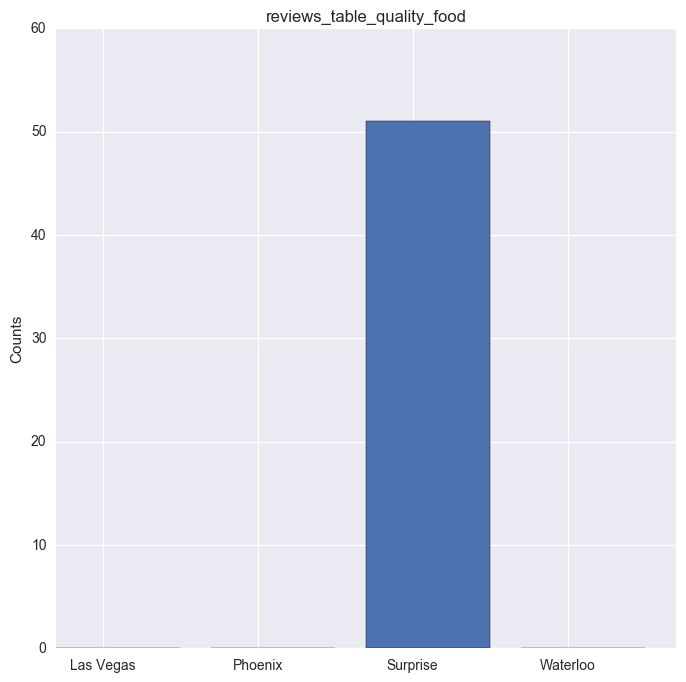

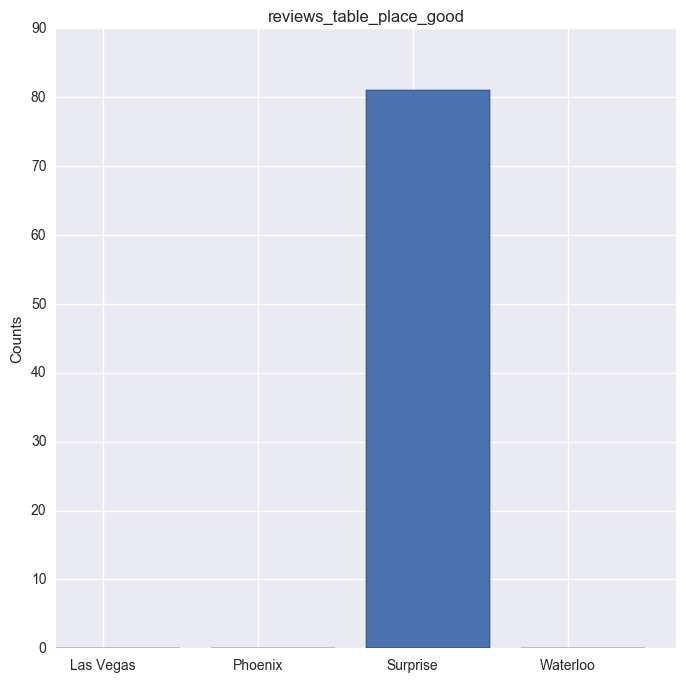

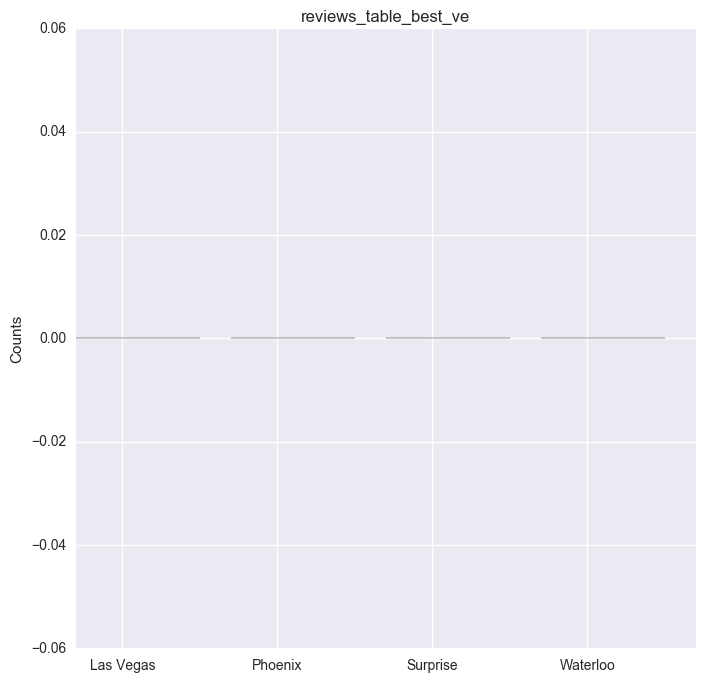

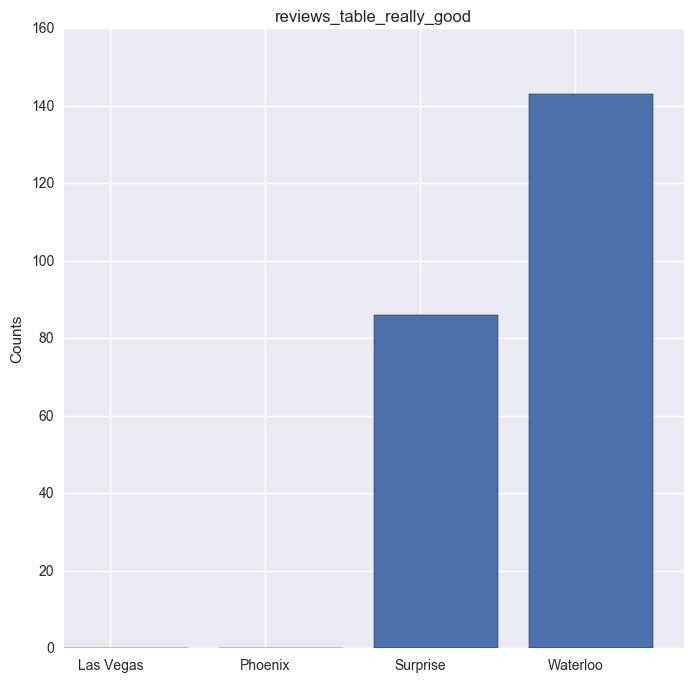

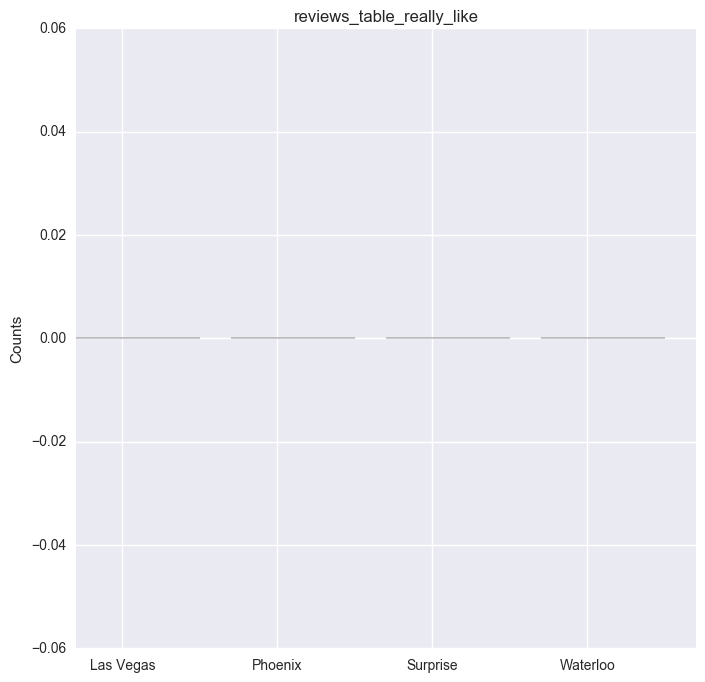

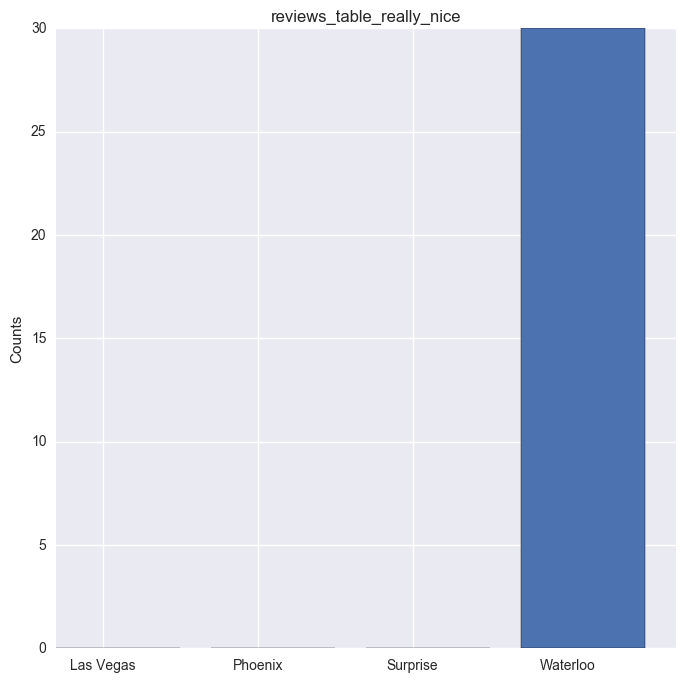

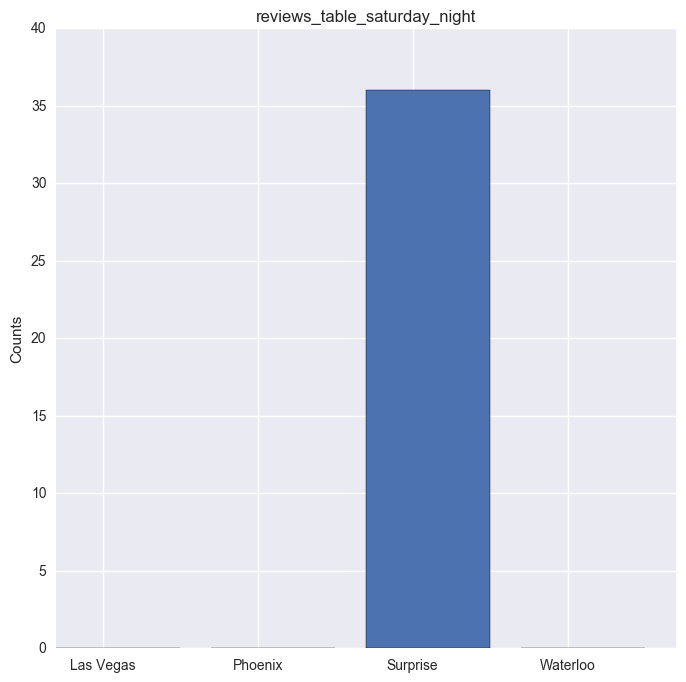

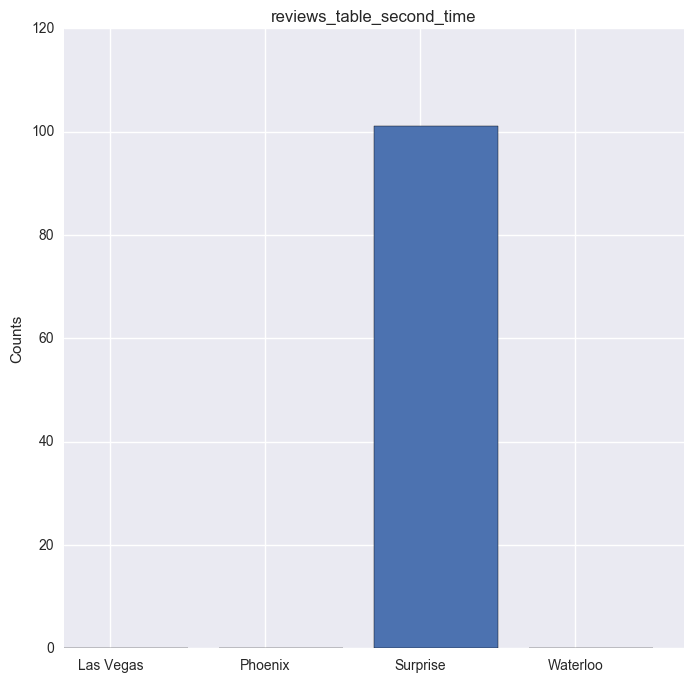

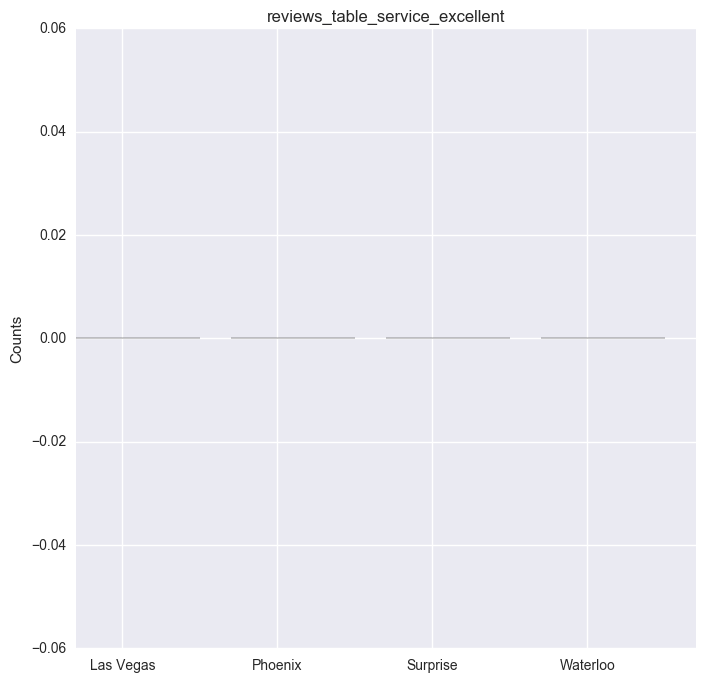

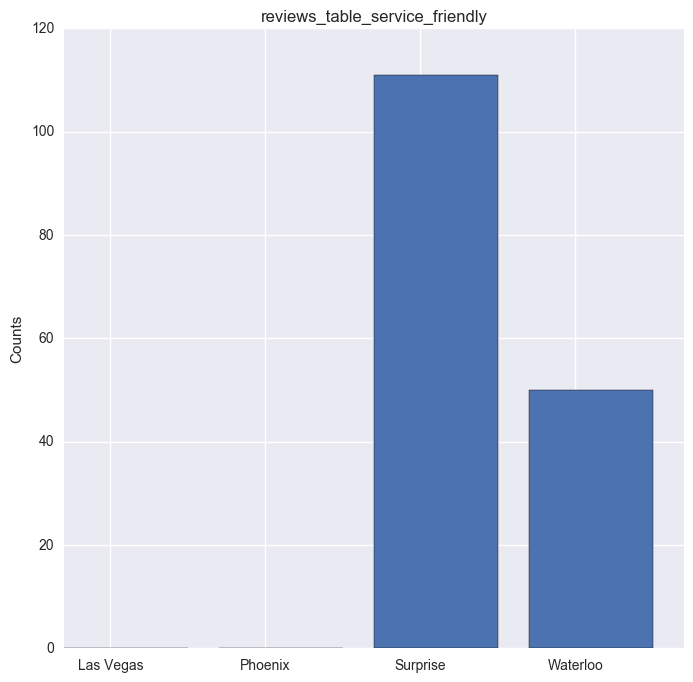

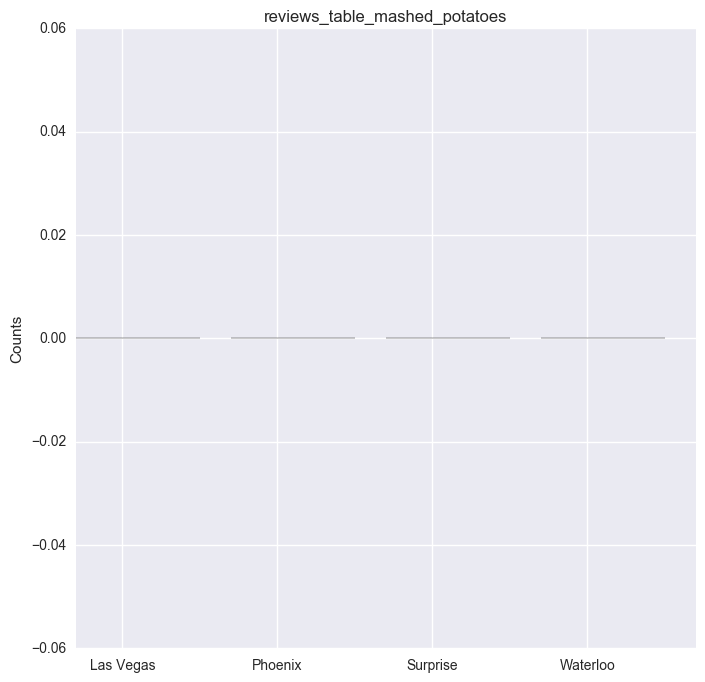

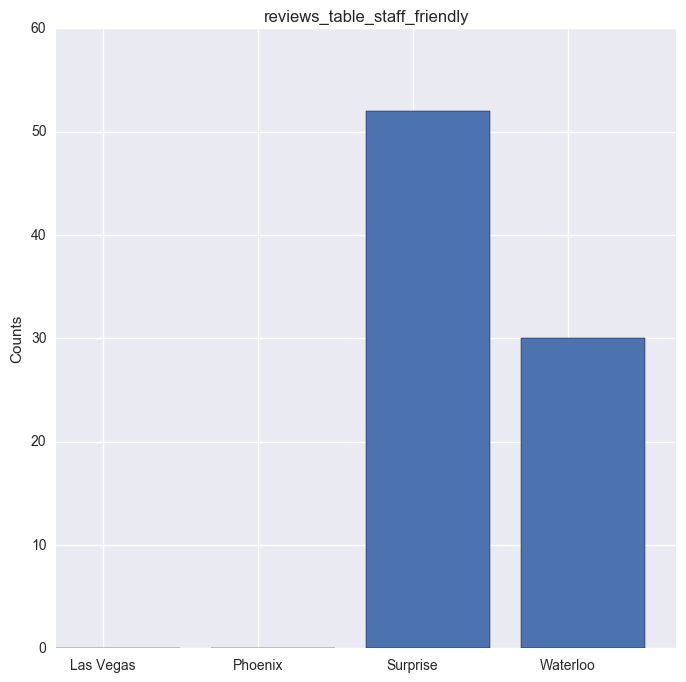

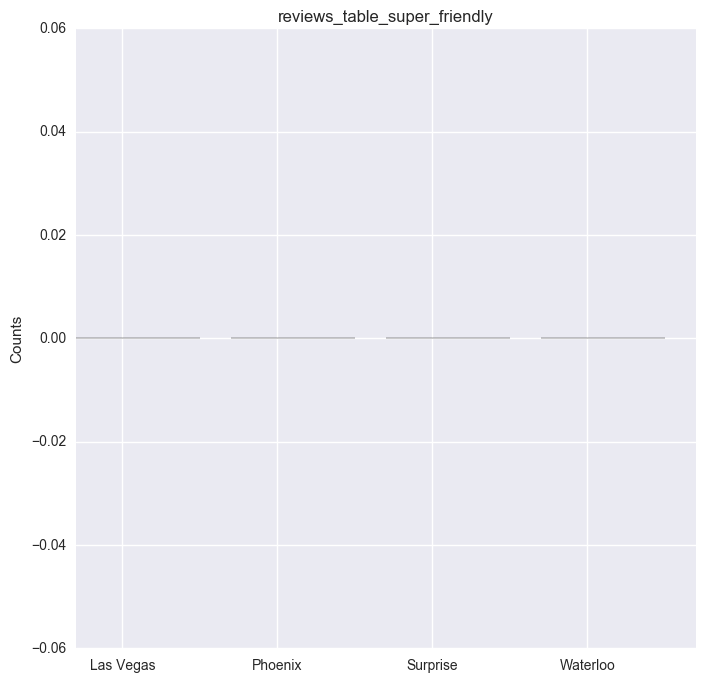

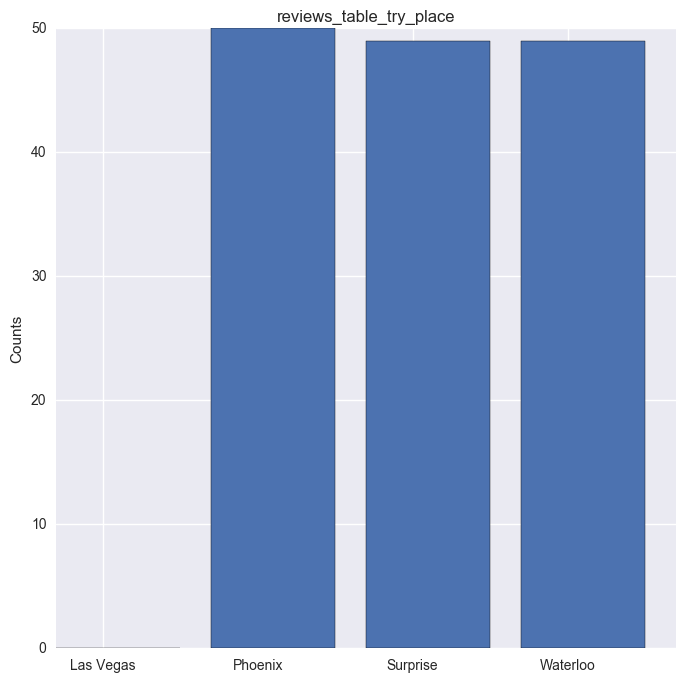

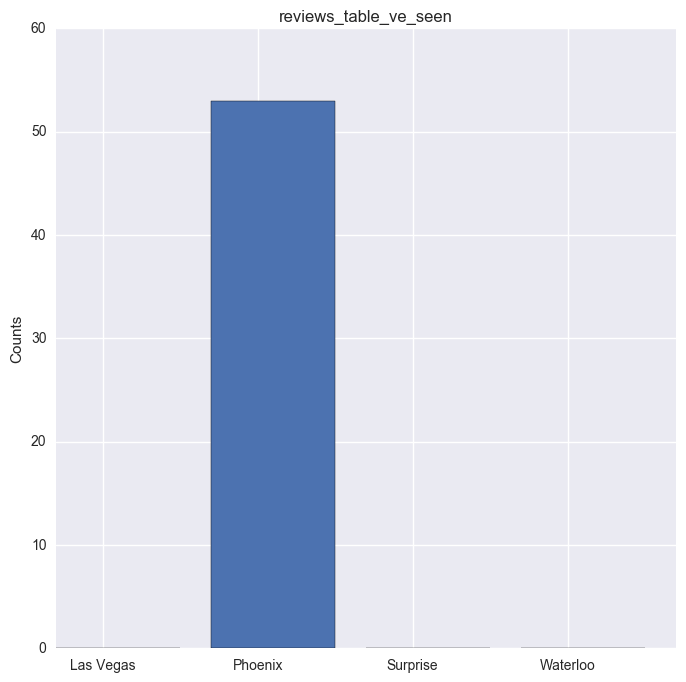

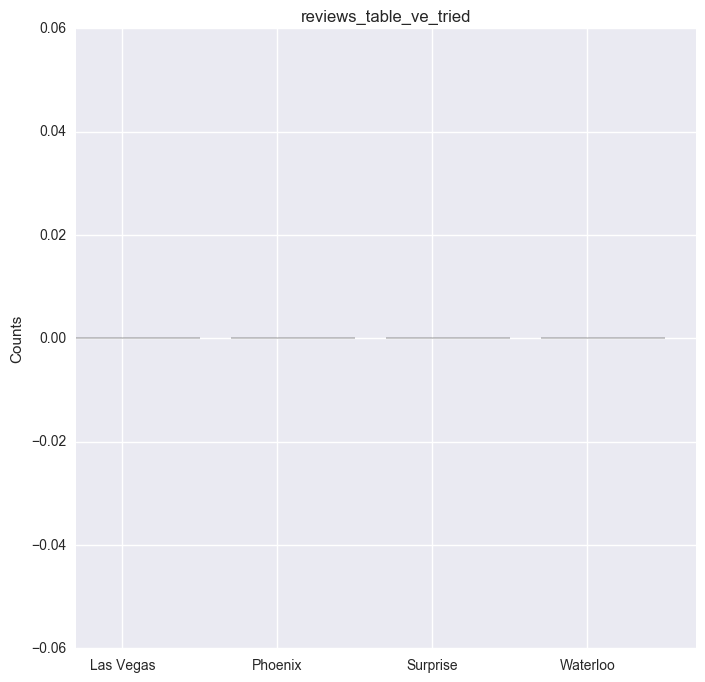

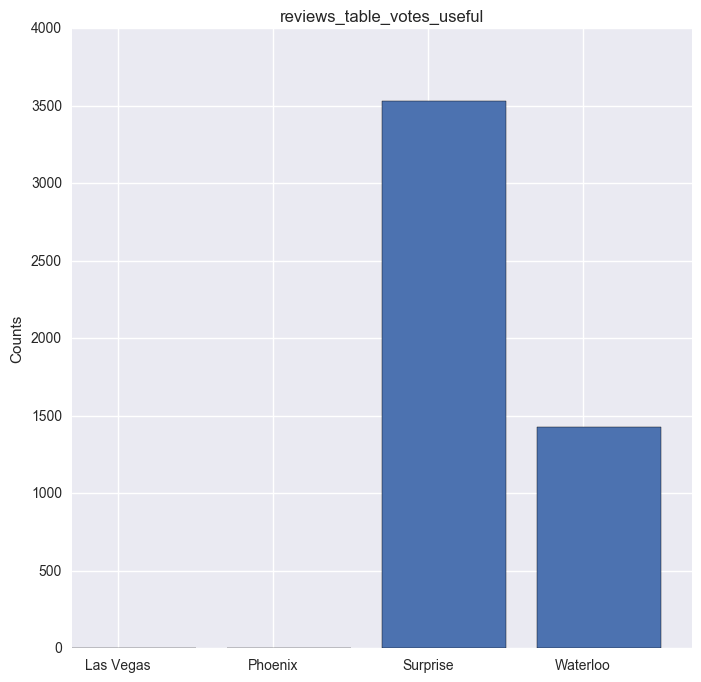

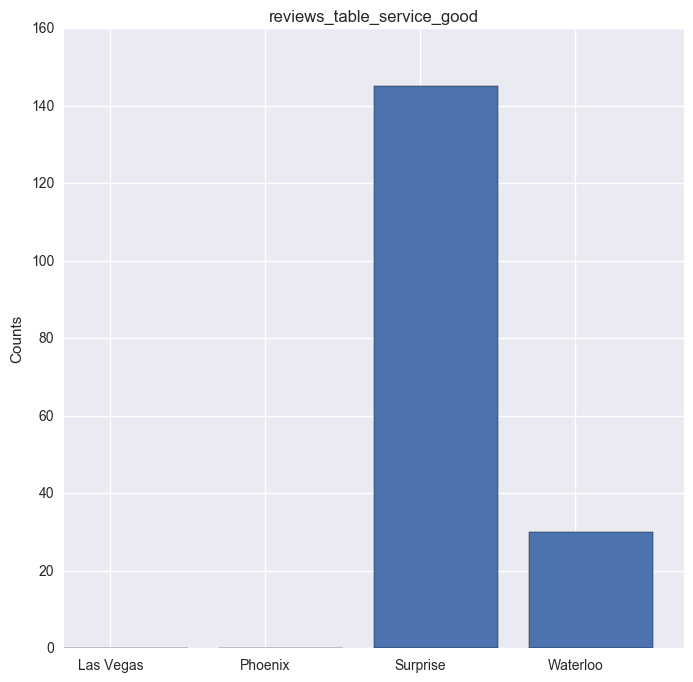

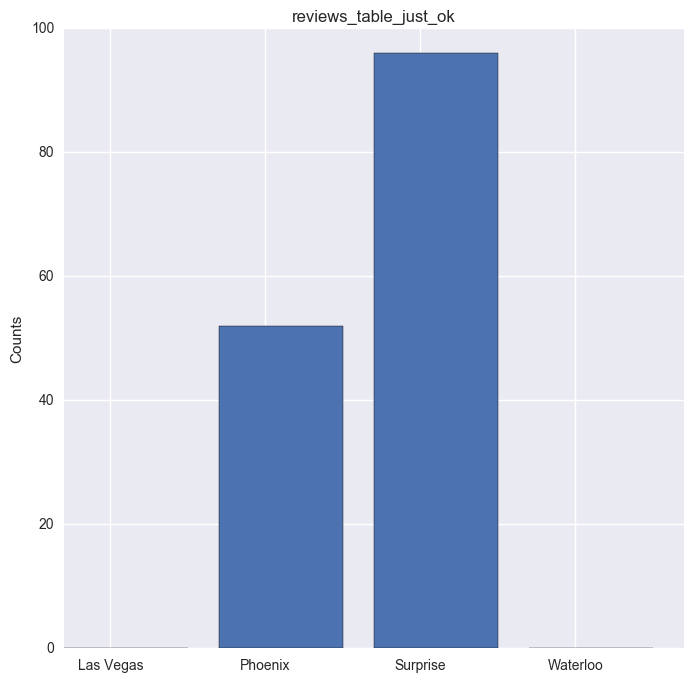

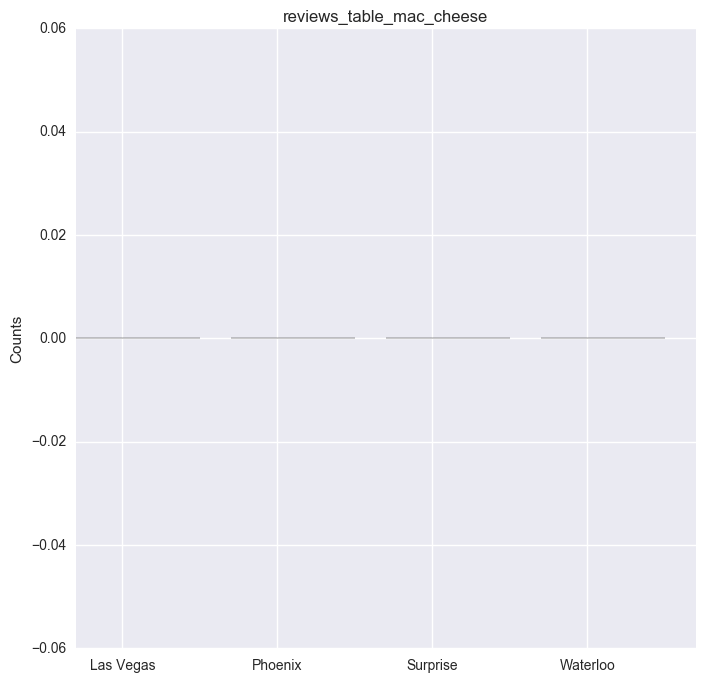

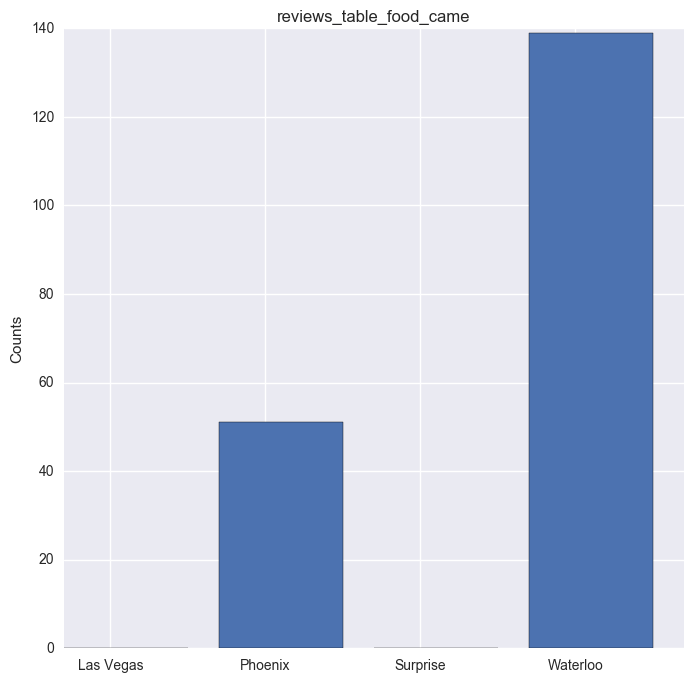

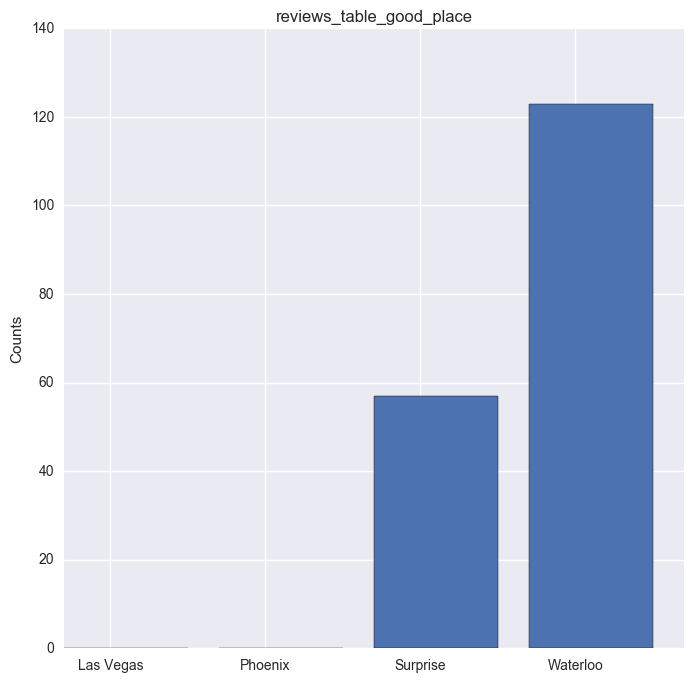

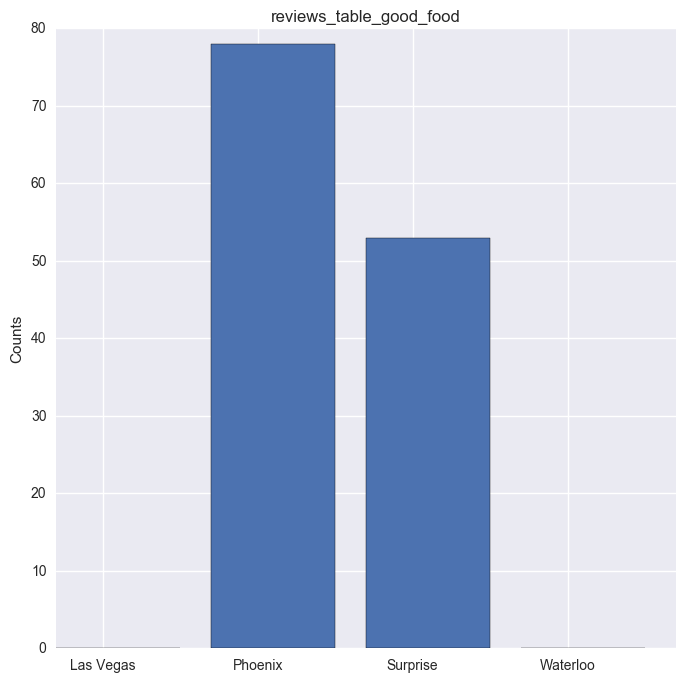

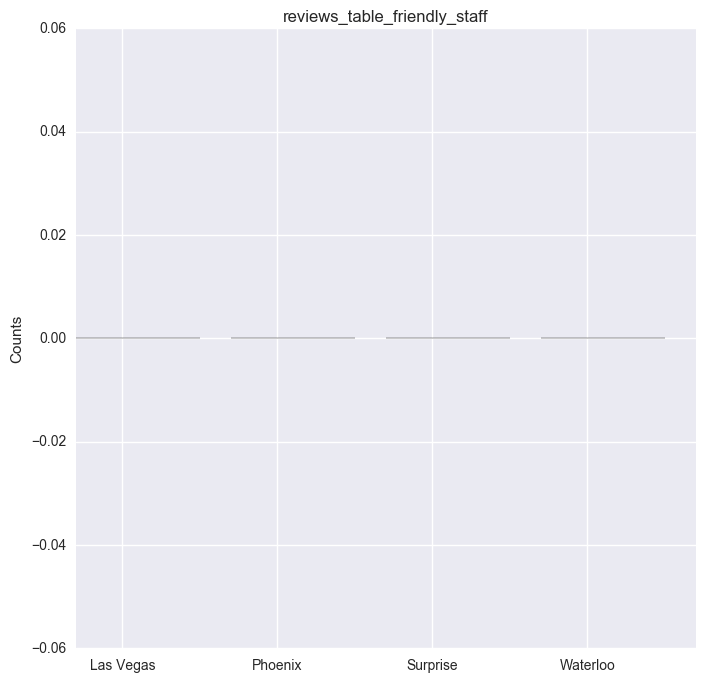

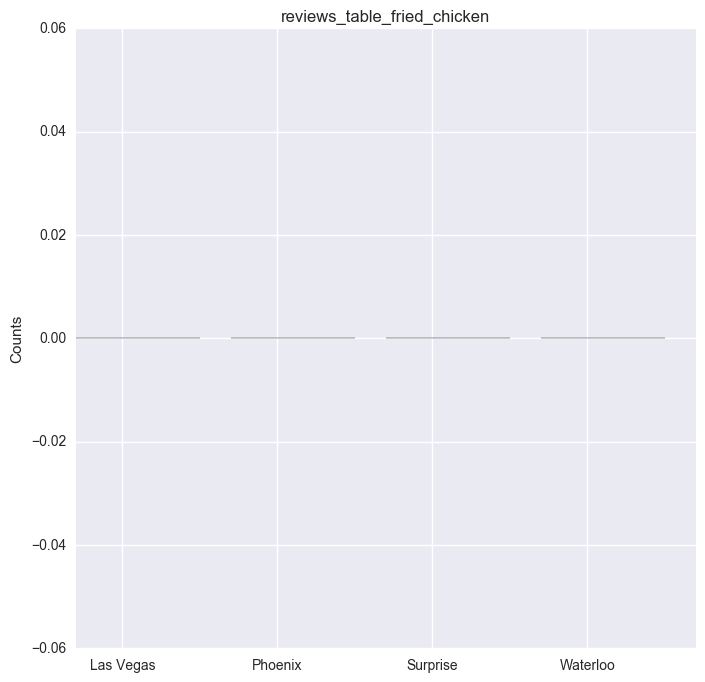

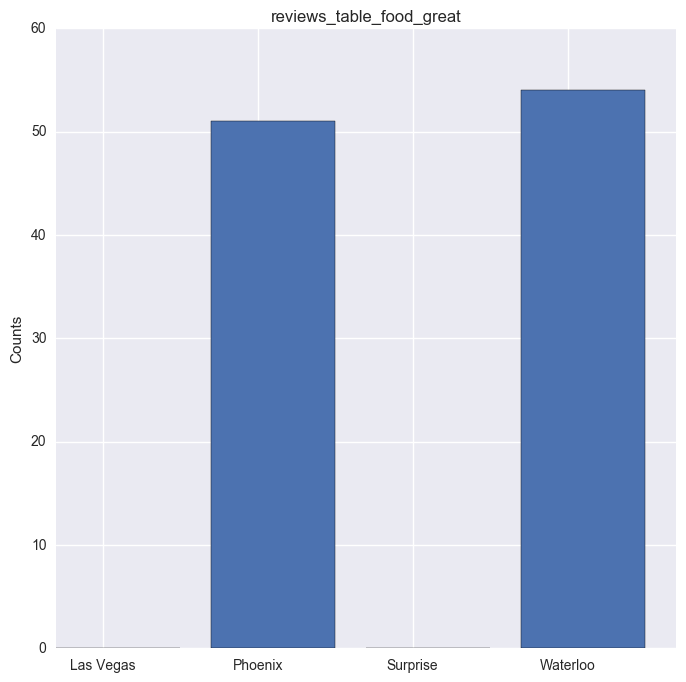

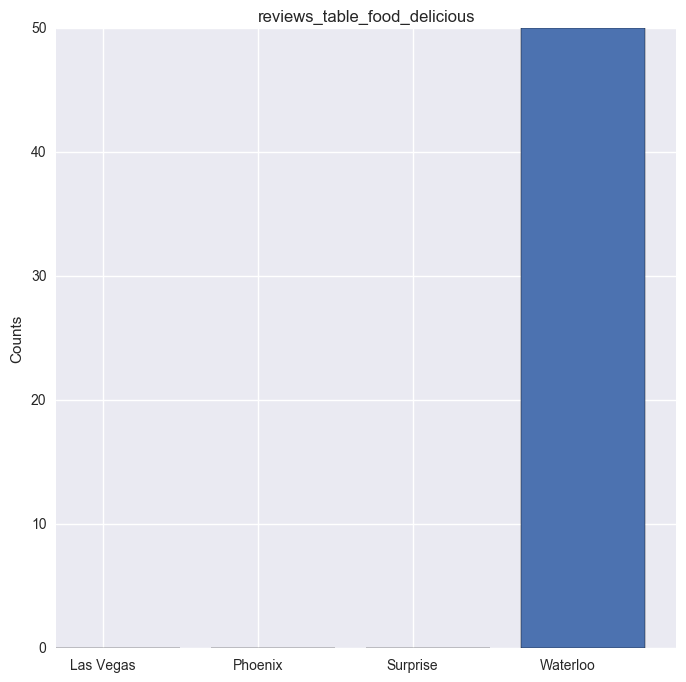

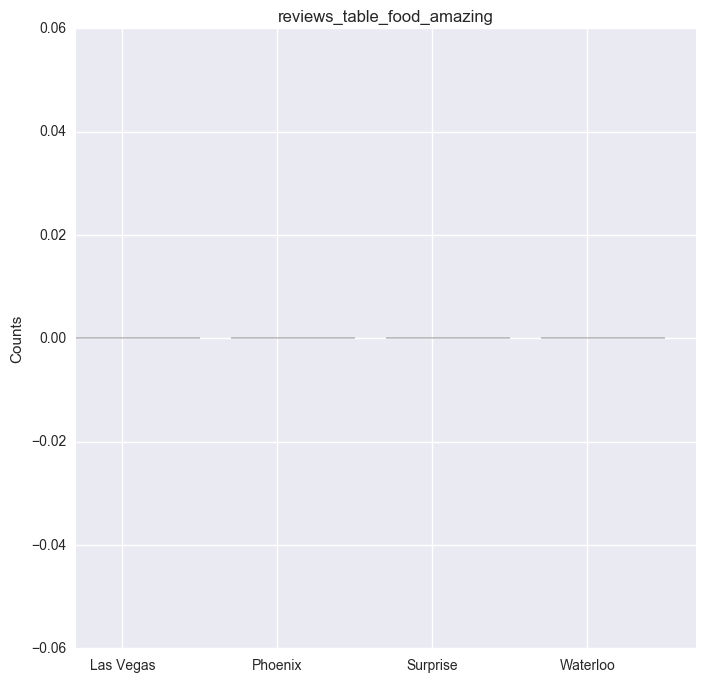

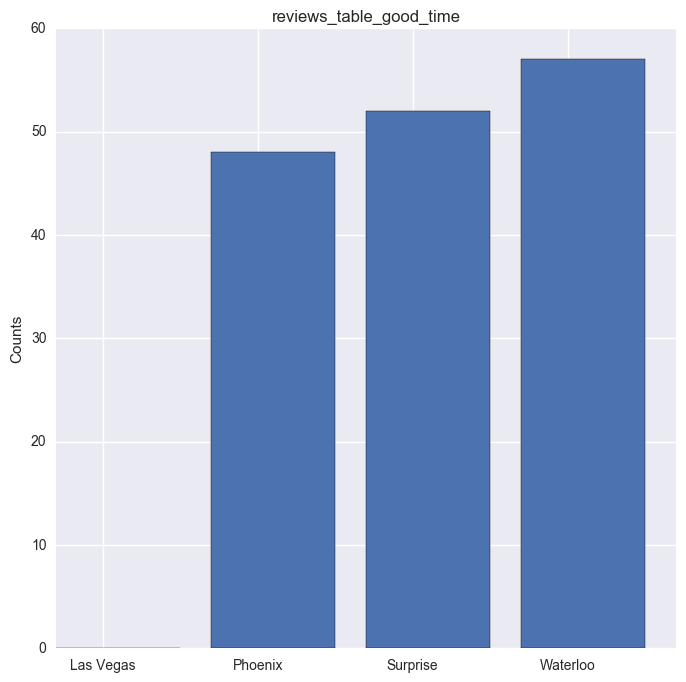

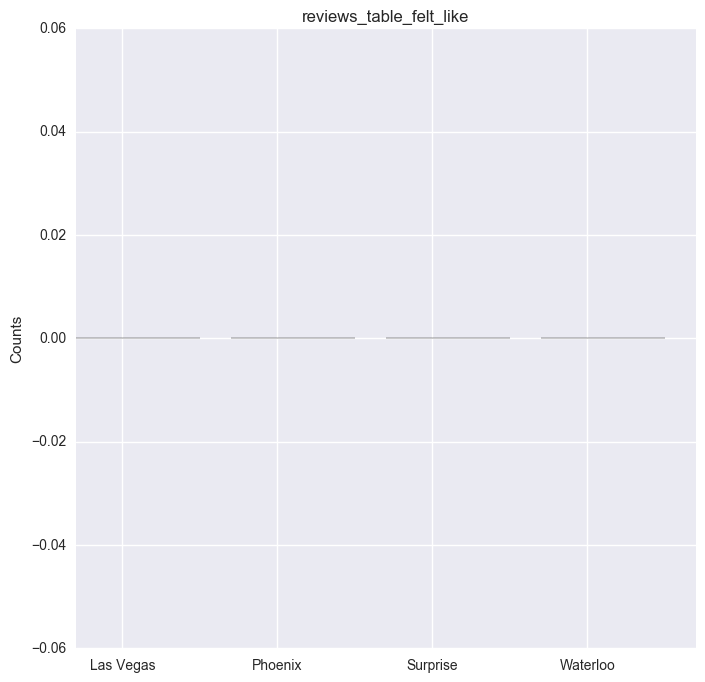

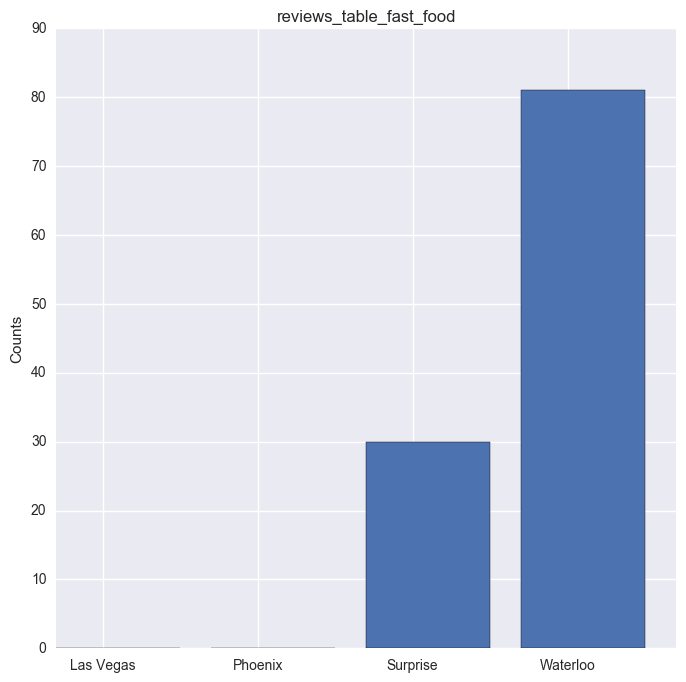

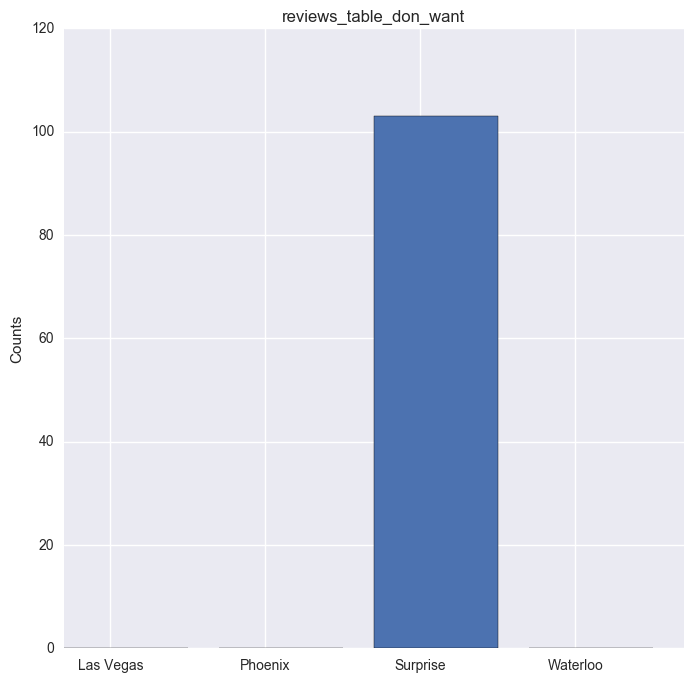

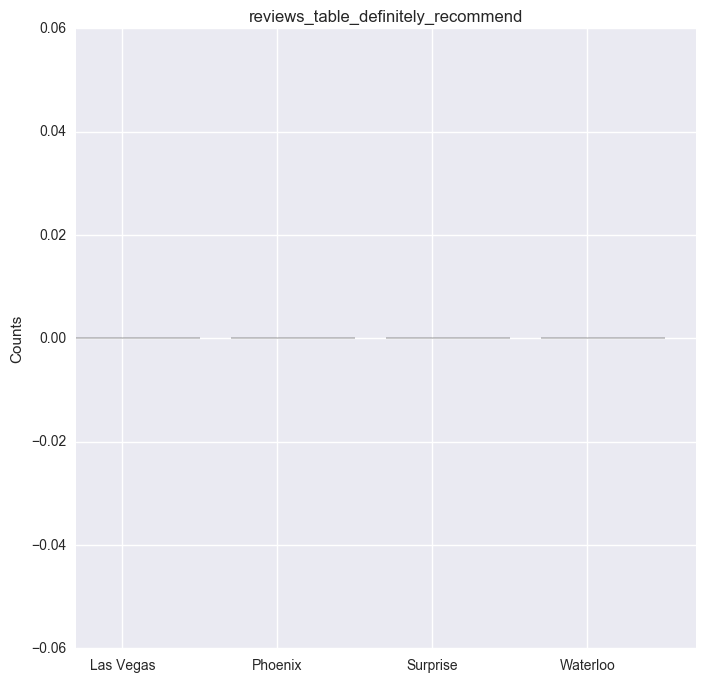

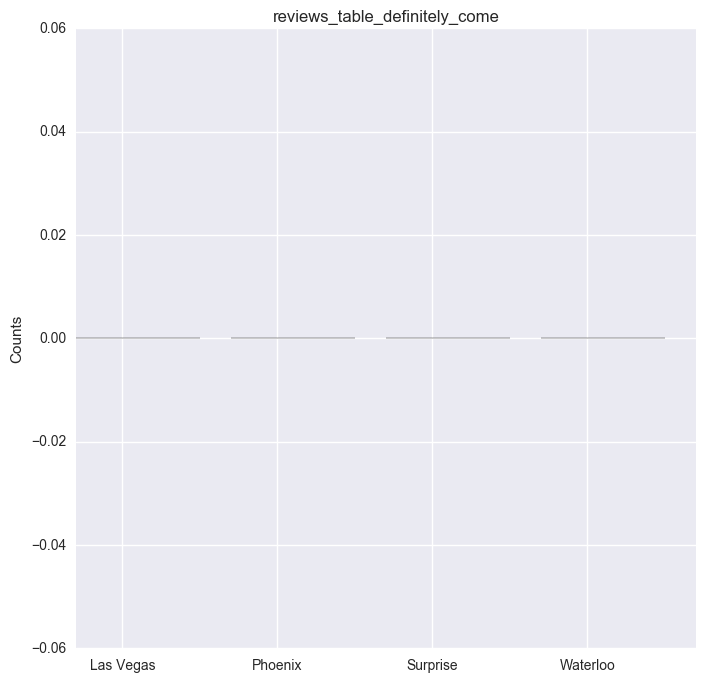

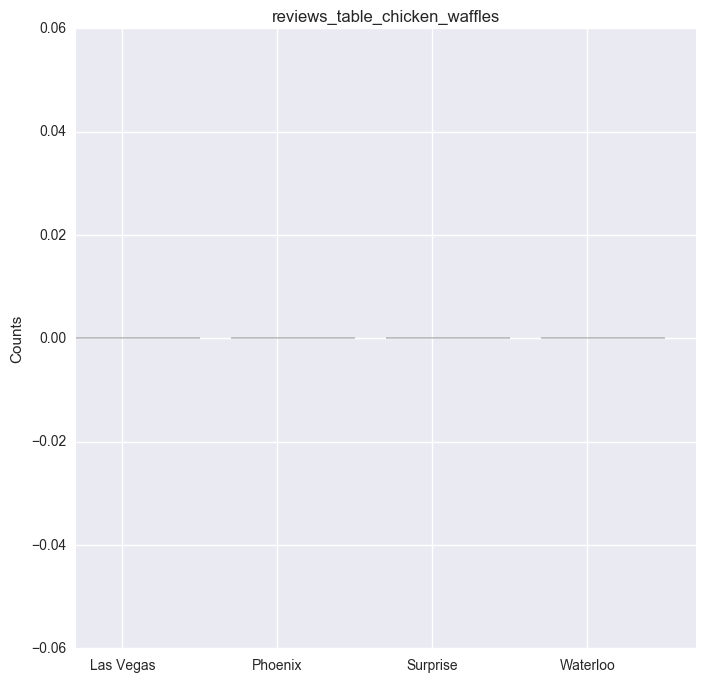

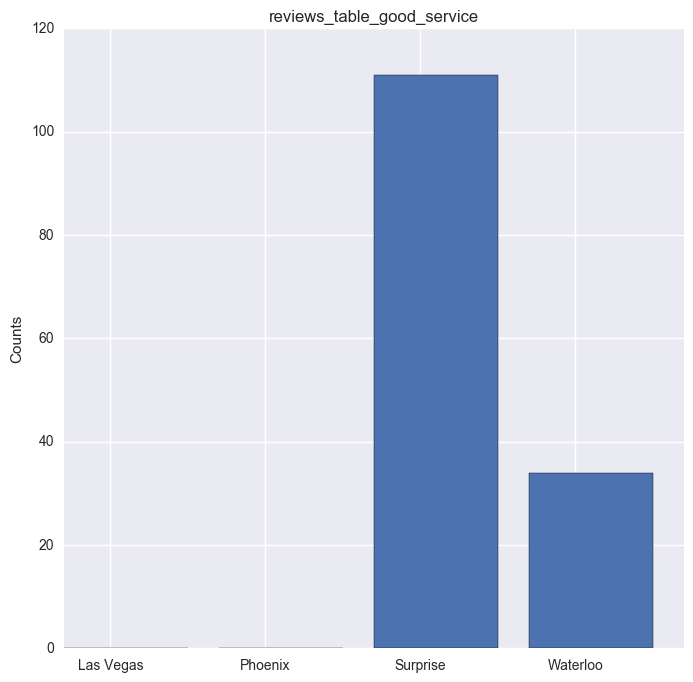

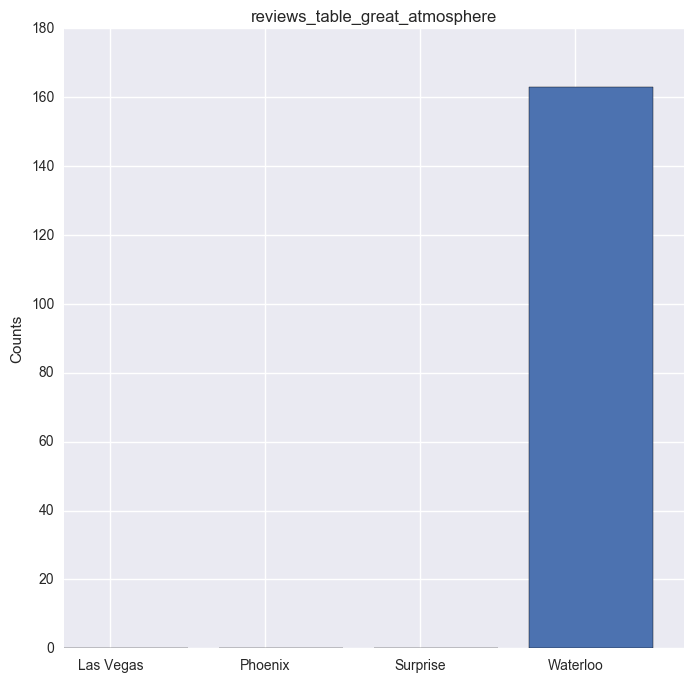

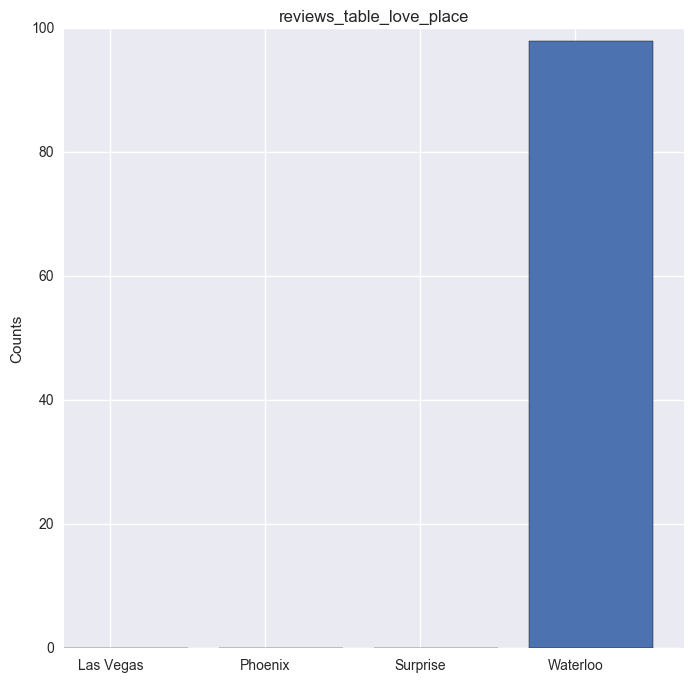

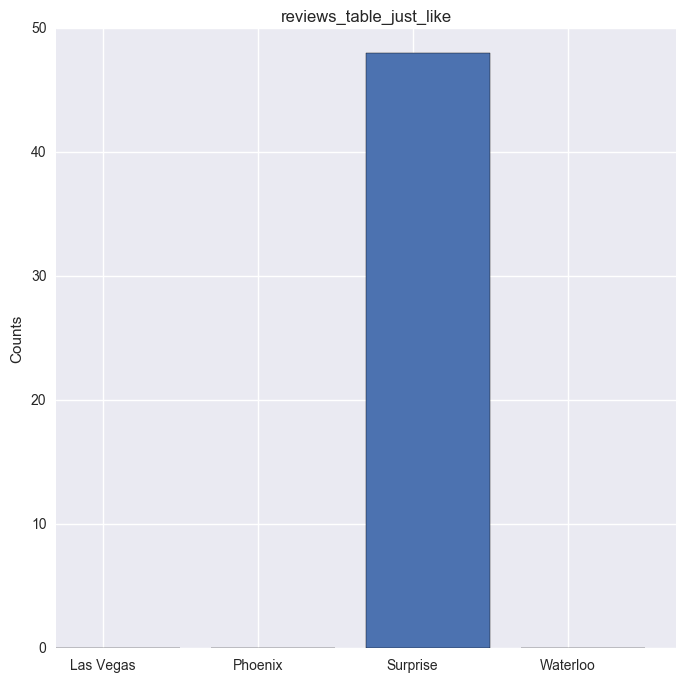

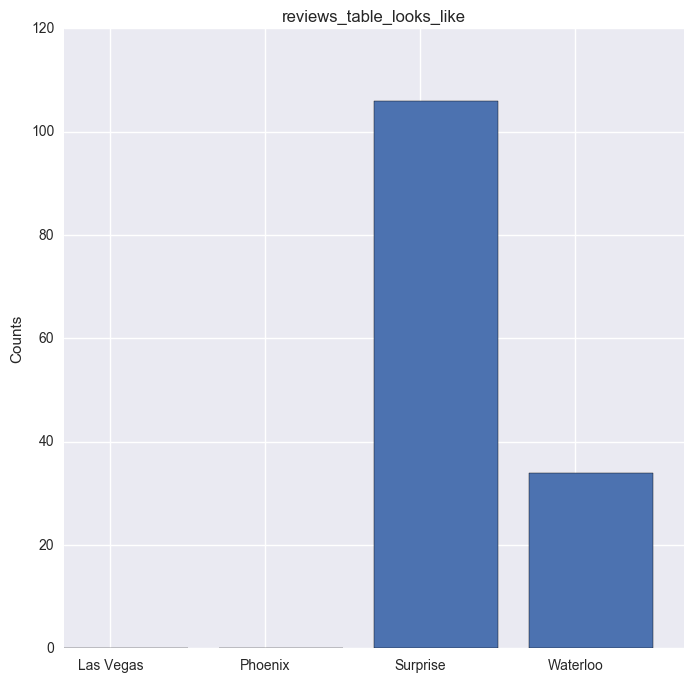

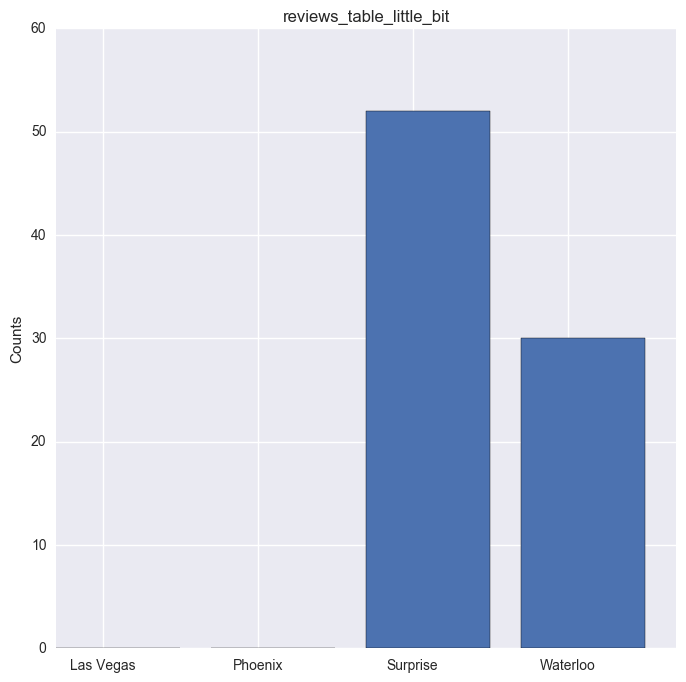

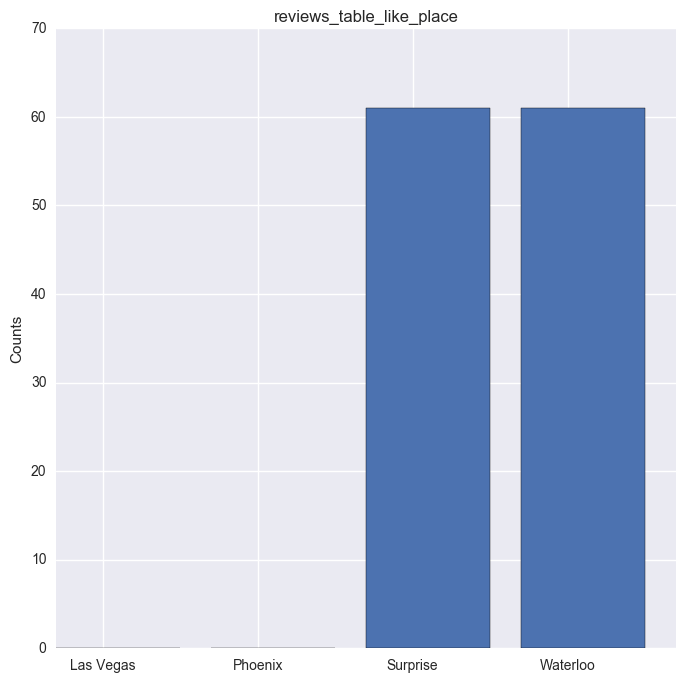

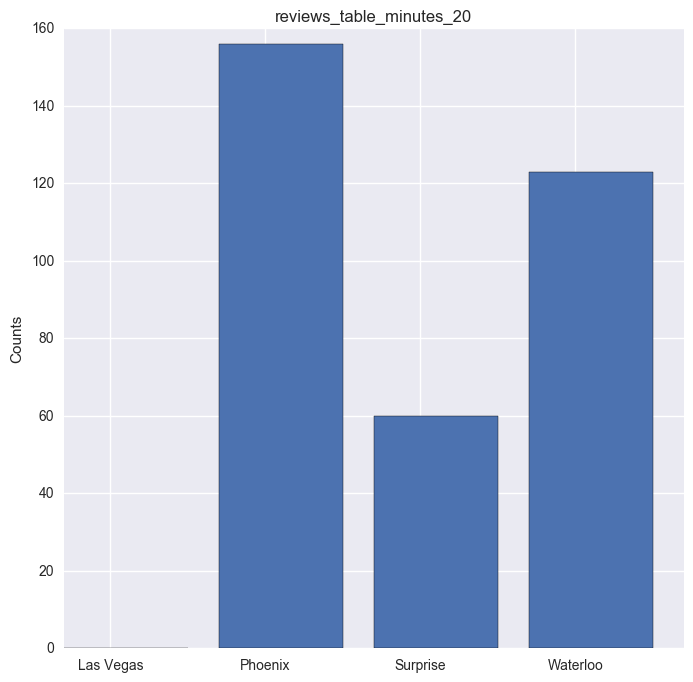

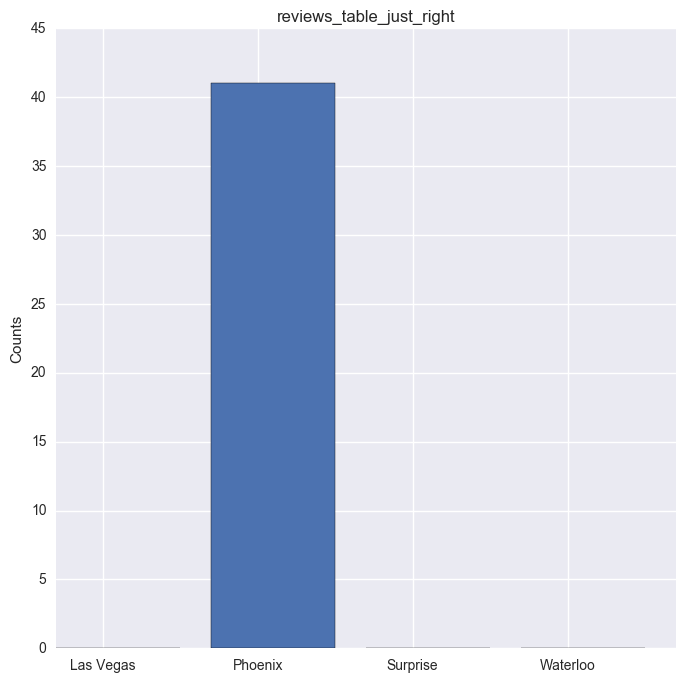

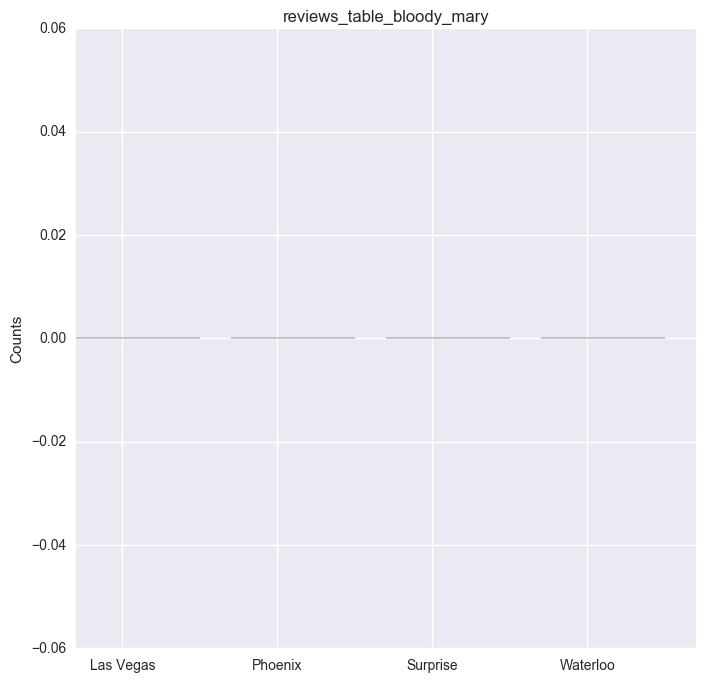

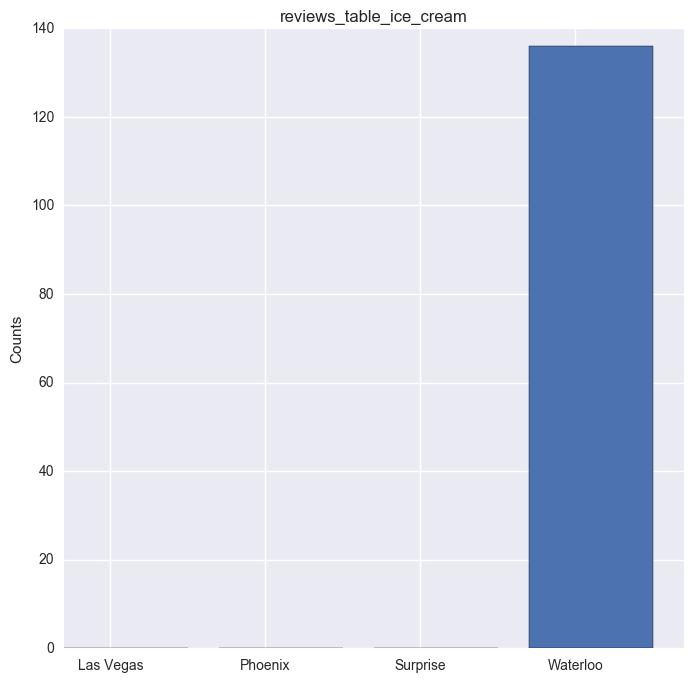

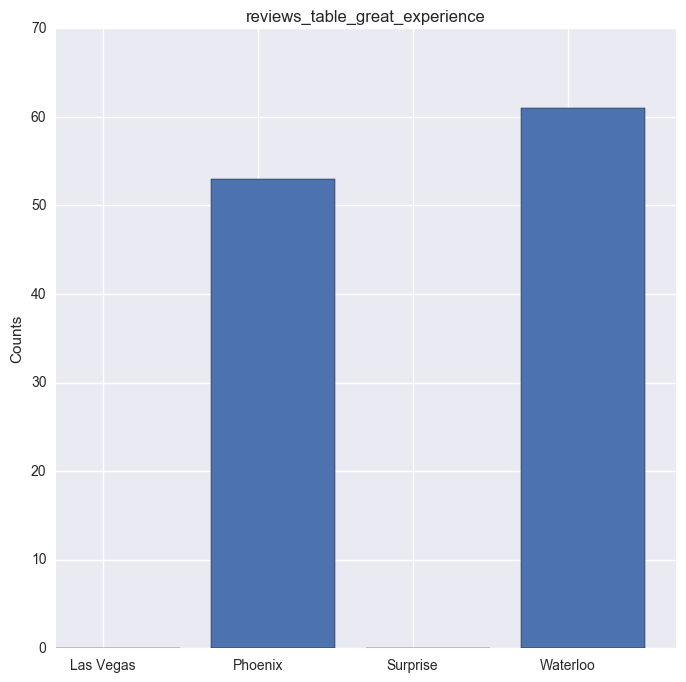

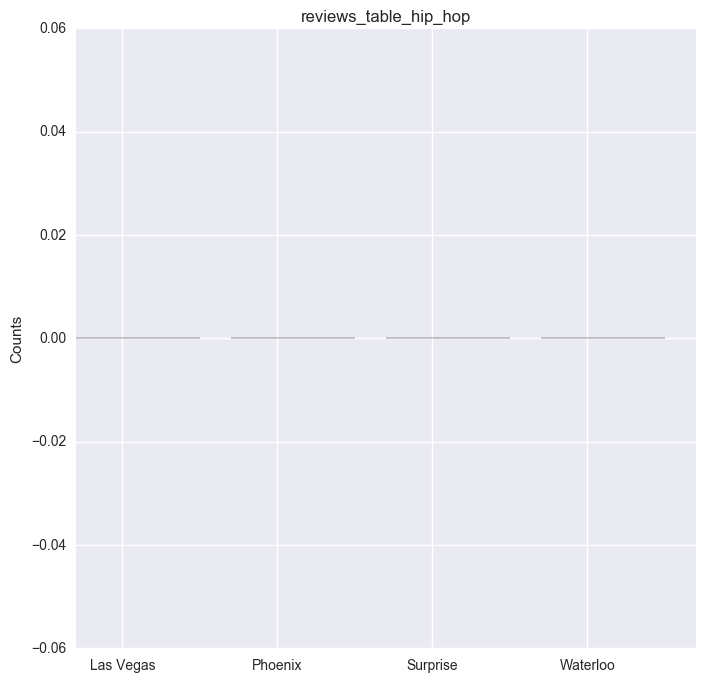

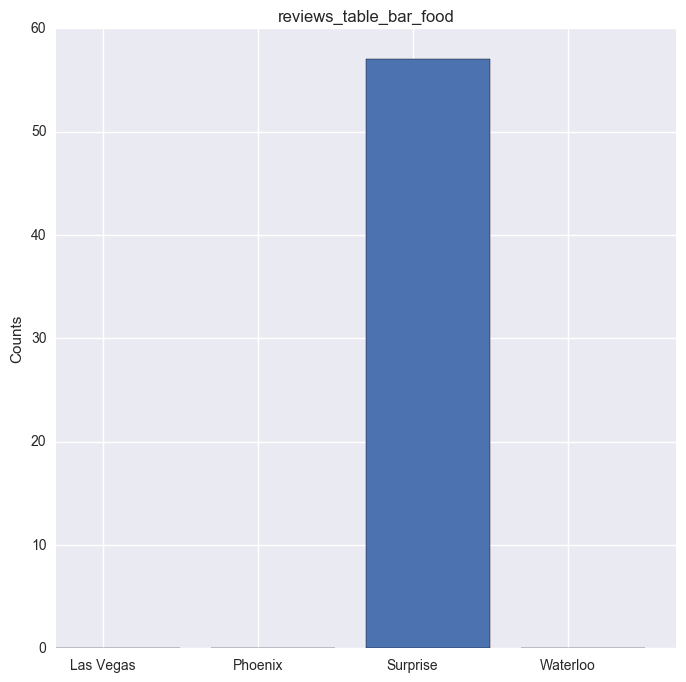

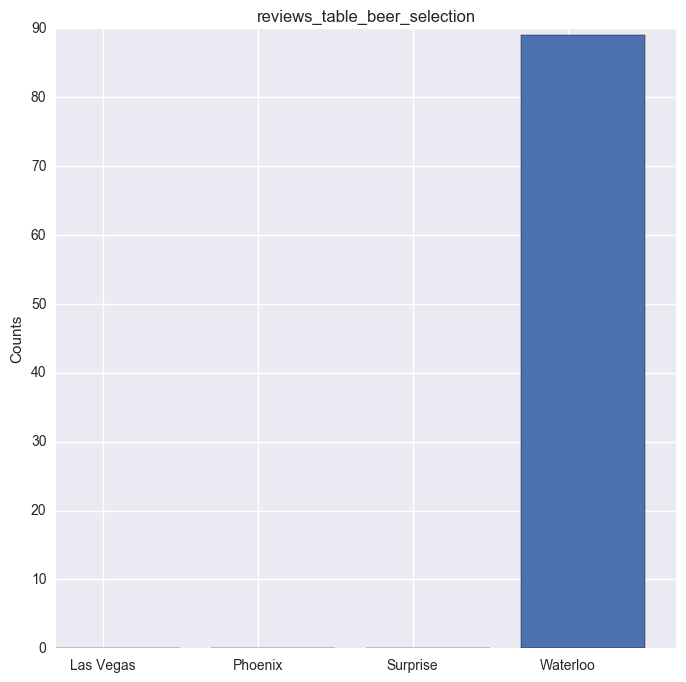

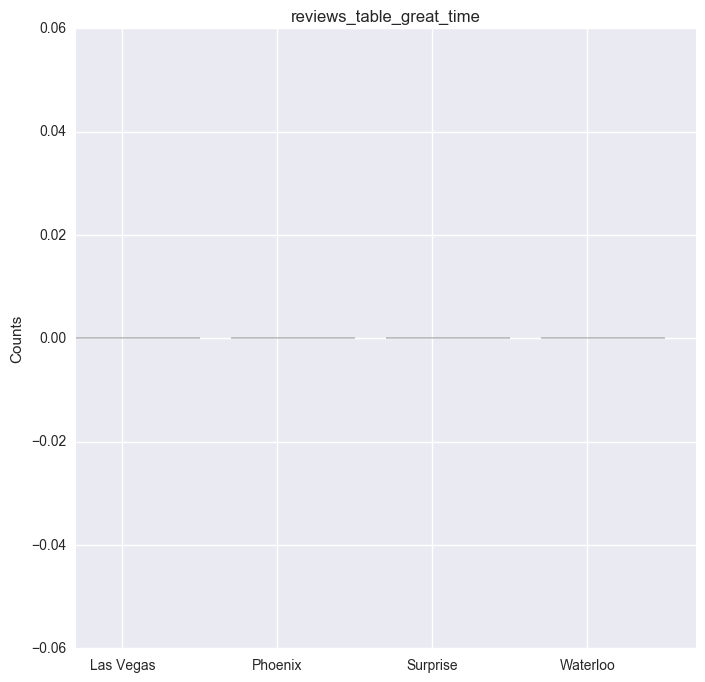

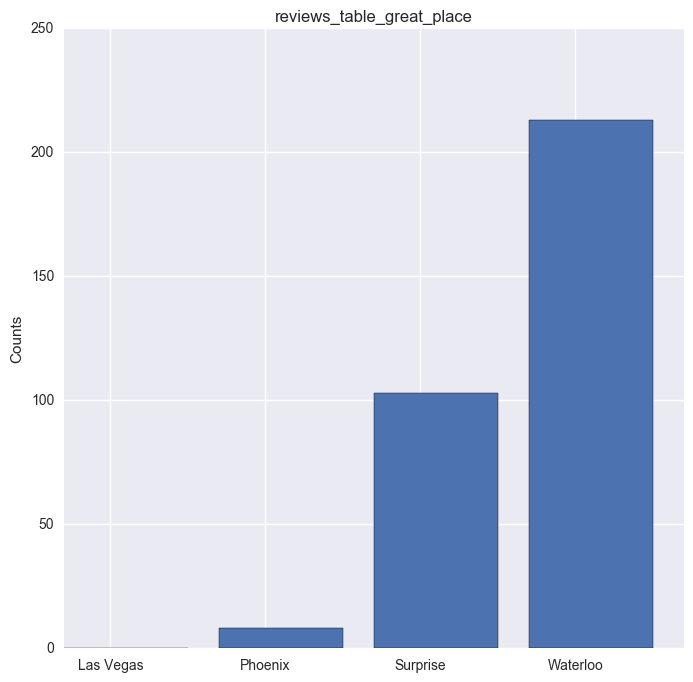

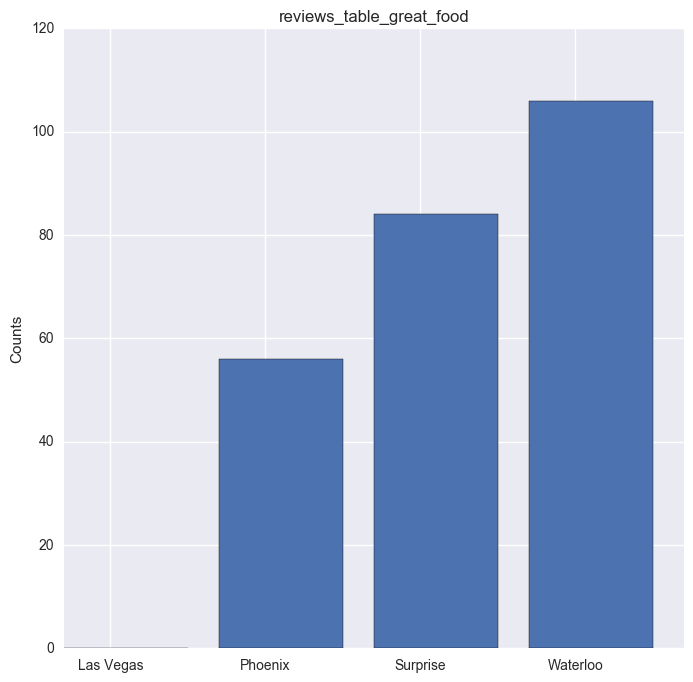

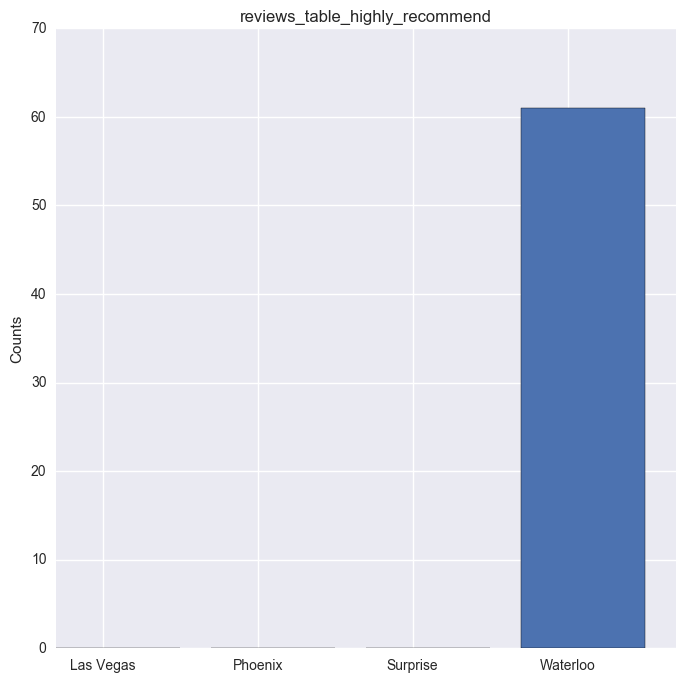

In [316]:
frequncy_df = df_raw.groupby('businesses_table_city').sum().T.sort_values(by='Las Vegas', ascending=False)

frequncy_df = frequncy_df.T
for col in frequncy_df.columns.values:
    fig, ax = plt.subplots(figsize=(8,8)) 
    plt.bar([1,2,3,4],frequncy_df[col])
    plt.title(str(col))
    plt.ylabel('Counts')
    plt.xticks([1.3,2.3,3.3,4.3], ['Las Vegas', 'Phoenix', 'Surprise', 'Waterloo'])
    #ax.set(xticklabels=['Las Vegas', 'Phoenix', 'Surprise', 'Waterloo'])

    plt.show()




In [10]:
print "ints", len(df.select_dtypes(include=['int64']).columns.values)
print "strings", len(df.select_dtypes(include=['object']).columns.values)

ints 101
strings 7


In [191]:
df.select_dtypes(exclude=['int64']).info()
df.reviews_table_user_id.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 599
Data columns (total 10 columns):
reviews_table_user_id          2400 non-null object
reviews_table_review_id        2400 non-null object
reviews_table_business_id      2400 non-null object
reviews_table_date             2400 non-null object
reviews_table_minutes_30       2400 non-null object
businesses_table_name          2400 non-null object
businesses_table_city          2400 non-null object
businesses_table_stars         2400 non-null float64
businesses_table_categories    2400 non-null object
businesses_table_variable      2400 non-null object
dtypes: float64(1), object(9)
memory usage: 206.2+ KB


0    GiqM6KKkPKUaKsI7WmlXKQ
1    GiqM6KKkPKUaKsI7WmlXKQ
2    GiqM6KKkPKUaKsI7WmlXKQ
3    GiqM6KKkPKUaKsI7WmlXKQ
4    GiqM6KKkPKUaKsI7WmlXKQ
Name: reviews_table_user_id, dtype: object

In [119]:
df.select_dtypes(include=['object']).columns.values

array(['reviews_table_user_id', 'reviews_table_business_id',
       'reviews_table_date', 'reviews_table_minutes_30',
       'businesses_table_name', 'businesses_table_city',
       'businesses_table_categories', 'businesses_table_variable'], dtype=object)

In [120]:
#df.stars = df.stars.apply(lambda x: int(x))

In [11]:
df['is_vages'] = df.businesses_table_city.apply(lambda x: 1 if x=='Las Vegas' else 0)
df.drop('businesses_table_city', axis=1,inplace=True)
# abs(corrs).sort_values(ascending=False).head(10)

In [12]:
df.is_vages.value_counts()

0    60000
1    20000
Name: is_vages, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import sklearn.grid_search
import numpy as np

In [16]:
#normalise the contoues varables

#extract y; for knn fit y must remain as 'binary', 'multiclass', 'multiclass-multioutput', 
#multilabel-indicator', 'multilabel-sequences'
try:
    y = df.pop('is_vages')
except:
    pass

#get just the names of int and float columns  
continues_names = df.select_dtypes(include=['int64','float64']).columns.values


#get just the int and float columns  
continues = df.select_dtypes(include=['int64','float64'])


###Scale the ints and floats
norms = StandardScaler().fit_transform(continues)

#return norms to a DF
df_normed=pd.DataFrame(norms, columns=continues_names)
#df_normed.drop('businesses_table_latitude', axis=1,inplace=True)
#df_normed.drop('businesses_table_longitude', axis=1,inplace=True)



#to return the objects back to main df for X
# objs = df.select_dtypes(include=['object'])
# df_normed = df_normed.join(objs)


### remove nolonger needed var from active mem.
del continues_names
del norms, continues,  #objs


In [116]:
# y, X = patsy.dmatrices("gender ~ affiliative + selfenhancing + accuracy + agressive + selfdefeating - 1"
#                      , data=df_normed, return_type='dataframe')

In [24]:
df_normed.drop('reviews_table_votes_useful', axis=1, inplace=True)

In [25]:


X_train, X_test, y_train, y_test = train_test_split(df_normed, y, test_size=0.4)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48000 entries, 51729 to 38138
Columns: 101 entries, reviews_table_votes_cool to Month
dtypes: float64(101)
memory usage: 37.4 MB


In [118]:
# X_train.businesses_table_stars

In [119]:
knn = KNeighborsClassifier(n_neighbors=100, n_jobs=-1, weights='distance')
knn_mod = knn.fit(X_train, y_train.values)
probs = knn.predict(X_test)
print confusion_matrix(probs, y_test)


[[23911     0]
 [   25  8064]]


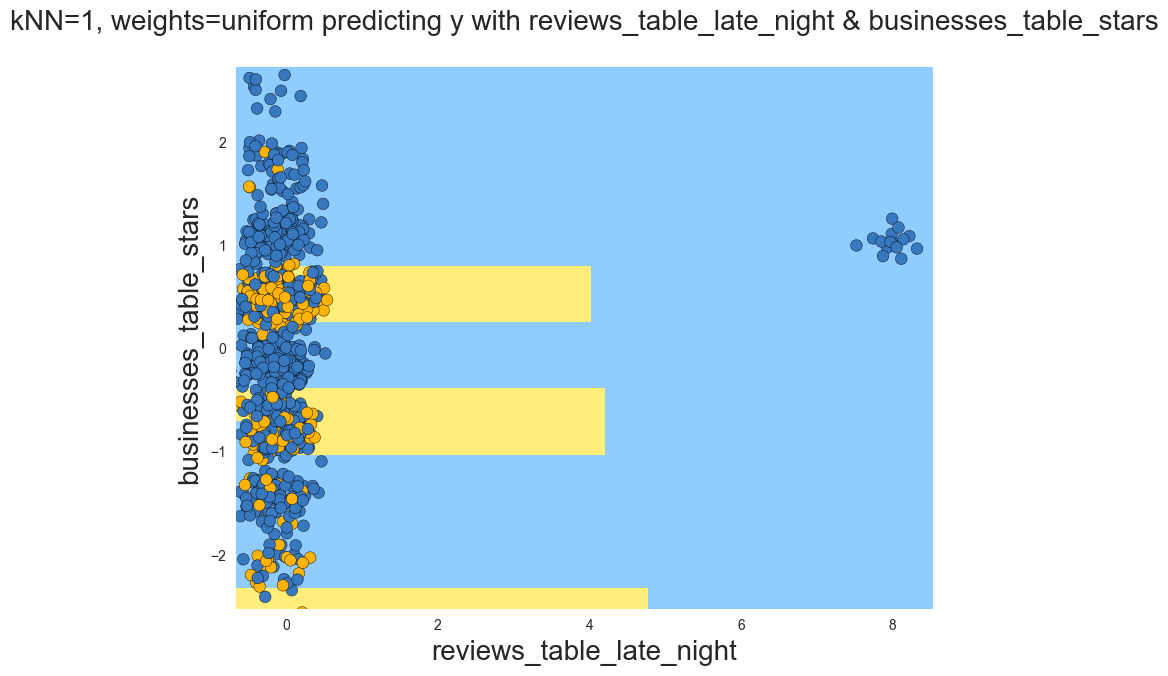

In [212]:
import imp
plotter_path = '/aUsers/Harrison/Desktop/DSI-SF-4/utils/plotting/knn_plotter.py'
plotter = imp.load_source('plotter', plotter_path)
from plotter import KNNBoundaryPlotter

X_test['y'] = y_test.values

kbp = KNNBoundaryPlotter(X_test, 'reviews_table_late_night', 'businesses_table_stars', 'y', nn_range=range(1,101))

kbp.knn_mesh_runner()
kbp.knn_interact()
y = X_test.pop('y')

In [105]:
knn_mod.get_params
#df_normed.columns.values

<bound method KNeighborsClassifier.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
           weights='distance')>

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,reviews_table_votes_cool,reviews_table_votes_funny,reviews_table_votes_useful,reviews_table_minutes_10,reviews_table_minutes_15,reviews_table_minutes_20,reviews_table_bar_food,reviews_table_beer_selection,reviews_table_best_ve,reviews_table_bloody_mary,...,reviews_table_ve_seen,reviews_table_ve_tried,reviews_table_wait_staff,businesses_table_review_count,businesses_table_stars,servies_realted,non_service_realted,non_service_score,servies_score,Month
24631,-0.350518,-0.425317,-0.540966,-0.178994,-0.146917,-0.168136,-0.071155,-0.095343,-0.065812,-0.060194,...,-0.083858,-0.088161,-0.120798,-0.207604,-0.570095,-0.247908,-0.487113,-0.477605,-0.243397,-1.095346
20477,-0.350518,-0.425317,-0.540966,4.711555,-0.146917,-0.168136,-0.071155,-0.095343,-0.065812,-0.060194,...,8.147581,-0.088161,-0.120798,-0.069591,0.981580,4.033752,2.052911,2.444812,4.687574,0.972487
75421,-0.350518,-0.425317,-0.540966,-0.178994,-0.146917,-0.168136,-0.071155,-0.095343,-0.065812,-0.060194,...,-0.083858,11.342823,-0.120798,-0.404502,0.981580,-0.247908,2.052911,2.444812,-0.243397,-1.686156
40303,-0.350518,0.657569,1.044050,-0.178994,-0.146917,-0.168136,-0.071155,-0.095343,-0.065812,-0.060194,...,-0.083858,-0.088161,-0.120798,-0.421063,-0.570095,-0.247908,-0.487113,-0.477605,-0.243397,0.677083
60754,-0.350518,-0.425317,-0.540966,-0.178994,-0.146917,4.663348,-0.071155,-0.095343,-0.065812,-0.060194,...,-0.083858,-0.088161,-0.120798,-0.386100,0.205743,4.033752,-0.487113,-0.477605,4.071203,-1.095346


[[22894  4440]
 [ 1081  3585]]


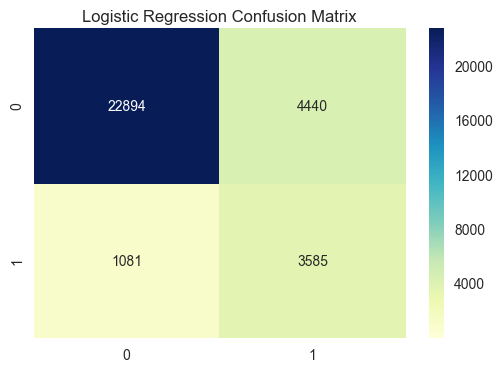

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model = log_reg.fit(X_train, y_train)
preds = model.predict(X_test)

import matplotlib.pyplot as plt
plt.clf()
plt.title('Logistic Regression Confusion Matrix')
#plt.legend(['R^2: '+str(r)])

print confusion_matrix(preds, y_test)
sns.heatmap(confusion_matrix(preds, y_test), vmin=.8, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

In [27]:
print type(model.coef_)
print model.coef_.shape
coefs = pd.DataFrame(model.coef_, columns=df_normed.columns.values)


<type 'numpy.ndarray'>
(1, 101)


In [28]:

coef_abs = abs(coefs).T.sort_values(0)
coef_abs.tail()

,0
reviews_table_bottle_service,1.040212
reviews_table_pretty_good,1.090033
reviews_table_great_place,1.140249
reviews_table_votes_cool,1.275956
businesses_table_review_count,2.067149


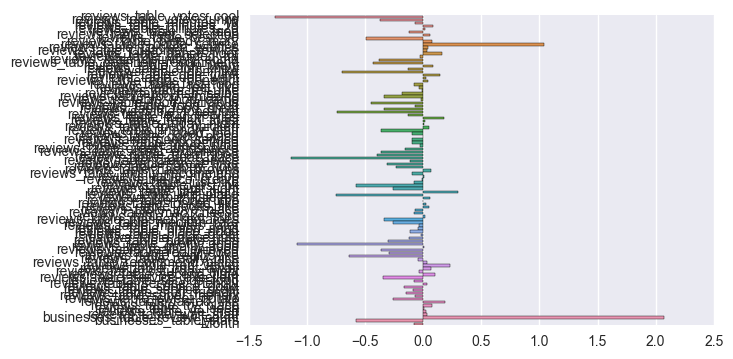

In [29]:
import matplotlib.pyplot as plt
sns.barplot(data=coefs, orient='h')

plt.show()

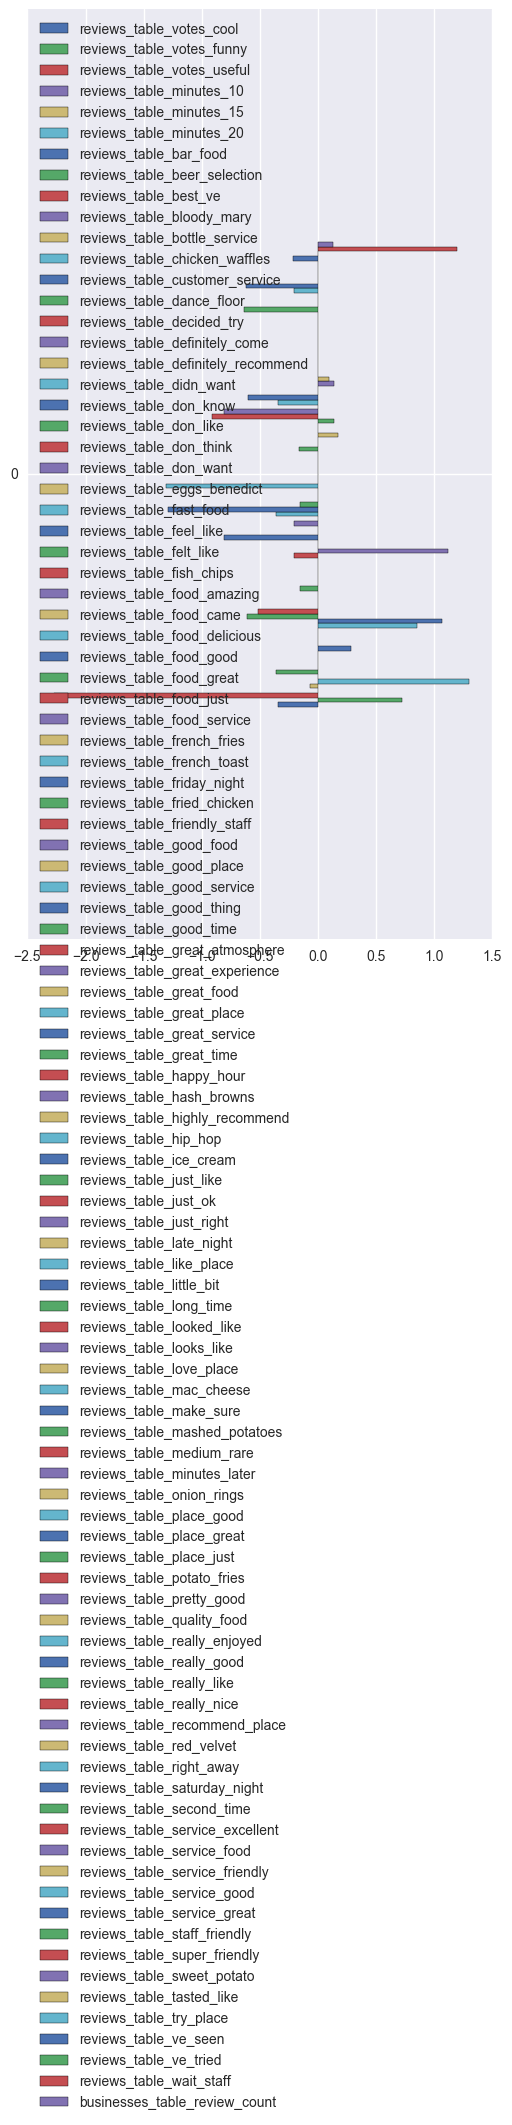

In [135]:
coefs.plot.barh(figsize=(6,12))
plt.show()

In [84]:
# plt.barh(1,width=coefs.values.ravel())
# plt.xticks(arange(len(coefs)), coefs)
# plt.show()

In [65]:
coef_abs = abs(coefs).T.sort_values(0)
# coef_abs.head()
coef_abs = coef_abs.reindex()
coef_abs['coefs']=coef_abs.values
coef_abs.drop(0,axis=1,inplace=True)
#print coef_abs.tail()

cutoff_coefs = 0.2
coef_to_remove = coef_abs[coef_abs['coefs']<cutoff_coefs].reset_index()['index']
coef_to_remove
coef_to_keep = coef_abs[coef_abs['coefs']>cutoff_coefs].reset_index()['index']



In [72]:
coef_to_remove = list(coef_to_remove)
coef_to_remove.extend(['reviews_table_votes_cool', 'reviews_table_votes_funny',
                       'reviews_table_votes_cool', 'reviews_table_votes_funny',
                       'businesses_table_review_count'])
print [name for name in coefs.columns if str(name) not in list(coef_to_remove)]



['reviews_table_best_ve', 'reviews_table_bottle_service', 'reviews_table_definitely_come', 'reviews_table_definitely_recommend', 'reviews_table_don_like', 'reviews_table_food_amazing', 'reviews_table_food_delicious', 'reviews_table_food_great', 'reviews_table_food_just', 'reviews_table_friendly_staff', 'reviews_table_great_experience', 'reviews_table_great_food', 'reviews_table_great_place', 'reviews_table_great_time', 'reviews_table_happy_hour', 'reviews_table_just_ok', 'reviews_table_just_right', 'reviews_table_late_night', 'reviews_table_like_place', 'reviews_table_mashed_potatoes', 'reviews_table_medium_rare', 'reviews_table_potato_fries', 'reviews_table_pretty_good', 'reviews_table_really_enjoyed', 'reviews_table_really_good', 'reviews_table_really_like', 'reviews_table_red_velvet', 'reviews_table_service_excellent', 'reviews_table_sweet_potato', 'businesses_table_stars']


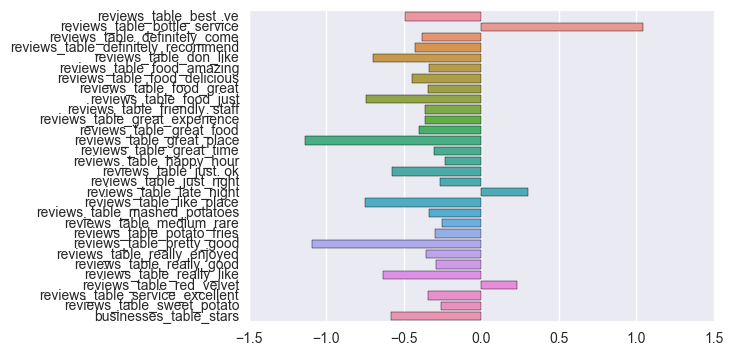

In [73]:
import matplotlib.pyplot as plt

less_coesf = coefs[[name for name in coefs.columns.values if name not in list(coef_to_remove)]]
sns.barplot(data=less_coesf, orient='h')
plt.show()



In [38]:
coefs.head()

,reviews_table_votes_cool,reviews_table_votes_funny,reviews_table_minutes_10,reviews_table_minutes_15,reviews_table_minutes_20,reviews_table_bar_food,reviews_table_beer_selection,reviews_table_best_ve,reviews_table_bloody_mary,reviews_table_bottle_service,...,reviews_table_super_friendly,reviews_table_sweet_potato,reviews_table_tasted_like,reviews_table_try_place,reviews_table_ve_seen,reviews_table_ve_tried,reviews_table_wait_staff,businesses_table_review_count,businesses_table_stars,Month
0,-1.275956,-0.375611,-0.073719,0.082863,0.014694,-0.119733,0.054289,-0.493354,0.075035,1.040212,...,-0.072428,-0.258179,0.189002,0.075671,0.003217,0.020034,0.032896,2.067149,-0.582019,-0.076905


In [74]:
new_df = df_normed.copy()

cols_to_drop = coef_to_remove
for col in cols_to_drop:
    new_df.drop(col, axis=1, inplace=True)
    
new_df.shape, df_normed.shape
# #new_df['y'] = y


# sns.pairplot(new_df.corr()['y'].sort_values(by='y', ascending=False).head())
# plt.show()

ValueError: labels ['reviews_table_votes_cool' 'reviews_table_votes_funny'
 'reviews_table_votes_cool' 'reviews_table_votes_funny'] not contained in axis

In [220]:
coef_abs.tail().index


Index([u'reviews_table_don_know', u'reviews_table_wait_staff',
       u'reviews_table_great_place', u'reviews_table_minutes_20',
       u'reviews_table_votes_useful'],
      dtype='object')

In [37]:
# print top_coefs.info()

# print top_coefs.reviews_table_wait_staff.value_counts()
# print top_coefs.reviews_table_good_thing.value_counts()      
# print top_coefs.reviews_table_minutes_20.value_counts()      
# print top_coefs.reviews_table_great_place.value_counts()     
# print top_coefs.reviews_table_votes_useful.value_counts()

In [21]:
frequncy_df.T.columns.values

array(['businesses_table_review_count', 'businesses_table_latitude',
       'businesses_table_stars', 'businesses_table_value',
       'reviews_table_votes_funny', 'reviews_table_customer_service',
       'reviews_table_tasted_like', 'reviews_table_minutes_15',
       'reviews_table_minutes_20', 'reviews_table_las_vegas',
       'reviews_table_votes_cool', 'reviews_table_looked_like',
       'reviews_table_minutes_10', 'reviews_table_minutes_later',
       'reviews_table_don_know', 'reviews_table_didn_want',
       'reviews_table_food_service', 'reviews_table_second_time',
       'reviews_table_food_good', 'reviews_table_fast_food',
       'reviews_table_french_fries', 'reviews_table_onion_rings',
       'reviews_table_don_think', 'reviews_table_long_time',
       'reviews_table_try_place', 'reviews_table_make_sure',
       'reviews_table_bottle_service', 'reviews_table_right_away',
       'reviews_table_ice_cream', 'reviews_table_late_night',
       'reviews_table_new_york', 'reviews_

In [30]:
dont_keep = ['businesses_table_review_count', 'businesses_table_latitude',
       'businesses_table_stars', 'businesses_table_value',
       'reviews_table_votes_funny', 'reviews_table_customer_service', 'reviews_table_minutes_15',
    'reviews_table_las_vegas',
       'reviews_table_votes_cool']


frequncy_df = df_raw.groupby('businesses_table_city').sum().T.sort_values(by='Las Vegas', ascending=False)

for col in dont_keep:
    frequncy_df.drop(col, axis=0, inplace=True)

frequncy_df["Total"] = frequncy_df.Phoenix + frequncy_df.Surprise + frequncy_df.Waterloo + frequncy_df['Las Vegas']
frequncy_df["Precent Vagas"] = frequncy_df['Las Vegas'] / frequncy_df.Total
frequncy_df.sort_values(by=['Total'], ascending=False)
frequncy_df.head(15)

businesses_table_city,Las Vegas,Phoenix,Surprise,Waterloo,Total,Precent Vagas
reviews_table_tasted_like,878.0,340.0,382.0,330.0,1930.0,0.454922
reviews_table_minutes_20,819.0,1003.0,397.0,161.0,2380.0,0.344118
reviews_table_looked_like,621.0,533.0,496.0,141.0,1791.0,0.346734
reviews_table_minutes_10,493.0,823.0,227.0,236.0,1779.0,0.277122
reviews_table_minutes_later,468.0,566.0,669.0,52.0,1755.0,0.266667
reviews_table_don_know,435.0,608.0,357.0,367.0,1767.0,0.246180
reviews_table_didn_want,430.0,260.0,182.0,51.0,923.0,0.465872
reviews_table_food_service,413.0,398.0,390.0,197.0,1398.0,0.295422
reviews_table_second_time,404.0,336.0,211.0,65.0,1016.0,0.397638
reviews_table_food_good,403.0,495.0,998.0,1049.0,2945.0,0.136842


In [245]:
frequncy_df = df_raw.groupby('businesses_table_city').sum().T.sort_values(by='Las Vegas', ascending=False)
frequncy_df["Total"] = frequncy_df.Phoenix + frequncy_df.Surprise + frequncy_df.Waterloo + frequncy_df['Las Vegas']
frequncy_df.sort_values(by=['Total','Las Vegas'], ascending=False)
frequncy_df.head(15)

businesses_table_city,Las Vegas,Phoenix,Surprise,Waterloo,Total
businesses_table_review_count,197251.0,166355.0,30038.0,14556.0,408200.0
businesses_table_stars,1761.5,1860.5,1680.0,2170.5,7472.5
reviews_table_votes_funny,120.0,227.0,52.0,50.0,449.0
reviews_table_minutes_20,106.0,0.0,0.0,0.0,106.0
reviews_table_wait_staff,58.0,0.0,0.0,61.0,119.0
reviews_table_don_know,58.0,0.0,0.0,0.0,58.0
reviews_table_food_service,50.0,0.0,0.0,0.0,50.0
reviews_table_ve_seen,50.0,0.0,0.0,61.0,111.0
reviews_table_customer_service,38.0,0.0,132.0,47.0,217.0
reviews_table_didn_want,36.0,0.0,0.0,0.0,36.0


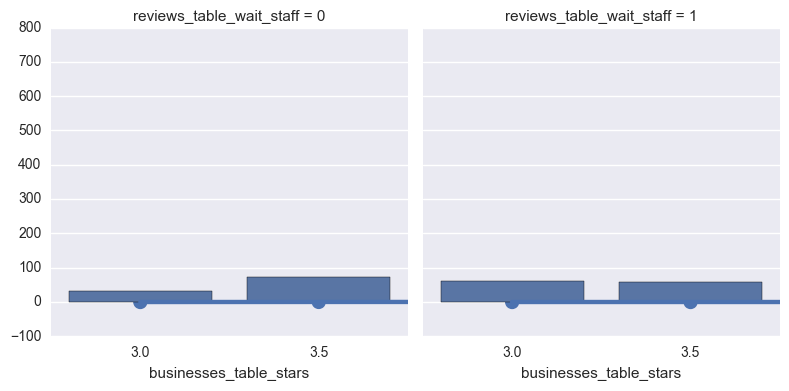

In [226]:
g = sns.factorplot(data=df_raw, col='reviews_table_wait_staff')
g.map(sns.countplot, 'businesses_table_stars')

# sns.countplot(x="businesses_table_stars", data=df_raw)
plt.show()

In [1]:
import pandas as pd
project_id = "big-query-harrison"

sql_bis = """
SELECT city, categories, variable 
FROM [bigquery-dsi-dave:yelp_arizona.businesses] AS businesses_table
"""

bis = pd.read_gbq(sql_bis, project_id=project_id)




Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/v2/auth?scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&response_type=code&client_id=495642085510-k0tmvj2m941jhre2nbqka17vqpjfddtd.apps.googleusercontent.com&access_type=offline

If your browser is on a different machine then exit and re-run this
application with the command-line parameter

  --noauth_local_webserver

Authentication successful.
Requesting query... ok.
Query running...
Query done.
Processed: 12.8 Mb

Retrieving results...
  Got page: 1; 65.0% done. Elapsed 9.25 s.
  Got page: 2; 100.0% done. Elapsed 13.04 s.
Got 152832 rows.

Total time taken 14.32 s.
Finished at 2016-12-20 08:19:15.


In [2]:

cat_names = []
for row in bis.categories.unique():
    for x in row.split(','):
        x = str(x).replace("]", "").replace("[", "").replace("'", "").replace(" ", "").replace("/", "")
        cat_names.append(x)
        
print len(set(cat_names))

del cat_names



var_names = []
for row in bis.variable.unique():
    for x in row.split(','):
        x = str(x).replace("]", "").replace("[", "").replace("'", "").replace(" ", "").replace("/", "")
        var_names.append(x)
        
print len(set(var_names))

del var_names

214
78


In [203]:
bis.variable.unique()[:5]

array([u'attributes.Takes Reservations', u'attributes.Good For.dessert',
       u'attributes.Take-out', u'attributes.Has TV',
       u'attributes.Good For.breakfast'], dtype=object)

In [183]:
import numpy as np


df_cats = bis.categories.map(lambda x: ''.join([y for y in x if not y in "[]'\""]))
new_df_cats = df_cats.str.get_dummies(', ')
#print new_df_cats.columns.values
print new_df_cats.shape

def split_vars(row):
    x = row.split('.')
    return str(x[1:]).replace(",","")

    

df_vars = bis.variable.map(split_vars)
new_df_vars = df_vars.str.get_dummies(', ')
#print new_df_vars.columns.values
print new_df_vars.shape

print len(df_vars.values)

names=np.hstack((new_df_cats.columns.values,new_df_vars.columns.values))
print len(names)




print type(names)
print new_df_cats.shape, new_df_vars.shape
df_expaned = pd.DataFrame(np.hstack((new_df_cats, new_df_vars)),\
             columns=names)


df_expaned.shape


(152832, 214)
(152832, 78)
152832
292
<type 'numpy.ndarray'>
(152832, 214) (152832, 78)


(152832, 292)

In [260]:

# len(set(np.hstack((new_df_cats.columns.values, new_df_vars.columns.values))))
# print zip(new_df_cats.columns.values, new_df_vars.columns.values)[:6]

In [3]:
df_expaned['citys'] = bis.city

def code_citys(row):

    if str(row)=='Las Vegas':
        return 1
    elif row=='Phoenix':
        return 0
    elif row=='Waterloo':
        return 0
    elif row=='Surprise':
        return 0
    else:
        print '\n\n\t\t\ALLLLLRRRTTTATATATA\n\n\n' 
df_expaned['citys'] = df_expaned.citys.apply(code_citys)


df.city.apply(lambda x: 1 if X == "Los Vages" else 0)

df_expaned.head()
len(set(df_expaned.columns))



NameError: name 'df_expaned' is not defined

In [186]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

292
292


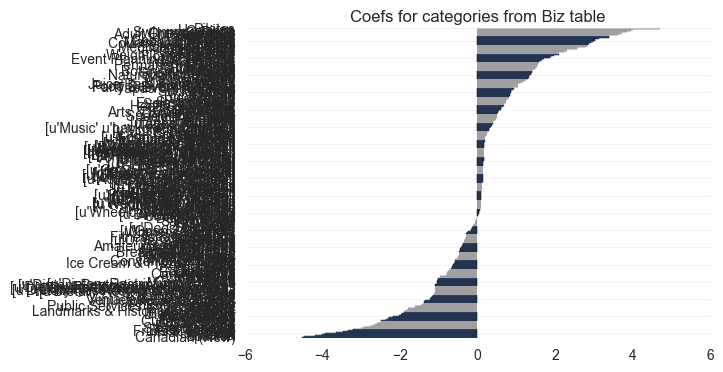

                         0
Canadian (New)   -4.527779
Spanish          -4.488725
Cinema           -4.204191
Polish           -4.022597
Beer Bar         -3.935554
Fish & Chips     -3.648541
Fruits & Veggies -3.479918
Beer Gardens     -3.350581
Tanning          -3.217292
Street Vendors   -3.004433
Food Court       -2.925219
Puerto Rican     -2.764940
Gyms             -2.691036
Parks            -2.656319
Toy Stores       -2.599599
Arts & Crafts    -2.527103
Cultural Center  -2.499873
Caterers         -2.348181
Art Galleries    -2.308859
Nail Salons      -2.277060                             0
Gymnastics           2.558640
Jazz & Blues         2.596813
Meditation Centers   2.790295
Chicken Shop         2.844853
Fondue               2.856214
Country Dance Halls  2.873794
Massage Therapy      2.940553
Pub Food             2.968899
Cooking Classes      3.020201
Afghan               3.022603
Irish Pub            3.147077
Kosher               3.394051
Tapas Bars           3.396332
Skin Care    

In [187]:

plt.clf()
logR = LogisticRegression()
X = df_expaned[[x for x in df_expaned.columns if x != 'citys']]
y = df_expaned.citys
logR_modle = logR.fit(X, y)
logR_modle.coef_


x_col_names = [x for x in df_expaned.columns if x != 'citys']

print len(set(x_col_names))
print logR_modle.coef_.size

coefs = pd.DataFrame(logR_modle.coef_, columns=X.columns)

coefs = coefs.T.sort_values(by=0)
coefs.plot.barh()
plt.legend([])
plt.title('Coefs for categories from Biz table')

plt.show()

print coefs.head(20), coefs.tail(20)

In [193]:
coefs = pd.DataFrame(logR_modle.coef_, columns=X.columns)
new_df_expaned = df_expaned.copy()

coef_abs = abs(coefs).T.sort_values(0)
# coef_abs.head()
coef_abs = coef_abs.reindex()
coef_abs['coefs']=coef_abs.values
coef_abs.drop(0,axis=1,inplace=True)
#print coef_abs.mean()


cutoff_coefs = 1
coef_to_remove = coef_abs[coef_abs['coefs']<cutoff_coefs].reset_index()['index']
print "\nRemove these and more (based on there ABS value of coefs below",str(cutoff_coefs)+")\n\n", coef_to_remove.head(15)

cols_to_drop = coef_to_remove
for col in cols_to_drop:
    new_df_expaned.drop(col, axis=1, inplace=True)
print "\nNew Shape:",new_df_expaned.shape, "\t\tOld Shape",df_expaned.shape



Remove these and more (based on there ABS value of coefs below 1)

0                 American (New)
1                   Comedy Clubs
2                    Dance Clubs
3              [u'BYOB/Corkage']
4                       Piercing
5     [u'Wheelchair Accessible']
6                       Southern
7                  Chicken Wings
8                      [u'BYOB']
9                     Sandwiches
10            [u'Music' u'live']
11              [u'Music' u'dj']
12                     Fast Food
13                         Salad
14                   Active Life
Name: index, dtype: object

New Shape: (152832, 114) 		Old Shape (152832, 293)


0    8302
1    1698
Name: citys, dtype: int64
After 30 cross valadations with a test proportion of 0.4
Mean: 0.871125 Standerd Div: 0.00412651487335
[[3300  524]
 [   1  175]]


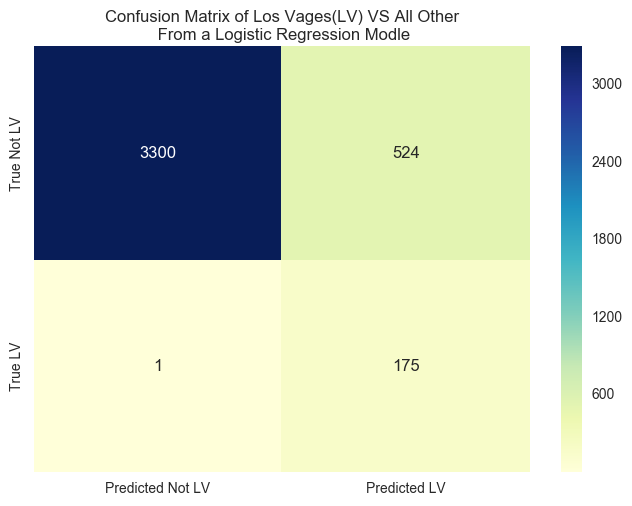

In [340]:
X = new_df_expaned[[x for x in new_df_expaned.columns if x != 'citys']]
y = new_df_expaned.citys

from sklearn.cross_validation import train_test_split

print new_df_expaned.citys.value_counts()
scores=[]
testsize = 0.4
for k in range(1,31):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)

    logR = LogisticRegression()
    second_logR_modle = logR.fit(X_train, y_train)
    score = second_logR_modle.score(X_test, y_test)
    scores.append(score)
print "After",k,"cross valadations with a test proportion of",testsize
print "Mean:", np.mean(scores), "Standerd Div:",np.std(scores)


preds = second_logR_modle.predict(X_test)

print confusion_matrix(preds, y_test)

plt.clf()
ax = sns.heatmap(confusion_matrix(preds, y_test), vmin=.8, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix of Los Vages(LV) VS All Other\n From a Logistic Regression Modle")
ax.set_xticklabels(['Predicted Not LV','Predicted LV'])
ax.set_yticklabels(['True LV','True Not LV'])


       
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

*Research location data to find the city targets.*

# <center> Las Vegas - Profile </center>

### Las Vegas was compared to other 3 citys in 3 way: 
&nbsp;
<li>Number of total reviews by months.</li>
<li>Total use of two word phrase pairs, using tables of counts of phrase pairs and logrythmic regreshion molde coefisants.</li>
<li>Type of establishments and thier attributes, ie: wi-fi.</li>
<br><br><br>
### <center><u> Number of Total Reviews by Months</u></center> 


<p>Reviews where grouped by city and month. The per city variation, mesuered by standered divation, was found to be greater for Las Vages than for each of the other two citys, however a one way f-test falied to reject the Hø that there is a diffance between each groups totel message per month.<p>

<table style="width:100%">
  <tr>
    <th><center>Line Graph:<br> Total Reviews Per Month by Citys</center></th>
    <th><center>Bar Chart:<br> Total Reviews Reviews Per Month by City</center></th> 
    
  </tr>
  <tr>
    <td><img src="https://snag.gy/W9zPE3.jpg" ></td>
    <td><img src="https://snag.gy/1RvE53.jpg" ></td> 
  </tr>
</table>


<br><br><br>
### <center><u>Comaparing Total Use of Two Word Phrase Pairs(A)</u></center> 
###### <center>Tables of Use of Phrase Pairs by City</center>


<p>Reviews where grouped by city and month. The per city variation, mesuered by standered divation, was found to be greater for Las Vages than for each of the other two citys, however a one way f-test falied to reject the Hø that there is a diffance between each groups totel message per month.<p>

<table style="width:100%">
  <tr>
    <th><center>Phrase Pairs With Highest Presentage Use in Los Veges Reviews</center></th>
    <th><center>Most Popopuler Phrase Pairs Across All Reviews</center></th> 
    
  </tr>
  <tr>
    <td><img src="https://snag.gy/m7E82Z.jpg" ></td>
    <td><img src="https://snag.gy/lIMHG0.jpg" ></td> 
  </tr>
</table>



<br><br><br>
### <center><u>Comaparing Total Use of Two Word Phrase Pairs(B)</u></center> 
###### <center>Logistic Regrrison Moleling of Phrase Pairs by City</center>



<table style="width:100%">
  <tr>
    <th><center>Confuison Matrix of Logorymic Reggresion Modal Prodictions</center></th>
    <th><center>Horzontal Bar Chart of Logorymic Reggresion Modal Coefs</center></th> 
    
  </tr>
  <tr>
    <td><img src="https://snag.gy/SkW52R.jpg" ></td>
    <td><img src="https://snag.gy/z6AJOM.jpg" ></td> 
  </tr>
  <tr>
    <td>
    <p><strong>Note:</strong> This modle is doing a poor job of predictiong, it is highy suseptable to type 1 error.</p></td>
    <td>
    <p><strong>Note:</strong> This modle is has much stroger coefs for tages from the attrabuests catagories 
    comapried to thouse of the type catagorie. (The stogest positive and negitice coefs can be found below.)</p></td> 
  </tr>
</table>


<p>Reviews where grouped by city and month. The per city variation, mesuered by standered divation, was found to be greater for Las Vages than for each of the other two citys, however a one way f-test falied to reject the Hø that there is a diffance between each groups totel message per month.<p>

In [9]:
#df[[x for x in df.columns if not x in
non_service = ['reviews_table_user_id', 'reviews_table_bar_food',
       'reviews_table_beer_selection', 'reviews_table_best_ve',
       'reviews_table_bloody_mary', 'reviews_table_chicken_waffles',
       'reviews_table_dance_floor', 'reviews_table_decided_try',
       'reviews_table_definitely_come',
       'reviews_table_definitely_recommend', 'reviews_table_don_know',
       'reviews_table_don_like', 'reviews_table_don_think',
       'reviews_table_eggs_benedict', 'reviews_table_fast_food',
       'reviews_table_feel_like', 'reviews_table_felt_like',
       'reviews_table_fish_chips', 'reviews_table_food_amazing',
       'reviews_table_food_delicious', 'reviews_table_food_good',
       'reviews_table_food_great', 'reviews_table_food_just',
       'reviews_table_french_fries', 'reviews_table_french_toast',
       'reviews_table_friday_night', 'reviews_table_fried_chicken',
       'reviews_table_good_food', 'reviews_table_good_place',
       'reviews_table_good_thing', 'reviews_table_good_time',
       'reviews_table_great_atmosphere', 'reviews_table_great_experience',
       'reviews_table_great_food', 'reviews_table_great_place',
       'reviews_table_great_service', 'reviews_table_great_time',
       'reviews_table_happy_hour', 'reviews_table_hash_browns',
       'reviews_table_highly_recommend', 'reviews_table_hip_hop',
       'reviews_table_ice_cream', 'reviews_table_just_like',
       'reviews_table_just_ok', 'reviews_table_just_right',
       'reviews_table_late_night', 'reviews_table_like_place',
       'reviews_table_little_bit', 'reviews_table_looked_like',
       'reviews_table_looks_like', 'reviews_table_love_place',
       'reviews_table_mac_cheese', 'reviews_table_make_sure',
       'reviews_table_mashed_potatoes', 'reviews_table_medium_rare',
       'reviews_table_onion_rings', 'reviews_table_place_good',
       'reviews_table_place_great', 'reviews_table_place_just',
       'reviews_table_potato_fries', 'reviews_table_pretty_good',
       'reviews_table_quality_food', 'reviews_table_really_enjoyed',
       'reviews_table_really_good', 'reviews_table_really_like',
       'reviews_table_really_nice', 'reviews_table_recommend_place',
       'reviews_table_red_velvet', 'reviews_table_saturday_night',
       'reviews_table_second_time', 'reviews_table_sweet_potato',
       'reviews_table_tasted_like', 'reviews_table_try_place',
       'reviews_table_ve_seen', 'reviews_table_ve_tried']


#[[x for x in df.columns if x in ['']]]
service = ['reviews_table_minutes_10',    'reviews_table_minutes_15',
'reviews_table_minutes_20',     'reviews_table_minutes_30',
'reviews_table_food_service',   'reviews_table_customer_service',
'reviews_table_service_excellent', 'reviews_table_service_food',
'reviews_table_service_friendly', 'reviews_table_service_good', 'reviews_table_good_service'
'reviews_table_service_great', 'reviews_table_staff_friendly', 'reviews_table_bottle_service',
'reviews_table_super_friendly','reviews_table_long_time', 'reviews_table_right_away',
'reviews_table_wait_staff',    'reviews_table_don_want', 'reviews_table_minutes_later',
'reviews_table_food_came', 'reviews_table_didn_want', 'reviews_table_friendly_staff']

for s in service:
    if s in non_service:
        print s

#other vars...
# ['businesses_table_name',   
# 'businesses_table_review_count',         
# 'businesses_table_city',                 
# 'businesses_table_stars',         
# 'businesses_table_categories',           
# 'businesses_table_variable',             
# 'Month','reviews_table_date',
# 'reviews_table_votes_cool',    
# 'reviews_table_business_id',    
# 'reviews_table_votes_funny',
# 'reviews_table_date',       
# 'reviews_table_votes_useful']  



In [554]:
df = df_raw.copy()
grouped_df_sv = df.groupby('reviews_table_business_id')[[x for x in df.columns if x in service]].sum()
grouped_df_sv['SV'] = grouped_df_sv.sum(axis=1)
grouped_df_sv = grouped_df_sv.reset_index()
grouped_df_sv = grouped_df_sv[['reviews_table_business_id','SV']]

df = pd.merge(df, grouped_df_sv, how='right', on=['reviews_table_business_id'])

grouped_df_nsv = df.groupby('reviews_table_business_id')[[x for x in df.columns if x in non_service]].sum()
grouped_df_nsv['Non_SV'] = grouped_df_nsv.sum(axis=1)
grouped_df_nsv = grouped_df_nsv.reset_index()
grouped_df_nsv = grouped_df_nsv[['reviews_table_business_id','Non_SV']]

df = pd.merge(df, grouped_df_nsv, how='right', on=['reviews_table_business_id'])


# grouped_df['sv'] = grouped_df.sum().sum(axis=1)
# sv['SV_Score'] = sv.sum(axis=1)
# sv.SV_Score.value_counts()
df.head()

,reviews_table_user_id,reviews_table_review_id,reviews_table_votes_cool,reviews_table_business_id,reviews_table_votes_funny,reviews_table_stars,reviews_table_date,reviews_table_votes_useful,reviews_table_minutes_10,reviews_table_minutes_15,...,businesses_table_city,businesses_table_stars,businesses_table_categories,businesses_table_latitude,businesses_table_longitude,businesses_table_neighborhoods,businesses_table_variable,businesses_table_value,SV,Non_SV
0,9SZBVZ-mxebOVa1BlWFtWw,O52ceLGXdYGbJp2QrtvW1Q,0,Y-9dJvw-J2d9QKfuL7mKgA,0,1,2010-07-19,1,0,0,...,Phoenix,3.5,"['Breakfast & Brunch', 'Sandwiches', 'Salad', ...",33.49482,-111.979821,[],attributes.Parking.lot,True,112,280
1,9SZBVZ-mxebOVa1BlWFtWw,O52ceLGXdYGbJp2QrtvW1Q,0,Y-9dJvw-J2d9QKfuL7mKgA,0,1,2010-07-19,1,0,0,...,Phoenix,3.5,"['Breakfast & Brunch', 'Sandwiches', 'Salad', ...",33.49482,-111.979821,[],attributes.Ambience.hipster,False,112,280
2,9SZBVZ-mxebOVa1BlWFtWw,O52ceLGXdYGbJp2QrtvW1Q,0,Y-9dJvw-J2d9QKfuL7mKgA,0,1,2010-07-19,1,0,0,...,Phoenix,3.5,"['Breakfast & Brunch', 'Sandwiches', 'Salad', ...",33.49482,-111.979821,[],open,True,112,280
3,9SZBVZ-mxebOVa1BlWFtWw,O52ceLGXdYGbJp2QrtvW1Q,0,Y-9dJvw-J2d9QKfuL7mKgA,0,1,2010-07-19,1,0,0,...,Phoenix,3.5,"['Breakfast & Brunch', 'Sandwiches', 'Salad', ...",33.49482,-111.979821,[],attributes.Noise Level,False,112,280
4,b9XdpPlzZCVimhNb0z8CNA,toKZg6KzOxjqEvMOF-eZ8w,3,Y-9dJvw-J2d9QKfuL7mKgA,3,1,2009-07-12,2,0,0,...,Phoenix,3.5,"['Breakfast & Brunch', 'Sandwiches', 'Salad', ...",33.49482,-111.979821,[],attributes.Wheelchair Accessible,True,112,280


In [27]:
def checkSV(row):
    if row>1:
        return 1
    else: 
        return 0
df['servies_realted'] = df[[x for x in df.columns if x in service]].sum(axis=1)
df['servies_realted'] = df['servies_realted'].apply(checkSV)
print df['servies_realted'].value_counts()

def check_Non_SV(row):
    if row>1:
        return 1
    else: 
        return 0
df['non_service_realted'] = df[[x for x in df.columns if x in non_service]].sum(axis=1)
df['non_service_realted'] = df['non_service_realted'].apply(check_Non_SV)
print df['non_service_realted'].value_counts()

0    75368
1     4632
Name: servies_realted, dtype: int64
0    64658
1    15342
Name: non_service_realted, dtype: int64


In [28]:
df['non_service_score'] = df['non_service_realted']*df.businesses_table_stars
df['servies_score'] = df['servies_realted']*df.businesses_table_stars

### <center><u>For Servies Score</u></center>
#### <center>Linear Regression Model</center>
#### <center>Using: City, Votes Cool, Votes Funny, and Votes Useful </center>



In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import patsy
y, X =  patsy.dmatrices("servies_score ~ \
reviews_table_votes_cool + C(businesses_table_city) + reviews_table_votes_funny + reviews_table_votes_useful - 1",
data=df, return_type="dataframe")



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print X_train.columns
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)
print "Modle score:", lr_model.score(X_test, y_test)
print pd.DataFrame(lr_model.coef_.ravel(), index=X_train.columns.values)


Index([u'C(businesses_table_city)[Las Vegas]',
       u'C(businesses_table_city)[Phoenix]',
       u'C(businesses_table_city)[Surprise]',
       u'C(businesses_table_city)[Waterloo]', u'reviews_table_votes_cool',
       u'reviews_table_votes_funny', u'reviews_table_votes_useful'],
      dtype='object')
Modle score: 0.0119480512904
                                                0
C(businesses_table_city)[Las Vegas]  5.120806e+10
C(businesses_table_city)[Phoenix]    5.120806e+10
C(businesses_table_city)[Surprise]   5.120806e+10
C(businesses_table_city)[Waterloo]   5.120806e+10
reviews_table_votes_cool             8.533820e-03
reviews_table_votes_funny           -9.304202e-03
reviews_table_votes_useful           3.778260e-02


### <center><u>For Non-Servies Score</u></center>
#### <center>Linear Regression Model</center>
#### <center>Using: City, Votes Cool, Votes Funny, and Votes Useful </center>




In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import patsy

y, X =  patsy.dmatrices("non_service_score ~ \
reviews_table_votes_cool + C(businesses_table_city) + reviews_table_votes_funny + reviews_table_votes_useful", \
data=df, return_type="dataframe")



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print X_train.columns
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)
print "Modle score:", lr_model.score(X_test, y_test)
print pd.DataFrame(lr_model.coef_.ravel(), index=X_train.columns.values)

In [77]:
#df[['reviews_table_business_id','SV','Non_SV']]

In [84]:
# frequncy_df = df_raw.groupby('businesses_table_city').sum().T
# frequncy_df["Total"] = frequncy_df.Phoenix + frequncy_df.Surprise + frequncy_df.Waterloo + frequncy_df['Las Vegas']
# frequncy_df.sort_values(by=['Total'], ascending=False)
# frequncy_df.head(15)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

##### Some users do talk about service more than others.
##### The models coefficients do differ;  this implys that there are  two different kinds of ratings.
##### Particulary votes funny is has a positive coef for servies related scores but not for the non sevies related score.

<body bgcolor="#E6E6FA">
# <center> Service VS Non-Service Focused Reviews </center>

&nbsp;
<li>Creating two new ratings for reviews service-focused ratings and  non-service ratings.</li>
<li>Variables used in regression model.</li>
<li>Diffrance in coefs and conclusion.</li>


<br><br><br>
### <center><u> Creating New Ratings</u></center> 


<p>To create new ratings, first prase pair were split into two exclucse groups: 'non-servies realted' and 'servies realted'(see bellow for specfic grouping). The ratings were then created by presriving their star values if the review contained a prase pair that was deammed to be one of the two types.<p>

<table style="width:100%">
  <tr>
    <th><center>Service Realted Prase Pairs(SRP) </center></th><th><center>Non-Service Realted Prase Pairs(NSRP)</center></th> 
    
    
  </tr>
  <tr>
    <td>'minutes_10',
 'minutes_15',
 'minutes_20',
 'minutes_30',
 'food_service',
 'customer_service',
 'service_excellent',
 'service_food',
 'service_friendly',
 'service_good',
 'good_serviceservice_great',
 'staff_friendly',
 'bottle_service',
 'super_friendly',
 'long_time',
 'right_away',
 'wait_staff',
 'don_want',
 'minutes_later',
 'food_came',
 'didn_want',
 'friendly_staff'

</td>
    <td>
 'bar_food',
 'beer_selection',
 'best_ve',
 'bloody_mary',
 'chicken_waffles',
 'dance_floor',
 'decided_try',
 'definitely_come',
 'definitely_recommend',
 'don_know',
 'don_like',
 'don_think',
 'eggs_benedict',
 'fast_food',
 'feel_like',
 'felt_like',
 'fish_chips',
 'food_amazing',
 'food_delicious',
 'food_good',
 'food_great',
 'food_just',
 'french_fries',
 'french_toast',
 'friday_night',
 'fried_chicken',
 'good_food',
 'good_place',
 'good_thing',
 'good_time',
 'great_atmosphere',
 'great_experience',
 'great_food',
 'great_place',
 'great_service',
 'great_time',
 'happy_hour',
 'hash_browns',
 'highly_recommend',
 'hip_hop',
 'ice_cream',
 'just_like',
 'just_ok',
 'just_right',
 'late_night',
 'like_place',
 'little_bit',
 'looked_like',
 'looks_like',
 'love_place',
 'mac_cheese',
 'make_sure',
 'mashed_potatoes',
 'medium_rare',
 'onion_rings',
 'place_good',
 'place_great',
 'place_just',
 'potato_fries',
 'pretty_good',
 'quality_food',
 'really_enjoyed',
 'really_good',
 'really_like',
 'really_nice',
 'recommend_place',
 'red_velvet',
 'saturday_night',
 'second_time',
 'sweet_potato',
 'tasted_like',
 'try_place',
 've_seen',
 've_tried'</td> 
  </tr>
</table>


<br><br><br>
### <center><u>Variables Used in Regression Model</u></center> 
###### <center></center>


<p><p>

<table style="width:100%">
  <tr>
    <th><center>Prase Pairs Used in Regression Model</center></th>
    <th><center></center></th> 
    
  </tr>
  <tr>
    <td><p>'great_experience', 'great_food', 'great_place', 'great_service',
       'great_time', 'happy_hour', 'hash_browns', 'highly_recommend',
       'hip_hop', 'ice_cream', 'just_like', 'just_ok', 'just_right',
       'las_vegas', 'late_night', 'like_place', 'little_bit', 'long_time',
       'looked_like', 'looks_like', 'love_place', 'mac_cheese',
       'make_sure', 'mashed_potatoes', 'medium_rare', 'minutes_later',
       'new_york', 'onion_rings', 'place_good', 'place_great',
       'place_just', 'potato_fries', 'pretty_good', 'quality_food',
       'really_enjoyed', 'really_good', 'really_like', 'really_nice'</p></td>
    <td></td> 
  </tr>
</table>



<br><br><br>
### <center><u>Diffrance in Coefs and Conclution.</u></center> 



<table style="width:100%">
  <tr>
    <th><center>Logorymic Reggresion Modal Coefs---- Sevice Stars</center></th>
    <th><center>Logorymic Reggresion Modal Coefs---- Non-Sevice Stars</center></th> 
  </tr>
  <tr>
    <td><img src="https://snag.gy/sDmIPU.jpg" ></td>
    <td><img src="https://snag.gy/qx4nIN.jpg" ></td> 

  </tr>
</table>

#### Conclusion:
<p>As can be seen in the above graphs, all of the small coefs(under 0.2) in the above model changed direction depending on if the modle is predicting for SRP or NSRP. This sugest that the small coefs are aproriatly split up. The phrase pairs with high coefs('minues_later' and 'long_time'), may have reatained a asosation with a higher amounts of stars and contiued to be a stronger predictor than the other other phrase pairs selected for the ressgresion model.
<p>

#### Further investigation:
<p>
Potetialy a demention for people having to wait may be important. Phrase Pairs to over-all star ratting could be copamried across difrent buissness types to see if time, seves, and non-seviec related revieviews effect buisness difrently.
<p>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Identifying "elite" users



---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


<body bgcolor="#E6E6FA">
# <center>  "Elite" Yelp users </center>

&nbsp;
<li>What Makes a User Elite.</li>
<li>Whats Difrent About Elite User Revies.</li>
<li>Conclusion.</li>


<br><br><br>
### <center><u>What Makes an User Elite</u></center> 


<p> The number of reviews is a strong factore on whethere a user was ever elite.<p>

<table style="width:100%">
  <tr>
    <th><center> Coefs of model predicting if a user was ever elite.</center>
    
  </tr>
  <tr>
    <td><img src="https://snag.gy/k2KuJm.jpg" > <img>
</td>

  </tr>
</table>


<br><br><br>
### <center><u>Whats Difrent About Elite User Revies</u></center> 
###### <center></center>


<p><p>

<table style="width:100%">
  <tr>
    <th><center>Prase Pairs Used in Regression Model</center></th>
    <th><center></center></th> 
    
  </tr>
  <tr>
    <td><p><img src="https://snag.gy/6A7Ymz.jpg" > </p></td>
    <td></td> 
  </tr>
</table>



<br><br><br>


#### Conclusion:
<p>The bar chart of the above coefs show phrase pairs with the strongest predictive valuse for weather a users is Elite. 
It apperes from this that elite users on yelp are talking about 'good food', 'fast food', and 'happy hours'. This is likly the some of the most populer topics on yelp, poisible becouse the elite users are elite by posting more reviews and this is what they talk about, or becouse these topics are the most populer they are also the most populer with elite users. 
<p>

#### Further investigation:
<p>
Further ivestigation in to what types of bussiness eleite users are talking about could be useful. Also, using a method that balance popularity of phrase pairs to show if there are topics that are more populer with elite per capitia could be insitefull.
<p>

In [125]:
sql_u = """
SELECT * 
FROM [bigquery-dsi-dave:yelp_arizona.users] AS users_table
"""
users = pd.read_gbq(sql_u, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 1; 12.0% done. Elapsed 7.57 s.
  Got page: 2; 23.0% done. Elapsed 11.93 s.
  Got page: 3; 35.0% done. Elapsed 16.43 s.
  Got page: 4; 46.0% done. Elapsed 21.1 s.
  Got page: 5; 58.0% done. Elapsed 26.0 s.
  Got page: 6; 69.0% done. Elapsed 31.17 s.
  Got page: 7; 81.0% done. Elapsed 35.55 s.
  Got page: 8; 92.0% done. Elapsed 40.15 s.
  Got page: 9; 100.0% done. Elapsed 43.48 s.
Got 144206 rows.

Total time taken 51.16 s.
Finished at 2016-12-14 11:26:36.


In [198]:
users.compliments_profile.value_counts()


users.compliments_plain = users.compliments_plain.fillna(value=0)
users.compliments_cute = users.compliments_cute.fillna(value=0)
users.compliments_funny = users.compliments_funny.fillna(value=0)
users.compliments_plain = users.compliments_plain.fillna(value=0)
users.compliments_photos = users.compliments_photos.fillna(value=0)
users.compliments_profile = users.compliments_profile.fillna(value=0)


users['Is_Elite'] = users.elite.apply(lambda x: 0 if len(x)==2 else 1)






y, X =  patsy.dmatrices("Is_Elite ~ \
compliments_cool + compliments_cute + votes_funny + votes_useful + compliments_funny + average_stars + \
review_count + compliments_profile - 1", \
data=users, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)

print "Modle score:", lr_model.score(X_test, y_test)

coefs=pd.DataFrame(lr_model.coef_.ravel(), index=X_train.columns.values)
print coefs

# users.elite.value_counts()
# users.info()

Modle score: 0.201547693345
                            0
compliments_cool     0.000272
compliments_cute     0.000376
votes_funny          0.000030
votes_useful        -0.000087
compliments_funny   -0.000194
average_stars        0.017937
review_count         0.001263
compliments_profile -0.000348


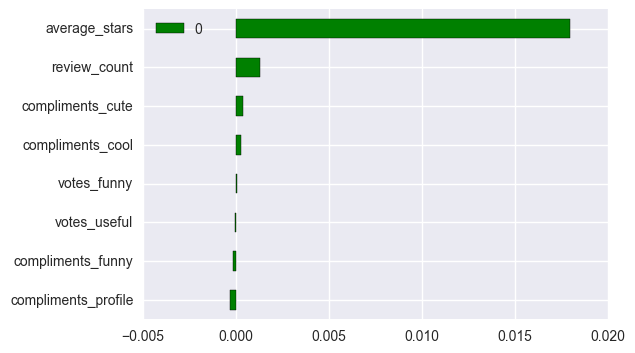

In [211]:
coefs.sort_values(by=0, inplace=True)
coefs.plot.barh(color='green')



### Extract the month and year of joing from the 'date_join' column. 

In [237]:
def get_year(row):
    #print row['yelping_since']
    return str(row).split('-')[0]

users['year_join']= users.yelping_since.apply(get_year)

#users.year_join.value_counts()

In [240]:
def get_month(row):
    #print row['yelping_since']
    return str(row).split('-')[1]

users['month_join']= users.yelping_since.apply(get_month)

#users.month_join.value_counts()

In [300]:
# users.elite.value_counts()
#print users.year_join.min(), users.year_join.max()
years = range(int(users.year_join.min()), int(users.year_join.max())+1)

def years_elite(years):
    for year in years.split(" "):
        users[str(year)]=1

df_years = users.elite.map(lambda years: ''.join([year for year in years if not year in "[]'\""]))
new_df_years = df_years.str.get_dummies(', ')
new_df_years.describe()

users['number_years_elite'] = new_df_years.sum(axis=1)


(144206, 26)

In [322]:
#users(new_df_years.shape,)
column_names = np.hstack((users.columns.values,new_df_years.columns.values))
usr_all_arry = np.hstack((users, new_df_years))
users_elite = pd.DataFrame(usr_all_arry,columns=column_names)


In [337]:
users_elite.columns

Index([      u'yelping_since',   u'compliments_plain',        u'review_count',
          u'compliments_cute',  u'compliments_writer',                u'fans',
          u'compliments_note',     u'compliments_hot',    u'compliments_cool',
       u'compliments_profile',       u'average_stars',    u'compliments_more',
                     u'elite',                u'name',             u'user_id',
                u'votes_cool',    u'compliments_list',         u'votes_funny',
        u'compliments_photos',   u'compliments_funny',        u'votes_useful',
                  u'Is_Elite',           u'year_join',          u'month_join',
        u'number_years_elite',                u'2005',                u'2006',
                      u'2007',                u'2008',                u'2009',
                      u'2010',                u'2011',                u'2012',
                      u'2013',                u'2014',                u'2015'],
      dtype='object')

In [326]:
sql_r = """
SELECT * 
FROM [bigquery-dsi-dave:yelp_arizona.reviews] AS reviews_table
limit 300
"""
reviews = pd.read_gbq(sql_r, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 277.3 Mb

Retrieving results...
Got 300 rows.

Total time taken 1.58 s.
Finished at 2016-12-14 23:09:02.


In [331]:
reviews.date = pd.to_datetime(reviews.date)
reviews['Year_of_review'] = reviews.date.dt.year

In [416]:
full = reviews.merge(users_elite, how='left',on='user_id')
#full.groupby(['user_id','Year_of_review']).sum()

In [417]:
def set_this_year(this_year):
    if this_year[str(this_year.Year_of_review)] == 1:
        return 1
    else: 
        return 0

full['Elite_This_Year'] = full.apply(set_this_year,axis=1)

In [418]:
not_for_regg = ['Is_Elite', 'year_join', 'month_join', 'number_years_elite','date','name',
       u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', u'2011',
       u'2012', u'2013', u'2014', u'2015', 'review_id','business_id','elite']
full[[x for x in full.columns if x not in not_for_regg]].columns.values
full_by_user = full.groupby('user_id').sum()


In [419]:
full_by_user.Elite_This_Year.describe()

count    300.000000
mean       0.053333
std        0.225073
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Elite_This_Year, dtype: float64

In [411]:
from sklearn.preprocessing import StandardScaler
full_by_user = StandardScaler().fit(full_by_user)
full_by_user = scaler.transform(full_by_user)

TypeError: float() argument must be a string or a number

In [ ]:
from sklearn.linear_model import ElasticNet

scaler = StandardScaler().fit(full_by_user)
#full_by_user = scaler.transform(full_by_user)
#full_by_user = pd.DataFrame(full_by_user, dtype='float64')
y = full_by_user.pop('Elite_This_Year')
X_train, X_test, y_train, y_test = train_test_split(full_by_user, y, test_size=0.4)

en =ElasticNet()
en_model = en.fit(X_train, y_test)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?